In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.006
c_reg2=0.0001
d=3

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.471666981761198>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2994110819774705>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.355420295818082>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.07629730074459407>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.04065134, 1.15665112, 0.95866282, 2.52541153, 2.18059588,
       0.85491165, 3.55676043, 2.46744994, 1.92018702, 1.64744586])>


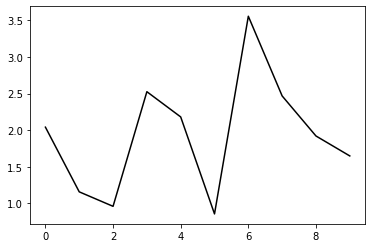

In [4]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.1 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 2.60581612e-01 -5.58472955e+00  5.38266808e+01 -3.08275478e+02
  1.16790041e+03 -3.08347723e+03  5.82285230e+03 -7.94502014e+03
  7.81868298e+03 -5.47798636e+03  2.66286328e+03 -8.59692413e+02
  1.71291955e+02 -1.84108983e+01  9.55260239e-01 -6.54557458e-05]


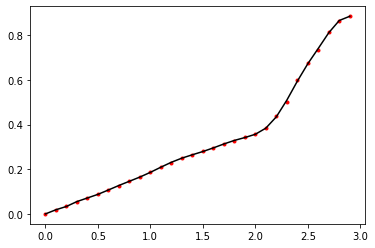

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.1) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 3.0)
        M=np.random.uniform(0.0, 1.0)
        noise=np.abs(np.random.normal(0, 0.025))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 3.0)
        M=np.random.uniform(0.0, 1.0)
        noise=np.abs(np.random.normal(0, 0.025))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

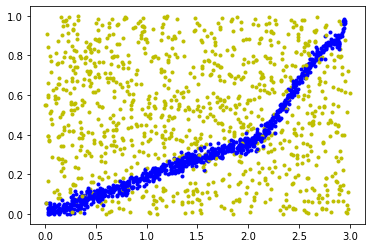

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [13]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [14]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

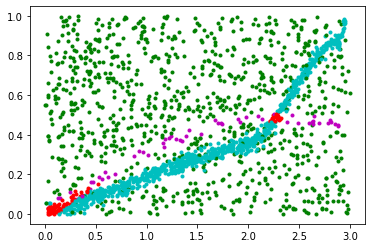

In [15]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [16]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_p+sum_n+E_reg1+E_reg2

In [17]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(0.9506414607852615, shape=(), dtype=float64)
tf.Tensor(0.9696920192605183, shape=(), dtype=float64)
tf.Tensor(1.0289145311873777, shape=(), dtype=float64)
tf.Tensor(0.9616171618431559, shape=(), dtype=float64)
tf.Tensor(1.0280013037063354, shape=(), dtype=float64)
tf.Tensor(1.0348749879275563, shape=(), dtype=float64)
tf.Tensor(0.9947321473327819, shape=(), dtype=float64)
tf.Tensor(0.957570329086725, shape=(), dtype=float64)
tf.Tensor(0.9352469693471188, shape=(), dtype=float64)
tf.Tensor(0.9646543768068463, shape=(), dtype=float64)


# Optimize

0 1.1102970428299523
2.5070101011737083 1.2640679600025182 -0.32007717798081575 -0.04095405445233526
[1.94065136 1.25665075 1.05866228 2.62541027 2.28059417 0.95490955
 3.65675234 2.56743528 1.82023551 1.74741049]


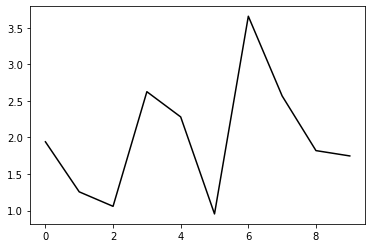

1100 1.0023250255413334
2.518094612467221 1.2080293806828395 -0.3333254873619197 -0.01714403741454965
[1.75074095 1.48716531 1.31779424 2.53102758 2.27160187 1.06617078
 3.08971579 1.95416634 1.16845134 2.80355271]


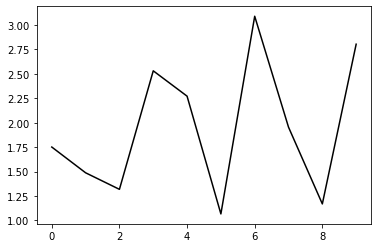

2200 0.9644188418187509
2.434347147490914 1.3122125981608548 -0.3205509248757032 -0.1275418478496061
[1.88237286 1.44163363 1.34318346 2.25746779 2.11706914 1.13559932
 2.73180987 1.78325129 0.96351923 3.80323439]


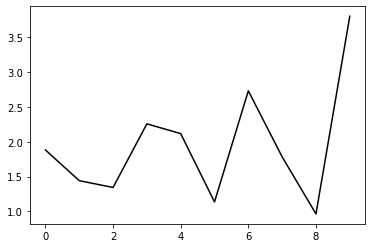

3300 0.8728448018857149
2.4430666380013055 1.199878056661102 -0.23488333198743636 -0.14667867287170305
[1.94184689 1.40787447 1.31980514 1.97343207 1.85314309 0.98708228
 2.179686   1.25361221 0.38306047 4.75109256]


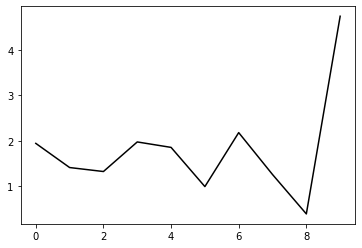

4400 1.01092905558512
2.570032059519639 1.0886627069476449 -0.3604555048557864 -0.06832894524869694
[1.50229497 1.80576527 1.79183879 2.29947499 2.21265112 1.46661925
 2.37636707 1.43854948 0.36857913 5.65428379]


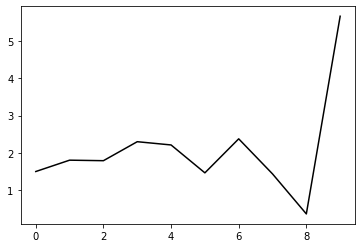

5500 0.982080517335103
2.5268735630354824 1.116743605617364 -0.30120875735619757 -0.14266810363987348
[1.71682597 1.62143365 1.681991   2.04548889 2.0083673  1.45623906
 2.13206697 1.38164622 0.39252329 6.51453338]


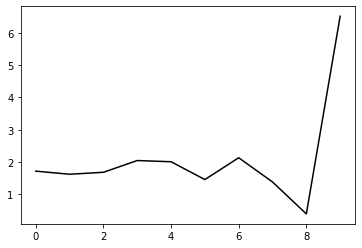

6600 1.0069761358449538
2.5852989214245943 1.0095539308085895 -0.34497386920725326 -0.09348888869810501
[ 1.44650021  1.8569754   1.92261207  2.1361938   2.05429752  1.55517365
  1.80876023  0.87135934 -0.33859871  7.30290402]


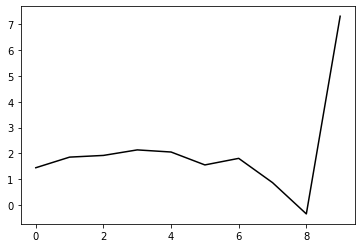

7700 1.0143471930808359
2.6289625931267655 0.9967729179264495 -0.4008743414998572 -0.013615257199984738
[ 1.23160346  1.91492044  2.10329616  2.27943294  2.23390393  1.87676027
  2.02253012  1.19535643 -0.11214905  8.00140324]


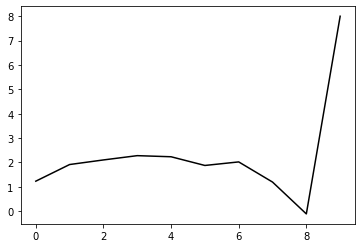

8800 1.003259372698464
2.633540960627115 0.9967620833448991 -0.4049153153636877 0.010913428675151965
[1.2211299  1.75546121 2.06775826 2.23768905 2.22757919 2.00676923
 2.01182103 1.3170279  0.04854751 8.57493775]


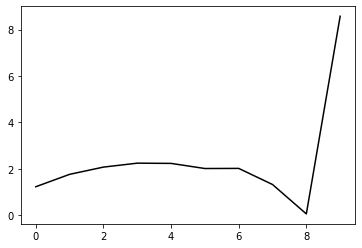

9900 1.0122552011409818
2.6332121657503107 0.9967619427052443 -0.40479472810772904 0.010897354987996986
[1.23689789 1.59799641 1.92263358 2.12059444 2.16408102 2.05726293
 1.93063604 1.34519535 0.16875264 8.95573523]


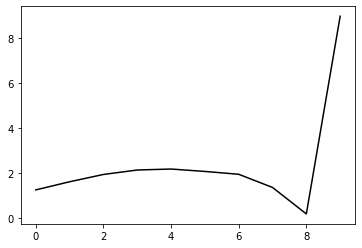

11000 1.0015643880052405
2.631692913814866 0.9967614121532699 -0.40424966474269414 0.010705487953107768
[1.26241739 1.47764438 1.71985488 1.91811308 2.02060812 1.99589317
 1.81357468 1.29931999 0.28711857 9.11786109]


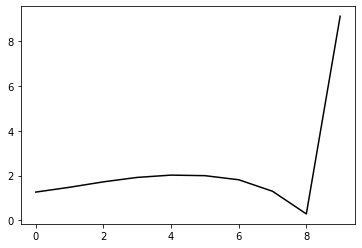

12100 0.9819117261201761
2.6125037413610115 0.9967558432531142 -0.3977558817587241 0.0065934729849176366
[ 1.48336403  1.26959297  1.23757715  1.24808951  1.23149025  1.11188474
  0.77076704  0.18635129 -0.71115368  9.08822264]


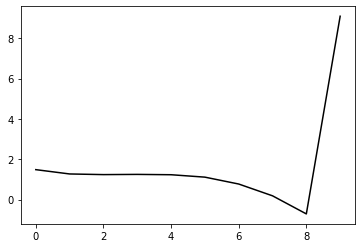

13200 0.9338803334062752
2.5760998873823455 0.9967940107514265 -0.3864952758245332 0.020250827441491776
[ 2.06420598  0.95587989  0.56183116  0.38140634  0.27489555  0.14172008
 -0.16179897 -0.7205432  -1.54337417  9.01489974]


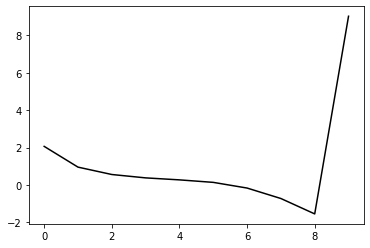

14300 0.9383578123063565
2.5751619726864075 0.9338032552859495 -0.36464595979274994 0.04977616027748162
[ 1.68922382  1.42273288  0.92208276  0.65990347  0.4870128   0.27498218
 -0.1380666  -0.89735923 -2.04566442  8.9487975 ]


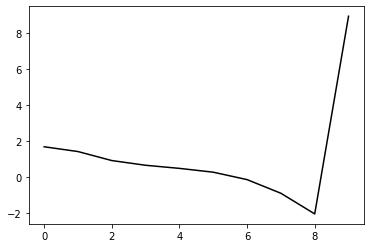

15400 0.9121603846228397
2.4805843591771515 0.8945849265503417 -0.3212674197338691 0.03145261576556691
[ 1.77461238  1.37465208  0.8398916   0.47190566  0.18884528 -0.14294428
 -0.68765983 -1.57157671 -2.74631213  8.8594153 ]


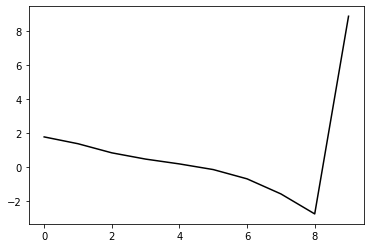

16500 0.825327447392406
2.273755049349119 0.8971191616449488 -0.2409936576644029 -0.04669303664983775
[ 2.37011355  0.84656182  0.23168011 -0.19483119 -0.53528138 -0.92044639
 -1.51856218 -2.46475328 -3.70448543  8.85645725]


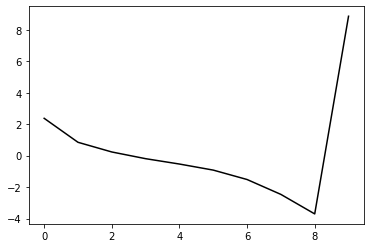

17600 0.7794730873812643
2.2418598956803457 0.9210224580987179 -0.21770827305460214 -0.10657243750429995
[ 2.29573588  1.06114629  0.33311036 -0.14213222 -0.5210188  -0.94062073
 -1.57261636 -2.56306082 -3.86758447  8.80293904]


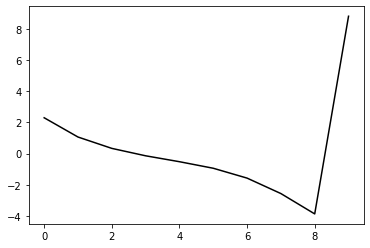

18700 0.7339201469632488
2.136260889800131 0.910783963728981 -0.1819867099387064 -0.03606812890009095
[ 1.89010902  1.488905    0.66674418  0.07531787 -0.42574952 -0.99727836
 -1.82776084 -3.05762373 -4.5589988   8.72874898]


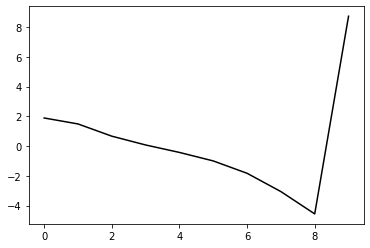

19800 0.6283391867491446
2.2059446870843655 0.9232269996794561 -0.16365837733394467 -0.11303796165519707
[ 1.78776802  1.59815167  0.99120606  0.41715693 -0.0640096  -0.59575537
 -1.38935648 -2.63330534 -4.2070475   8.7064199 ]


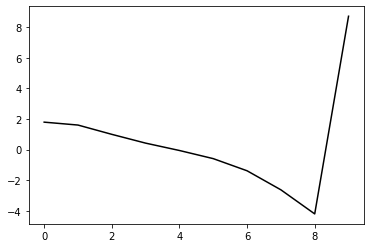

20900 0.388813648303927
2.209394245633021 0.8871198601253253 -0.20409859959588275 -0.13288260121943088
[ 1.57766452  1.78178616  1.28458382  0.69921575  0.1716898  -0.41345595
 -1.27228822 -2.61404723 -4.32081673  8.75766213]


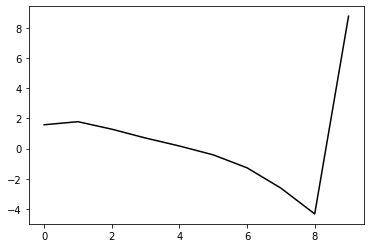

22000 0.43179314237733585
2.223929142545366 0.7959951734724867 -0.21663656002735382 -0.12540911334120822
[ 1.50284756  1.77894629  1.37210713  0.79439953  0.24340173 -0.36434488
 -1.24200014 -2.61037713 -4.3627232   8.7415923 ]


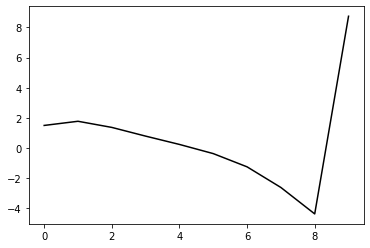

23100 0.5407020716485026
2.100663005498233 0.8320092618119532 -0.19233205415945362 -0.1281853047499721
[ 1.57235563  1.63421015  1.24076703  0.63511492  0.00999995 -0.69190517
 -1.6867184  -3.22393237 -5.23964407  8.70704304]


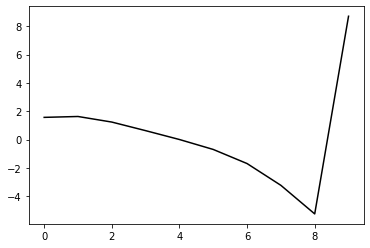

24200 0.4840591309928993
2.1280142635647348 0.6665119813633557 -0.19113114351108448 -0.12606723097013608
[ 1.53886191  1.62761853  1.29148891  0.70540901  0.07190149 -0.6395484
 -1.63571738 -3.16974641 -5.1774212   8.67061963]


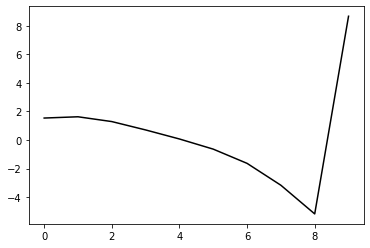

25300 0.618013954859691
2.113452580113236 0.5900823527595825 -0.16294629920289636 -0.1564989102499536
[ 1.58743997  1.55714145  1.2654658   0.6966082   0.0476278  -0.68604276
 -1.70111995 -3.25685903 -5.29452821  8.66095225]


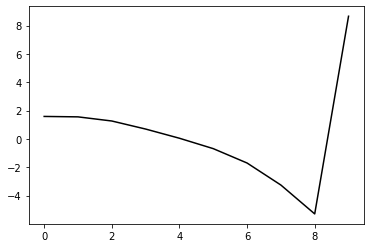

26400 0.5403796503072704
2.1204652691700487 0.5066316058097496 -0.1721710424503466 -0.15334469809864018
[ 1.55938277  1.55141242  1.30582193  0.7651432   0.11181866 -0.63510598
 -1.65887467 -3.2226974  -5.26908759  8.60601845]


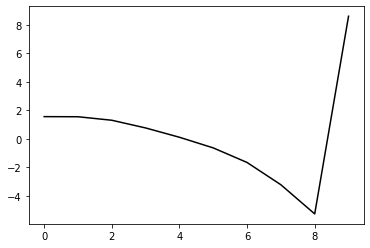

27500 0.3342423266192349
2.168362398528653 0.4821755356330503 -0.1959682910056138 -0.16577692752260553
[ 1.41903832  1.6927084   1.5146999   1.02373592  0.38700188 -0.35516585
 -1.36893611 -2.92115102 -4.95922694  8.69739764]


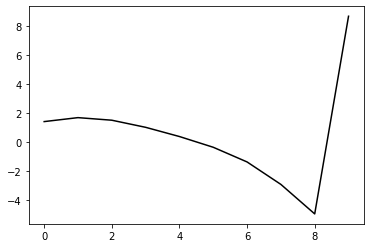

28600 0.4774263071463466
2.1061910363394416 0.4404200225331827 -0.1890625064052539 -0.15896637899930954
[ 1.4100112   1.62084483  1.41956783  0.92172679  0.24160865 -0.56746095
 -1.6568926  -3.30361548 -5.47934507  8.64602291]


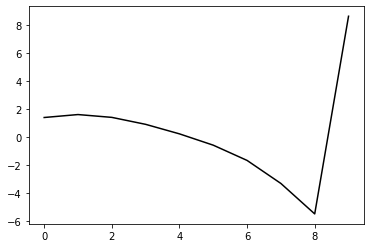

29700 0.7364159555043017
2.1095818137256304 0.3658236263815272 -0.17664801118384132 -0.17986077092711852
[ 1.53950001  1.47538069  1.33431304  0.87759073  0.21350782 -0.59722546
 -1.68522116 -3.3242853  -5.48076389  8.63076434]


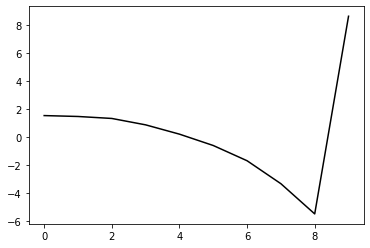

30800 0.3163773245693
2.117836171570614 0.27417729814296155 -0.20257062439791987 -0.16280103976899477
[ 1.38678174  1.59023935  1.47394402  1.03222309  0.35929512 -0.48204703
 -1.60809989 -3.29501891 -5.52290886  8.71058437]


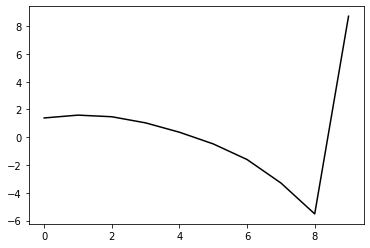

31900 0.4799730610922655
2.1048010642090733 0.155431867326334 -0.20738239057530436 -0.1546158739765232
[ 1.30846949  1.61719635  1.52019043  1.09572085  0.4182352  -0.44873281
 -1.60704855 -3.33259044 -5.6174084   8.63385765]


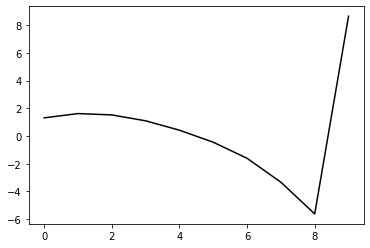

33000 0.5940772518110767
2.0538496608686856 0.11175613721034723 -0.17007496618937165 -0.18297097475852714
[ 1.45336274  1.4520331   1.34593938  0.93615127  0.25663791 -0.63201095
 -1.81845939 -3.57679247 -5.90923824  8.65372443]


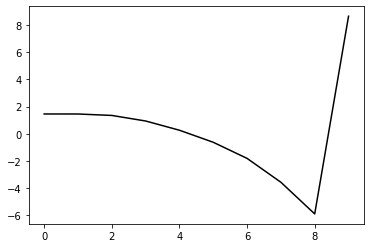

34100 0.44318156510572343
2.0511429995081114 -0.00559523269183105 -0.20183571294421254 -0.16250571560112467
[ 1.34114563  1.54689627  1.43055241  1.02193713  0.33231145 -0.58567917
 -1.81182127 -3.62035593 -6.03096334  8.67399778]


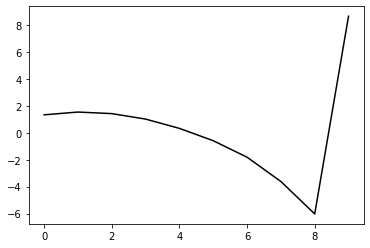

35200 0.4134136144498289
2.0791174698660875 -0.018693631429096493 -0.2005681113950744 -0.18716935704484836
[ 1.32455936  1.58588667  1.51878109  1.15009902  0.49338215 -0.40641744
 -1.61713237 -3.40338    -5.77687998  8.57782717]


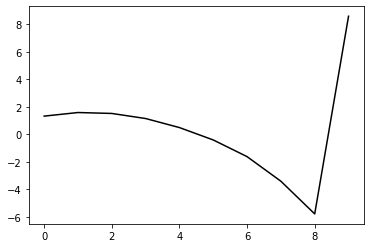

36300 0.3801554627092732
2.0515808170357044 -0.03155766695924976 -0.2109599854109971 -0.1782940438515706
[ 1.32581436  1.54395105  1.46330942  1.09169532  0.42083357 -0.51555714
 -1.77873427 -3.63249752 -6.10866247  8.61123634]


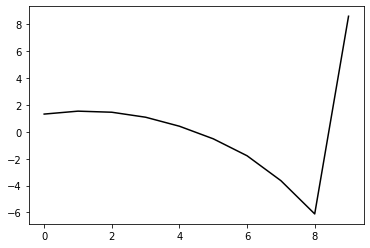

37400 0.49488244807276016
2.05373372275799 -0.09493321174675923 -0.21990395059691203 -0.17662597423898618
[ 1.21457477  1.63599304  1.5838901   1.23338454  0.57479497 -0.36942715
 -1.65502746 -3.54087225 -6.07238507  8.58114916]


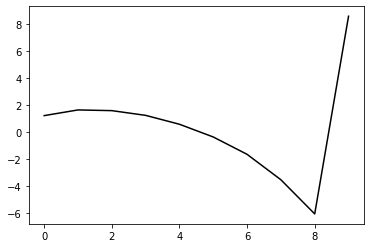

38500 0.3426825940166369
2.035167087436036 -0.23468147349844326 -0.21288312466956333 -0.18205851610576243
[ 1.32281072  1.46829804  1.43906043  1.10497958  0.45459927 -0.49859175
 -1.80456965 -3.71276376 -6.26537718  8.61182237]


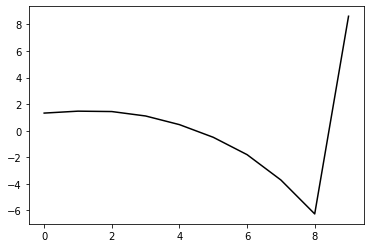

39600 0.43330231486025333
2.0529193626356337 -0.3066202790304042 -0.20500869063662056 -0.20877937899320803
[ 1.3112137   1.53420371  1.53487214  1.24817678  0.63917086 -0.2877642
 -1.57645165 -3.46304791 -5.97886981  8.61876218]


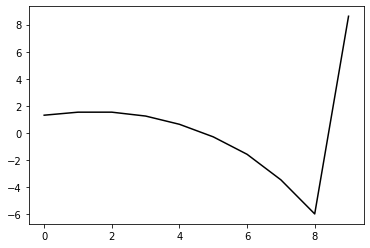

40700 0.8258014342650413
2.032475817468432 -0.3377003087201314 -0.16879030515770418 -0.24819062293559963
[ 1.48463339  1.37353804  1.3913328   1.14061708  0.56253161 -0.35151451
 -1.64162365 -3.53059025 -6.04161807  8.60187712]


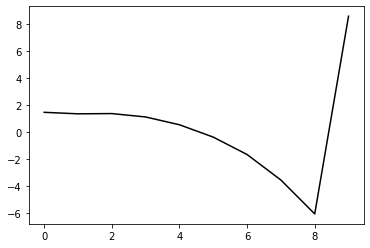

41800 0.3086949341293311
2.033778228699832 -0.43684906705523213 -0.21318237117053568 -0.2109121210341068
[ 1.30394097  1.48713552  1.49248189  1.23437289  0.64751681 -0.29557355
 -1.63822664 -3.59707287 -6.20575821  8.5391262 ]


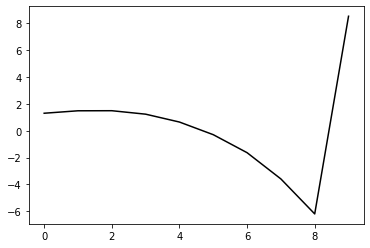

42900 0.8162992059820403
1.9964444928512892 -0.5289316610527934 -0.1877999614064338 -0.24086183870405287
[ 1.49439169  1.2688166   1.29439025  1.05568003  0.48821869 -0.44989252
 -1.80619176 -3.78669525 -6.41848729  8.51275316]


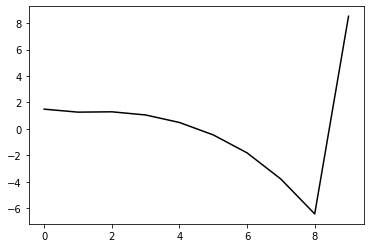

44000 0.4968230506278801
1.9663732723503775 -0.5577203751208437 -0.20294972414310858 -0.22666532328012418
[ 1.37089147  1.36431344  1.35903188  1.11161379  0.53572866 -0.42447368
 -1.82525392 -3.87030508 -6.60222532  8.52422911]


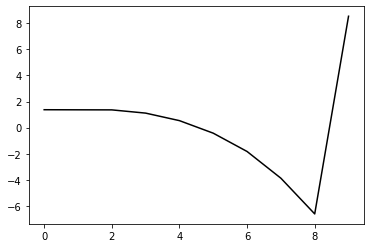

45100 0.4968958991827439
1.9644549536502296 -0.7287054156804095 -0.240700512718354 -0.20153485447747
[ 1.21840555  1.46903646  1.48120376  1.24621219  0.68336872 -0.27633443
 -1.69842885 -3.78154738 -6.57049793  8.5500377 ]


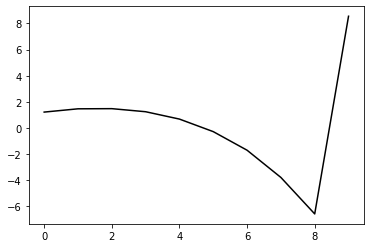

46200 0.44616702181583057
1.9081506593819244 -0.8268557923646409 -0.2274105720905973 -0.22654676201473237
[ 1.36096306  1.34790831  1.32497783  1.09563403  0.54195169 -0.41715219
 -1.85527946 -3.96689533 -6.79534615  8.53929712]


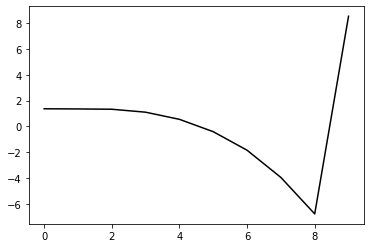

47300 0.44568080779349434
1.8583101470694254 -0.9924498018847421 -0.24224272471623054 -0.22982235931988448
[ 1.37835984  1.3054185   1.29553129  1.07709923  0.53918652 -0.4136703
 -1.86667649 -4.01435764 -6.90017328  8.47955283]


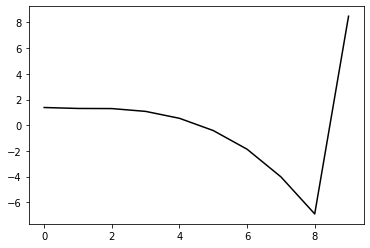

48400 0.4084778881023764
1.850394395339837 -1.0413686606311028 -0.26177356648992356 -0.23479595120985314
[ 1.42724706  1.27427575  1.28210491  1.09120344  0.59486641 -0.30682516
 -1.70690348 -3.81125742 -6.68835366  8.60163144]


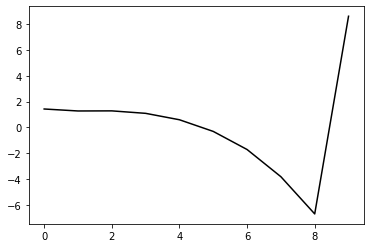

49500 0.37534569612491636
1.7951976685296613 -1.0178300007314884 -0.26198246503365014 -0.2323746880507739
[ 1.49557959  1.20917757  1.17643936  0.98929223  0.51313701 -0.35673587
 -1.72314418 -3.8109346  -6.73258205  8.54674195]


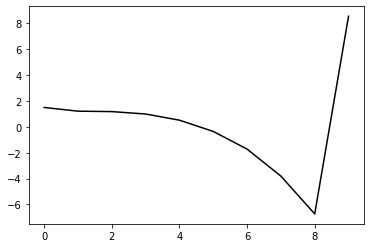

50600 0.41525773127696874
1.7649963779715234 -1.0147113824804288 -0.27627787372501555 -0.2238332876444802
[ 1.37706903  1.35355796  1.28020789  1.08651656  0.61834904 -0.23694037
 -1.59030823 -3.67944585 -6.65417402  8.5361595 ]


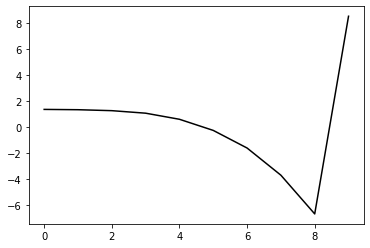

51700 0.481553382476511
1.7200879202786312 -1.1515507205649387 -0.3193588053999403 -0.229771793110808
[ 1.32386826  1.44518942  1.41053724  1.25297702  0.83982516  0.04956897
 -1.2408367  -3.28724314 -6.27998335  8.64459353]


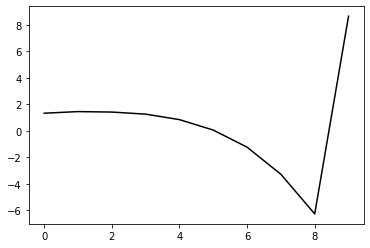

52800 0.18824625180386254
1.731784569808627 -1.102476307885071 -0.3120720447512678 -0.24470014152448824
[ 1.48739367  1.35433586  1.32161783  1.1989892   0.84678454  0.14125698
 -1.04600921 -2.98119139 -5.87504655  8.59449328]


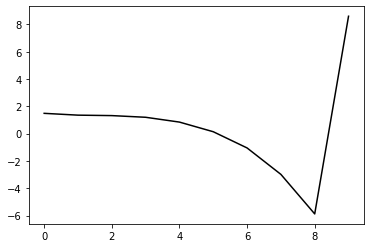

53900 0.2317329093495194
1.7086713769990949 -1.0990059567011574 -0.32428104767560345 -0.23777122197773526
[ 1.46467281  1.42664796  1.37827444  1.26814527  0.95665043  0.31566271
 -0.79742106 -2.68297005 -5.62862797  8.62882606]


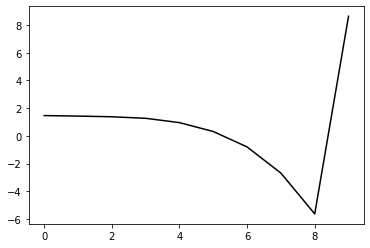

55000 0.23690574004681106
1.7097845481185359 -1.085512655745768 -0.3268591627818837 -0.24014914275618157
[ 1.47035273  1.47392409  1.42224398  1.31899402  1.03259699  0.42716872
 -0.6517646  -2.51683755 -5.47905344  8.59230654]


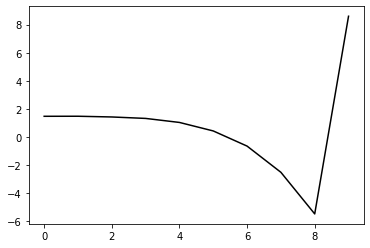

56100 0.2984928850411362
1.547518574180114 -1.1218427917320253 -0.33637736504424365 -0.22805676105495645
[ 1.63017371  1.23862121  1.14375251  1.01323486  0.71097197  0.09393528
 -1.00965397 -2.94440511 -6.07515492  8.66872148]


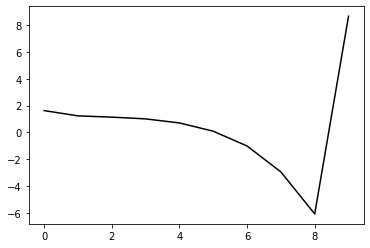

57200 0.2204477230211402
1.655068881015098 -1.060717590146031 -0.32342946383529747 -0.2443805590285398
[ 1.58346286  1.42053419  1.33287047  1.227469    0.96699202  0.40556104
 -0.63054813 -2.47755465 -5.47872428  8.62009834]


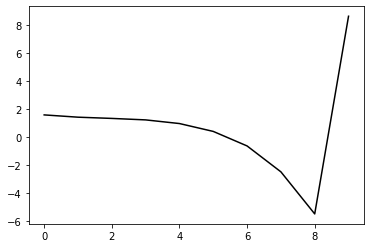

58300 0.24857141033974947
1.5974824220971704 -1.099092156094476 -0.3391574956449587 -0.24241908465327527
[ 1.60589169  1.40641894  1.30514888  1.18372074  0.91411672  0.3425024
 -0.71652671 -2.60860611 -5.68375377  8.6411616 ]


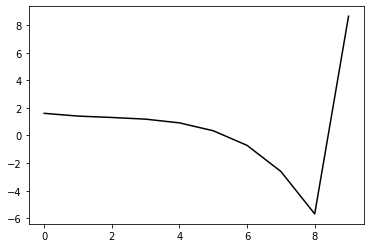

59400 0.1589739902589458
1.5979903570020815 -1.0915729949249748 -0.33842577692832326 -0.24854432866452963
[ 1.60302576  1.46404593  1.36991204  1.25897074  1.01061849  0.46843141
 -0.5602023  -2.4280881  -5.50315473  8.62613532]


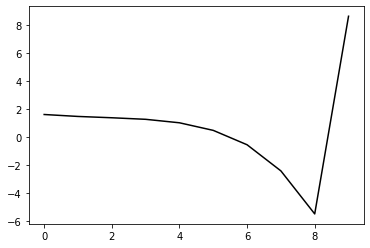

60500 0.41680466272166056
1.550213744929994 -1.121131080340085 -0.36374204571348717 -0.22905460600984817
[ 1.5695418   1.52557585  1.43890979  1.32671491  1.08119841  0.54352251
 -0.48930833 -2.38598172 -5.55690229  8.55330118]


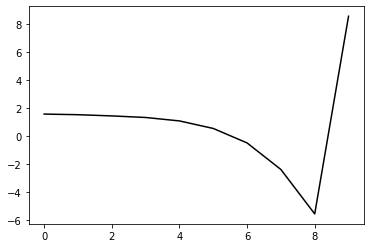

61600 0.43115820056443305
1.6162691838836143 -1.0729857035805113 -0.35116610877775795 -0.22883465136887063
[ 1.50299011  1.63891849  1.55522794  1.4497257   1.22172726  0.71385786
 -0.28089527 -2.13558576 -5.28788347  8.64303668]


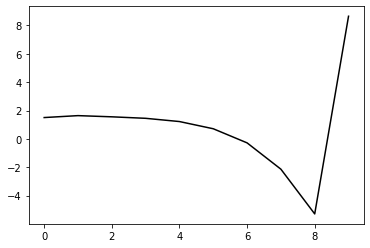

62700 0.06851078497105222
1.6184369257109346 -1.0464128421788719 -0.3339755350294887 -0.24073249249188425
[ 1.57811585  1.59531199  1.50101006  1.37663538  1.13370751  0.61510573
 -0.39221771 -2.26634829 -5.43925133  8.66567819]


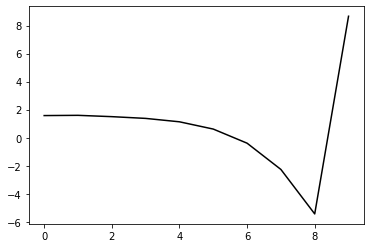

63800 0.6306230430129618
1.5967445940521714 -1.0192000719306316 -0.30962351791825343 -0.2597658366729247
[ 1.69281845  1.47713532  1.38851488  1.25788703  1.01020788  0.4908339
 -0.51892017 -2.40467098 -5.61579867  8.59434645]


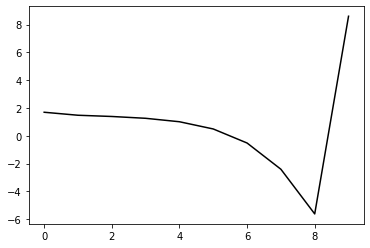

64900 0.22102164415354203
1.5413292866370225 -1.058011685778082 -0.3463068170672838 -0.22272297470402866
[ 1.5847795   1.57168166  1.47866936  1.33778451  1.07872427  0.54773798
 -0.48209826 -2.41099042 -5.72467248  8.65916617]


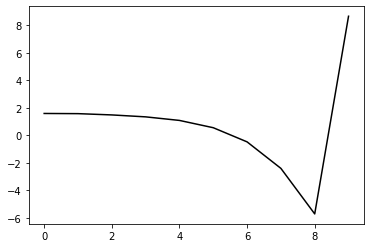

66000 0.24233380279164074
1.5719633989137722 -1.0292705162020401 -0.3310513609421161 -0.24179703665759453
[ 1.66557351  1.55264959  1.47354053  1.33746761  1.08719862  0.57410433
 -0.43026005 -2.32663648 -5.60349746  8.63927945]


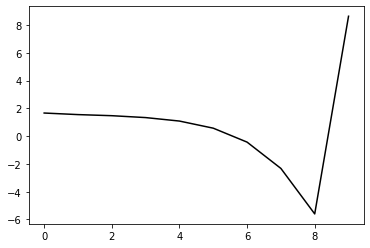

67100 0.2692070268096015
1.5696680580601912 -1.0189269984153733 -0.32598191140749916 -0.24951670348438854
[ 1.64078901  1.62238848  1.55343306  1.4227647   1.17914023  0.67834546
 -0.31107829 -2.19548834 -5.47557984  8.58525402]


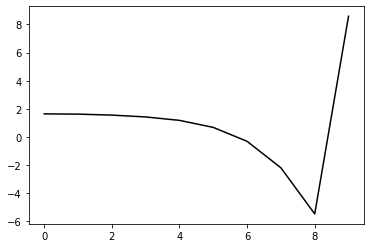

68200 0.30388336234270896
1.5849678499443902 -1.0257536885399725 -0.34294212535034413 -0.23976864544720658
[ 1.54235862  1.74115193  1.69945105  1.58681494  1.36169703  0.88559836
 -0.07505938 -1.93188801 -5.19850191  8.70661625]


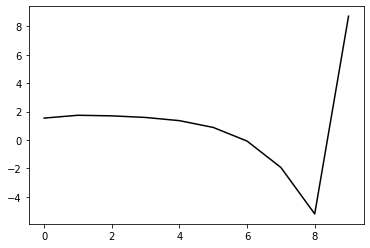

69300 0.23241052422810005
1.5585267207651359 -1.0197698200448553 -0.34284261788314624 -0.23424930292399712
[ 1.59569585  1.69574138  1.66015957  1.55530573  1.33646508  0.86934409
 -0.08453768 -1.9523279  -5.287555    8.61851139]


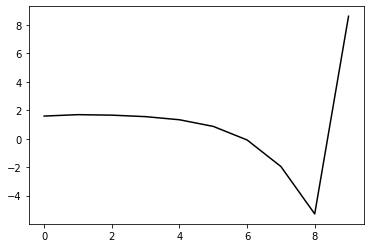

70400 0.1574403034883586
1.5761496188077195 -0.9899729942917384 -0.32746286678350794 -0.24345731599690681
[ 1.6413966   1.66679163  1.62515304  1.50770622  1.27455397  0.79474078
 -0.17271356 -2.06036181 -5.41812873  8.68778039]


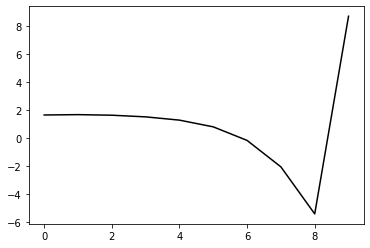

71500 0.2071342608651191
1.528992782075129 -0.9825348367660414 -0.3248910482184906 -0.24189072236282066
[ 1.6436004   1.64817421  1.58799069  1.45608639  1.20908172  0.71900375
 -0.25910981 -2.171191   -5.59771962  8.57357218]


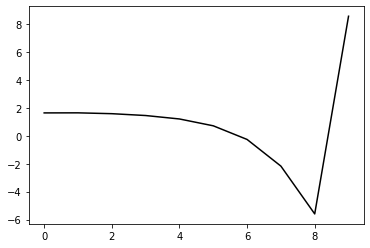

72600 0.2117709545526342
1.5345003391554106 -0.9765650261341426 -0.331589429532012 -0.23230169277251658
[ 1.57868348  1.72817707  1.67896191  1.55388168  1.31399147  0.83397257
 -0.13343569 -2.04362495 -5.50354748  8.67176058]


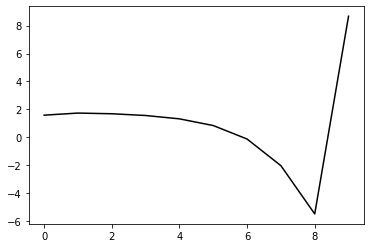

73700 0.19074345955758737
1.486846018790863 -0.9851695439767247 -0.3289373946793387 -0.24332485655333816
[ 1.70043114  1.58756438  1.54690329  1.41728394  1.16672816  0.6728885
 -0.31464913 -2.26051085 -5.77720499  8.63349372]


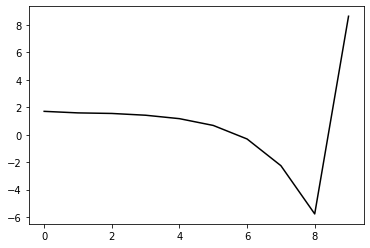

74800 0.17815682307123937
1.4839269681218406 -0.9775754224164166 -0.33219036896484805 -0.236780507115018
[ 1.63969254  1.65746379  1.62293564  1.49497235  1.24310606  0.74841248
 -0.24084293 -2.19673796 -5.74285917  8.62729922]


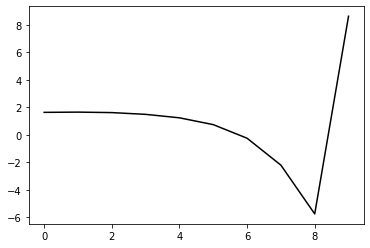

75900 0.21323785609759366
1.4480918301982801 -0.9949140743216839 -0.34509673829548804 -0.22626459863955753
[ 1.63306039  1.64336276  1.61037918  1.48255507  1.22452718  0.71944023
 -0.28803834 -2.28244197 -5.90078704  8.6682953 ]


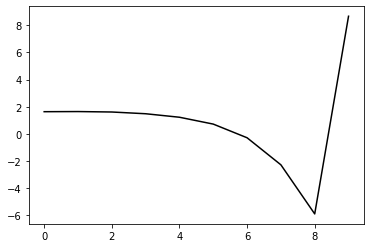

77000 0.263016035053455
1.485903537326301 -0.9680201534631409 -0.3296550123241529 -0.2441852399480806
[ 1.68577853  1.64237362  1.63743231  1.53333309  1.3005311   0.82819085
 -0.13508647 -2.07699821 -5.64755711  8.5882208 ]


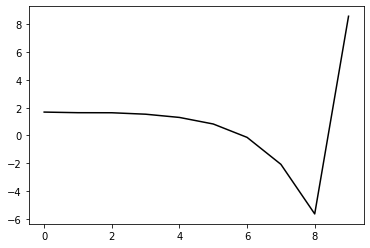

78100 0.21396929272134146
1.4862473525149997 -0.9690722484616937 -0.3312459593532836 -0.24882403926429625
[ 1.67113784  1.68870994  1.69151709  1.59353192  1.36323532  0.8923879
 -0.07079181 -2.02022204 -5.60779295  8.67947622]


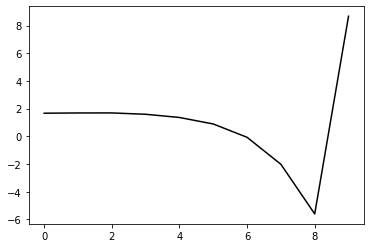

79200 0.23221281884075665
1.4339415677662548 -0.9846570397964384 -0.3424940265292049 -0.2370890391748054
[ 1.67229276  1.65838536  1.6591309   1.55552373  1.31425757  0.82761115
 -0.16010291 -2.16072399 -5.87353794  8.59043159]


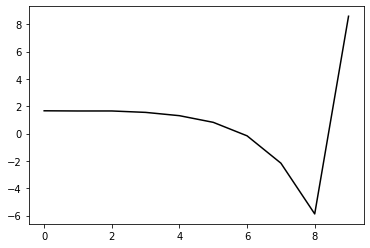

80300 0.21177238408084229
1.431094055292376 -0.9821673815981641 -0.34469497361575974 -0.23862944947824877
[ 1.66521629e+00  1.70528162e+00  1.71775679e+00  1.63577923e+00
  1.41682838e+00  9.55706951e-01 -1.07939934e-03 -1.96941361e+00
 -5.65759923e+00  8.63242027e+00]


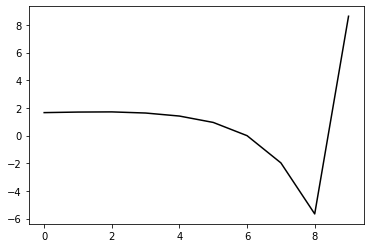

81400 0.1409858635801342
1.4537484708127222 -0.9510122621477262 -0.32928152029521035 -0.24222011515892727
[ 1.64837668  1.73743308  1.74754799  1.65408324  1.4217009   0.94618207
 -0.02504018 -2.01352838 -5.74030054  8.52372956]


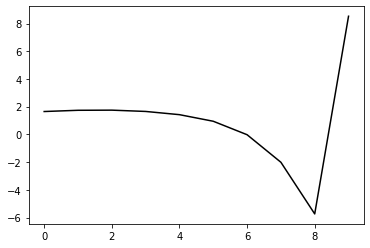

82500 0.28531207595117425
1.492774943945958 -0.9246943141048826 -0.31983994092411966 -0.2462858957640979
[ 1.67110287  1.73038922  1.7564581   1.67192425  1.44771855  0.98218092
  0.02476822 -1.94784994 -5.65259154  8.62717423]


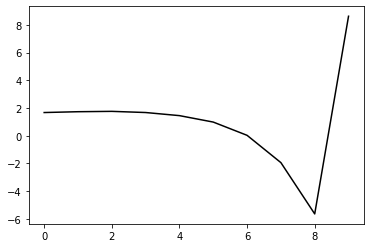

83600 0.25364125985318675
1.4343562977808588 -0.952446973480343 -0.33790379786957286 -0.22946686171285904
[ 1.56312867  1.78719852  1.80354978  1.70252021  1.45042181  0.94434875
 -0.06990952 -2.12631532 -5.94757624  8.6096268 ]


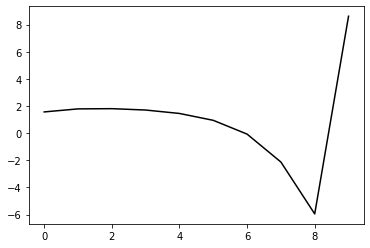

84700 0.23308895021642448
1.4134989542933776 -0.9459360101184208 -0.32919755955151986 -0.2435513512686886
[ 1.72917257  1.61687933  1.63814725  1.54920973  1.30840379  0.81465736
 -0.18391526 -2.22462923 -6.03010359  8.66365002]


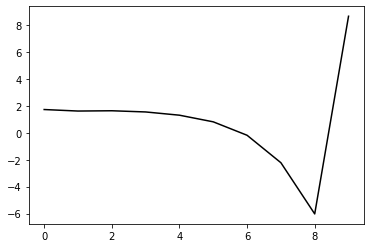

85800 0.21156201823449605
1.3840196697439702 -0.9463586009458441 -0.33990796513855404 -0.2237857719139115
[ 1.65149728  1.66689388  1.67369643  1.58262963  1.34146089  0.84791126
 -0.15255445 -2.21344401 -6.09638686  8.65576855]


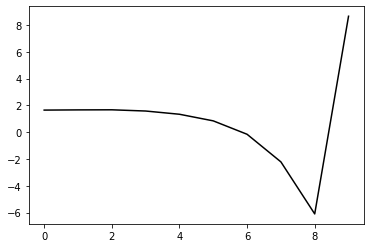

86900 0.2752891030703163
1.4496692732383882 -0.9143497309793507 -0.3333985453247262 -0.22523799981590295
[ 1.58068929  1.81872351  1.86048887  1.79508811  1.58231267  1.1198721
  0.15425553 -1.87441617 -5.75075313  8.64564482]


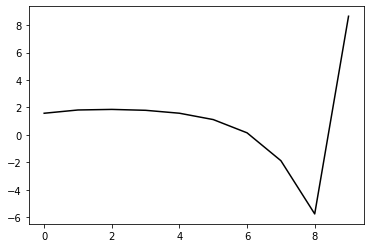

88000 0.20417066065327788
1.4417824615154038 -0.9139362867598582 -0.33273336271473536 -0.2291038098651241
[ 1.6083484   1.79331728  1.84608891  1.78685719  1.57766195  1.11658656
  0.15164252 -1.87945638 -5.76605986  8.61571314]


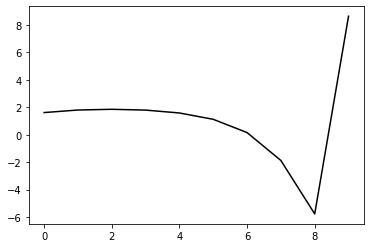

89100 0.2824171457946869
1.403190232127466 -0.9150917151211252 -0.32419412135757775 -0.24557864605750843
[ 1.67942558  1.7494466   1.7972634   1.73012565  1.50736841  1.02610714
  0.03451502 -2.03029336 -5.95173282  8.60393617]


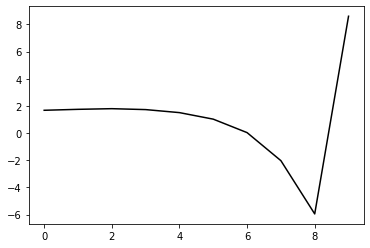

90200 0.1688296692914269
1.4090575612097227 -0.9078062701703848 -0.33195945568353025 -0.23225073333261176
[ 1.61843914  1.81156761  1.87111674  1.81091323  1.59402185  1.11823346
  0.13098165 -1.9383245  -5.89329611  8.56479399]


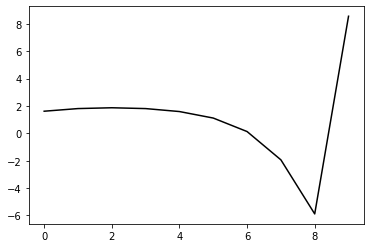

91300 0.25286697933545255
1.3477637793862174 -0.9351408224012545 -0.34514730412572814 -0.23192281865880518
[ 1.64785696  1.74549443  1.80153817  1.73294593  1.50037394  1.00064562
 -0.02026854 -2.13686989 -6.15214943  8.57205407]


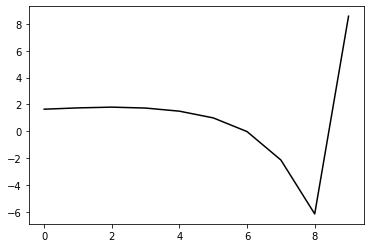

92400 0.13655696445331805
1.4056883718232769 -0.8906170183847875 -0.3264910019003754 -0.23911170668760828
[ 1.64994449  1.78489557  1.85521623  1.80733941  1.60134964  1.13739672
  0.16449657 -1.90001457 -5.8882467   8.62734087]


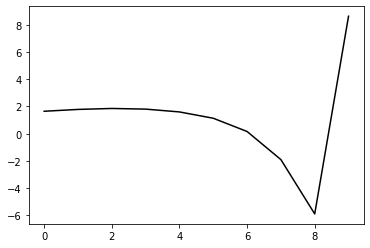

93500 0.19228514521899226
1.4134232956867696 -0.8705423343134284 -0.3238440033703217 -0.23967403538761148
[ 1.63849174  1.8140228   1.88866814  1.84670756  1.64447217  1.17966399
  0.1962704  -1.89751355 -5.93930461  8.53291449]


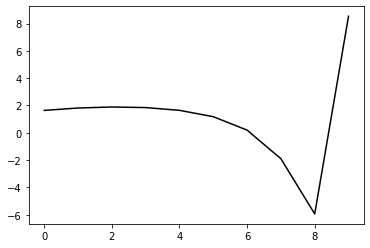

94600 0.33277728048560723
1.3678730347928796 -0.8979542089016419 -0.346266592329084 -0.22755633894109473
[ 1.53136218  1.89050725  1.96303016  1.91389558  1.69978897  1.21718359
  0.20842017 -1.92430333 -6.03232914  8.63902378]


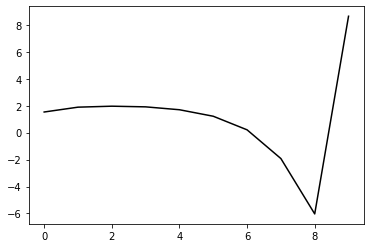

95700 0.11638752693189933
1.3617164404395534 -0.8831654155353712 -0.3364245240541064 -0.23829301630025773
[ 1.65701815  1.76489056  1.84202159  1.79442049  1.58065612  1.0977522
  0.08969462 -2.04088162 -6.14262474  8.58421433]


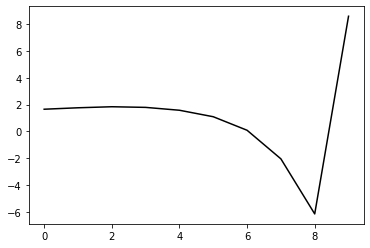

96800 0.19927341826809425
1.3472194440095586 -0.8889380007006706 -0.34166185530927734 -0.2383961580410251
[ 1.55729373  1.85720638  1.95087572  1.90708185  1.69180281  1.20216758
  0.18183868 -1.97012842 -6.1158169   8.50523538]


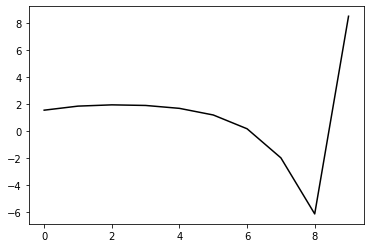

97900 0.17345086818885505
1.3656118886645832 -0.8657293621333111 -0.3325955148964028 -0.23505092219017895
[ 1.60667015  1.81156724  1.90410273  1.86315955  1.64871486  1.15962858
  0.14183562 -2.00539326 -6.14721285  8.59601231]


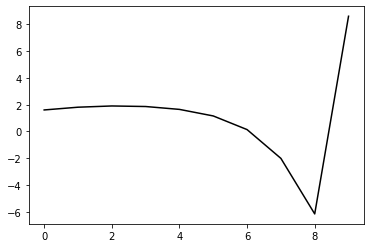

99000 0.2028830780560275
1.370732538268791 -0.8619602560823374 -0.33419221081848394 -0.24336343595832483
[ 1.67040501  1.78563451  1.91924468  1.92495193  1.75998077  1.32350507
  0.36110856 -1.73460968 -5.84889253  8.62986916]


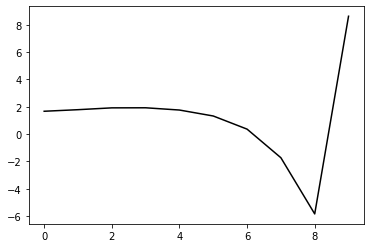

100100 0.2058332783236485
1.347639763461385 -0.858298424671566 -0.33547852643019815 -0.2369337928335236
[ 1.62078284  1.80522019  1.9069304   1.89311445  1.7053059   1.2405886
  0.24404716 -1.89447144 -6.0664629   8.54765827]


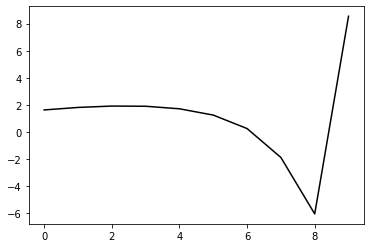

101200 0.18356591338352754
1.3474297594054025 -0.8621472521272942 -0.34257668009111214 -0.24052766701705292
[ 1.62292066  1.82836631  1.94606689  1.96620354  1.81655196  1.38957107
  0.42787686 -1.68541873 -5.85769747  8.59409744]


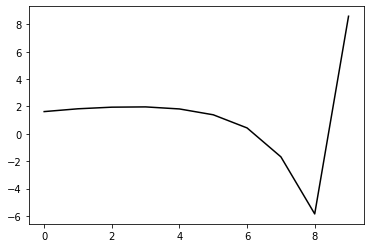

102300 0.20576056187784536
1.3302564376788744 -0.8580132220646708 -0.33959184041779433 -0.2431667663795627
[ 1.66313166  1.772704    1.88549411  1.88801607  1.72097713  1.27289358
  0.28625737 -1.85646471 -6.06820965  8.59854721]


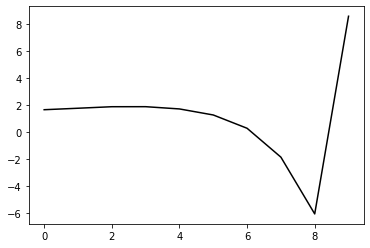

103400 0.15251724034189104
1.2996957374415254 -0.8459122101530872 -0.3366804359756146 -0.23638226793887093
[ 1.6137693   1.82171748  1.90601345  1.89018777  1.70705715  1.242581
  0.23654426 -1.93624849 -6.21656682  8.56392719]


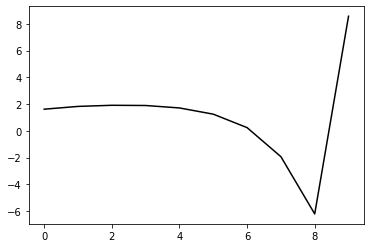

104500 0.30544942797286734
1.2527881175100635 -0.8748060456281034 -0.35655012053861945 -0.23170206753312006
[ 1.59223126  1.81991854  1.91985759  1.90847245  1.72626702  1.25634554
  0.23607415 -1.96221606 -6.28703686  8.61391081]


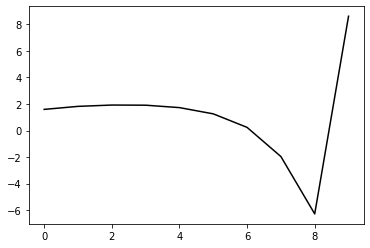

105600 0.22940158802218377
1.3128564196097396 -0.8364141726668038 -0.34401028148387996 -0.23808999095688366
[ 1.62842203  1.82264082  1.94682268  1.97088925  1.83205905  1.41150978
  0.44345593 -1.70581562 -5.99779108  8.57545323]


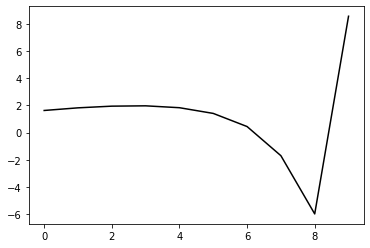

106700 0.06003455836773822
1.3408976939126094 -0.8110457197584731 -0.3340592478045894 -0.24203868426200298
[ 1.64584177  1.83111933  1.97092588  2.01602843  1.90359599  1.51270481
  0.57398096 -1.55238011 -5.84156357  8.62866274]


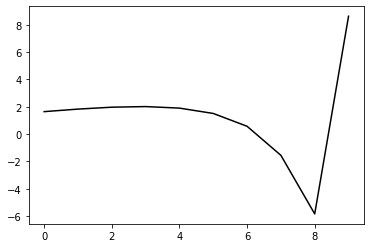

107800 0.16211097052611073
1.2968604130339154 -0.8205078283389844 -0.34246166541968653 -0.22755180710587064
[ 1.63932811  1.78033612  1.90278251  1.93592335  1.80808474  1.39616279
  0.43066243 -1.72756262 -6.06335948  8.66418023]


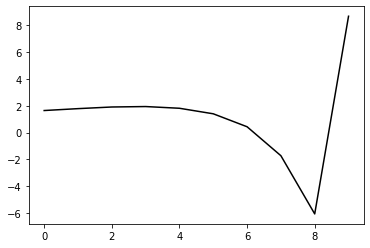

108900 0.32295719963394776
1.3006297552638082 -0.8117529814093825 -0.34080257835237526 -0.222400697332125
[ 1.57741685  1.87511947  1.97254836  1.98795741  1.84250528  1.41008577
  0.42319514 -1.75224535 -6.1027584   8.57043951]


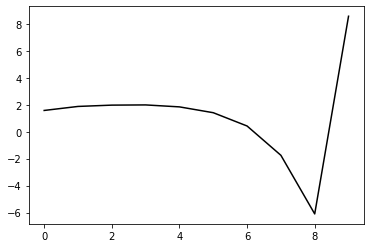

110000 0.25067091336371483
1.3016246502447826 -0.7925084163647873 -0.3291371521584987 -0.23546354923852336
[ 1.66881348  1.79461145  1.90486692  1.92213674  1.78254047  1.35854738
  0.38082443 -1.78726591 -6.13845214  8.62057021]


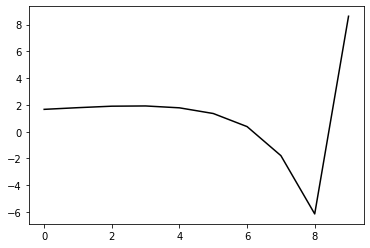

111100 0.9768630304193464
1.2902454633349012 -0.7824675708147885 -0.3145004352319569 -0.2692399152344011
[ 1.85019764  1.65752408  1.80504316  1.85977842  1.76399307  1.39056963
  0.46789855 -1.64430172 -5.95033955  8.58843613]


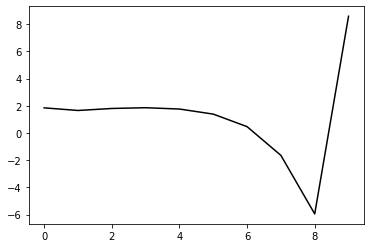

112200 0.23445295207583491
1.2332338844028818 -0.8121408218511702 -0.33993107199741085 -0.2380048047754593
[ 1.53428871  1.90454676  1.96855325  1.94887018  1.77238991  1.30903105
  0.28583943 -1.94233261 -6.41783177  8.59432097]


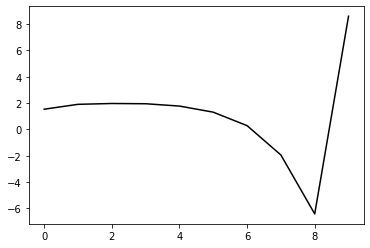

113300 0.1890811807026089
1.2543113823224128 -0.7919551493973602 -0.3361925206260894 -0.2417862220195071
[ 1.58678134  1.8790855   1.98213604  1.99024635  1.85110462  1.43393808
  0.45978621 -1.72483888 -6.17279015  8.54683299]


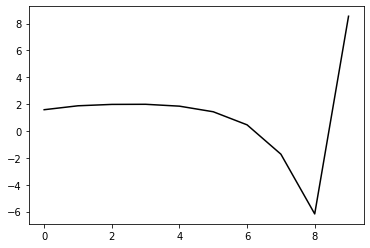

114400 0.27606860707216535
1.2184859406803288 -0.8041639523771427 -0.3388082335868201 -0.25592405977711513
[ 1.71208216  1.67513163  1.82509694  1.84976834  1.71980103  1.30992455
  0.34137405 -1.83767929 -6.27949966  8.57809733]


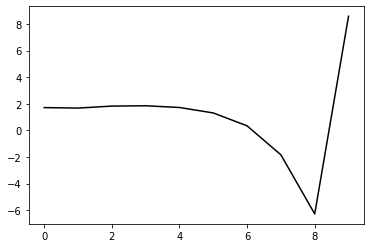

115500 0.22756477295520677
1.2596967449802363 -0.7824845041560113 -0.3409725701223196 -0.24421369827066022
[ 1.58917213  1.84388514  2.00783263  2.06794     1.9730726   1.60017077
  0.66639549 -1.48930404 -5.94276804  8.57135041]


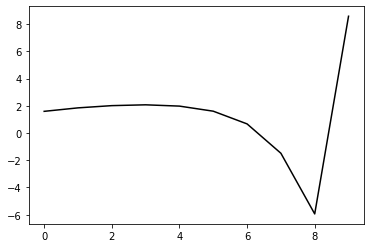

116600 0.2760082802774492
1.2186109782496999 -0.7759389105350859 -0.3372459577619729 -0.24196409767204188
[ 1.61484682  1.80747338  1.91698135  1.94236604  1.80869502  1.39186105
  0.41040089 -1.79709849 -6.3171075   8.52724293]


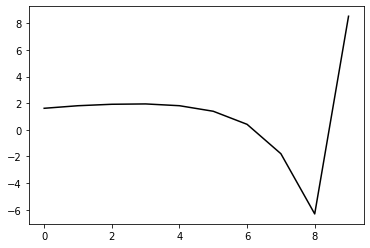

117700 0.10232780715858504
1.2111021548141097 -0.7886291783843618 -0.35096802061129323 -0.23834965526226726
[ 1.59274326  1.83888144  1.96756097  2.0084336   1.89181699  1.49060877
  0.52183517 -1.67889927 -6.20740942  8.58341479]


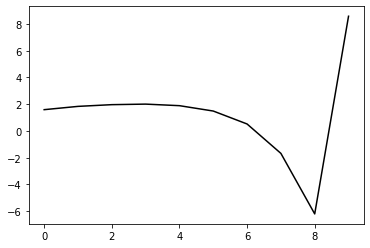

118800 0.4233861231536644
1.1992894781391967 -0.8024732509101726 -0.3693876512082206 -0.22716568753695973
[ 1.57005343  1.83022855  1.98780648  2.03902173  1.93086802  1.53291663
  0.55924068 -1.65653892 -6.21446572  8.59979873]


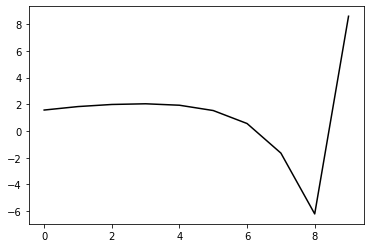

119900 0.20280397835469624
1.2261121198226352 -0.7443859532451456 -0.33451007259493154 -0.2432231769244999
[ 1.61414995  1.80840135  1.94363008  1.98259388  1.86459792  1.46013262
  0.48051456 -1.74799997 -6.34064956  8.60898925]


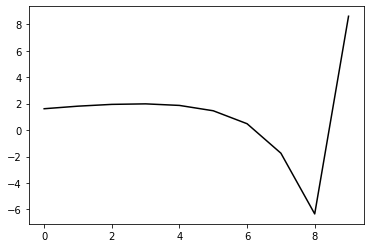

121000 0.9055047068334419
1.2331133663281546 -0.6977695366800051 -0.3013703095811812 -0.27837741345542805
[ 1.75491539  1.73179219  1.87787636  1.9518509   1.87953256  1.53198813
  0.6171487  -1.54850853 -6.09973592  8.55680206]


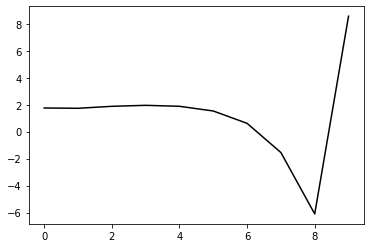

122100 0.19939958956003415
1.169221708929571 -0.7567742127484205 -0.3451026026108847 -0.24580206814630562
[ 1.65496415  1.76204085  1.8907181   1.93987765  1.83893839  1.45665135
  0.50154511 -1.71121991 -6.33323376  8.58750758]


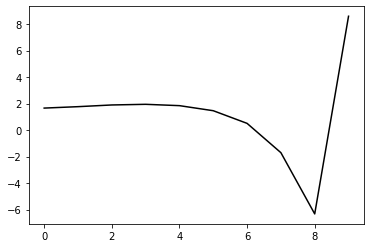

123200 0.862066136633565
1.192902652079098 -0.6907359509356483 -0.294804640973291 -0.2852625146900134
[ 1.77609484  1.72208137  1.8401877   1.9045068   1.82800054  1.47875587
  0.56286576 -1.6119406  -6.21654055  8.57061518]


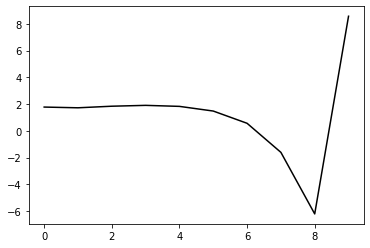

124300 0.19164122224201727
1.181829276953132 -0.715837421943784 -0.3326743292147743 -0.2461561888359399
[ 1.59989026  1.86266754  1.98311682  2.02487149  1.92625878  1.55164002
  0.60446059 -1.61478563 -6.30834108  8.58093014]


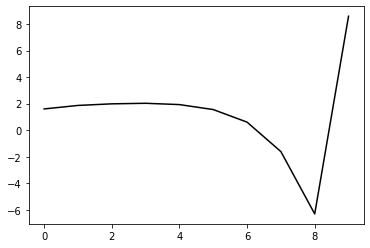

125400 0.13726557970751013
1.168383797393192 -0.7080456825917417 -0.33340775658870003 -0.24299645205393827
[ 1.57072666  1.85297202  1.99108461  2.03200731  1.92794842  1.54518019
  0.58378026 -1.66300069 -6.41778947  8.65198884]


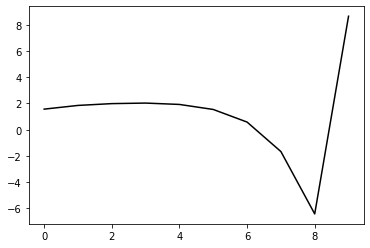

126500 0.26735475549131277
1.1792576016207375 -0.6990137601519163 -0.32845666565993076 -0.25313670616655626
[ 1.64712217  1.81440925  1.97930229  2.04759977  1.97434505  1.62815397
  0.70337484 -1.51473932 -6.25226733  8.55757941]


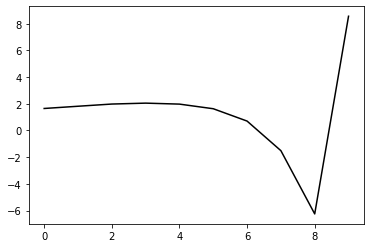

127600 0.8257455919547387
1.2084845263061976 -0.7081346177753287 -0.35325078227270024 -0.22871741019859584
[ 1.40840512  2.0670481   2.24896898  2.32331381  2.24548314  1.88522023
  0.94117946 -1.29914156 -6.0759255   8.60735718]


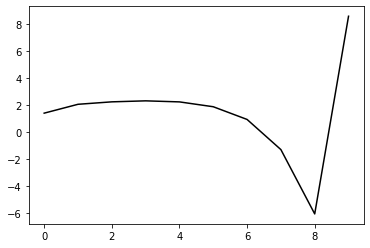

128700 0.08832743894783725
1.1306245158223076 -0.7280638973373661 -0.35210238403433924 -0.24905172777403145
[ 1.58971483  1.8483731   2.03668986  2.12121743  2.05150805  1.70262068
  0.77492316 -1.44653373 -6.20788838  8.50530055]


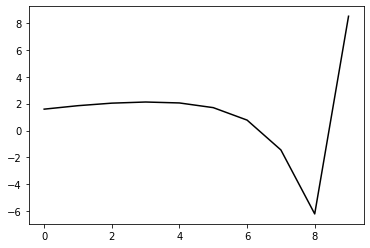

129800 0.1736834122694951
1.1568496028920006 -0.6971494090054382 -0.3415806397989156 -0.23901329661056792
[ 1.56307781  1.8636979   2.0227033   2.08086897  1.98097305  1.60150586
  0.64900504 -1.58784575 -6.35934006  8.58267874]


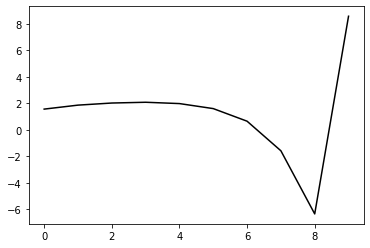

130900 0.17630679172585348
1.130112937927647 -0.7049361720082604 -0.34548043626259684 -0.24563083734367647
[ 1.60753054  1.80039363  1.96930608  2.04916183  1.9748084   1.62312163
  0.6999845  -1.51053129 -6.27089951  8.56385763]


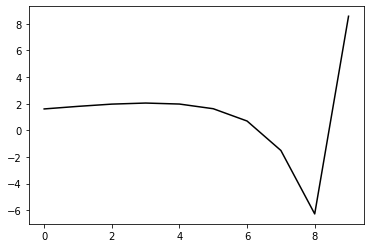

132000 0.3530219533370917
1.1458424730255108 -0.6852538410058452 -0.33765117014970436 -0.251716365934638
[ 1.689887    1.74027436  1.92279915  2.02471094  1.97721323  1.65383255
  0.76006989 -1.42268279 -6.16659346  8.65876099]


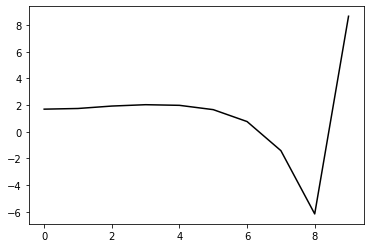

133100 0.3666287950027327
1.16085518141949 -0.6706800063538179 -0.3338430203713172 -0.24816849147329914
[ 1.66585637  1.7895132   1.96818338  2.07659311  2.04051861  1.72936895
  0.84712363 -1.3278585  -6.07970549  8.57957074]


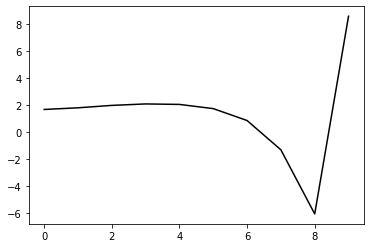

134200 0.33147813224071765
1.027311491814432 -0.7135165011754722 -0.34494910980940346 -0.250848247125024
[ 1.70826372  1.63561632  1.75727941  1.8139486   1.72024953  1.34455469
  0.39511733 -1.84386774 -6.65940763  8.5222417 ]


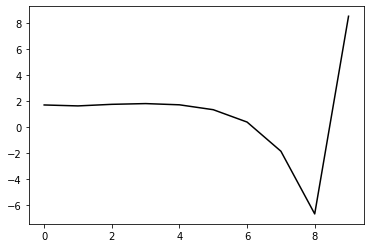

135300 0.18080965022457834
1.1375669236962596 -0.6684376205862244 -0.3397855952514081 -0.24202965144686964
[ 1.61413814  1.85102511  1.99808745  2.09260898  2.04827049  1.72600068
  0.82823022 -1.36723925 -6.15815083  8.69324114]


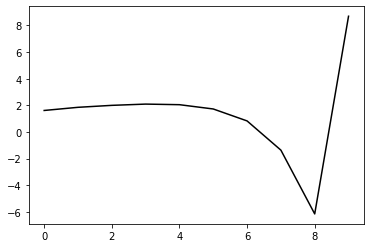

136400 0.14828395221193386
1.088746406656928 -0.689192859554399 -0.34955562007577695 -0.24057753504746804
[ 1.63939178  1.79651216  1.94777075  2.03146948  1.97671182  1.64289672
  0.73132977 -1.48095339 -6.29824209  8.57992969]


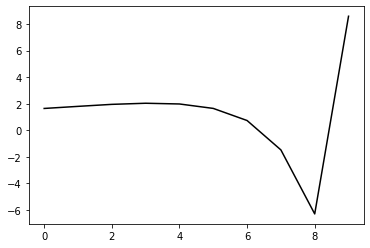

137500 0.234848701900233
1.110295925447748 -0.6479622359339038 -0.33542230336183443 -0.22646162335321912
[ 1.63810905  1.7675676   1.8836432   1.93282994  1.84096744  1.47047327
  0.52498348 -1.71764182 -6.57813971  8.55331822]


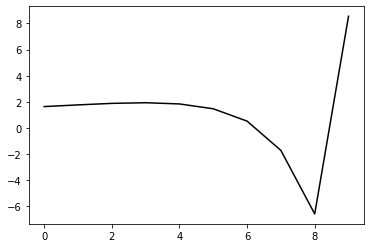

138600 0.22814437285260167
1.1264358208476382 -0.6632298258772658 -0.3477951673975746 -0.23908142408402597
[ 1.5540472   1.96174478  2.14685098  2.25492547  2.22836939  1.92366505
  1.03336863 -1.17374717 -6.02793419  8.50409657]


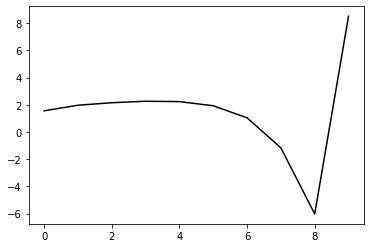

139700 0.08538416500294572
1.0785534565033255 -0.652604671982475 -0.3330355803170161 -0.2408970494488401
[ 1.55873457  1.91113242  2.01436666  2.05715094  1.96266661  1.58869258
  0.63007222 -1.64433299 -6.58741181  8.52424577]


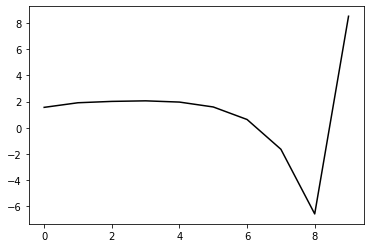

140800 0.16189232373270723
1.0732518128057091 -0.6736778439256335 -0.34799314024783207 -0.2503964004344627
[ 1.57079905  1.91176513  2.0952115   2.17583744  2.11609101  1.77493028
  0.84294836 -1.41262945 -6.34415713  8.59292999]


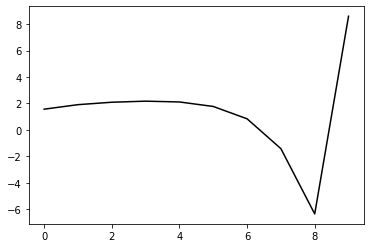

141900 0.4544232707137009
1.0327386465044808 -0.6916120472001592 -0.3648201858881503 -0.23227884362937534
[ 1.53699946  1.85432082  2.04349278  2.13852427  2.08818488  1.757678
  0.83431856 -1.42442426 -6.39560513  8.51268942]


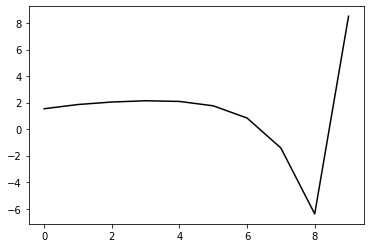

143000 0.2277007553963886
1.0625541708441228 -0.6423207019374177 -0.3415975450876915 -0.238151478720765
[ 1.6465497   1.77495612  1.95332148  2.04570345  1.99381374  1.66489511
  0.74781605 -1.5021081  -6.47108268  8.60147552]


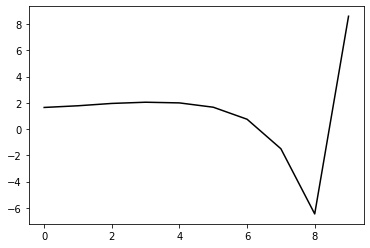

144100 0.1954545940003057
1.0539536511372813 -0.6440437960285836 -0.34279955653937266 -0.250363236391026
[ 1.65166303  1.8055179   1.99646875  2.11276525  2.08674544  1.78434177
  0.89385266 -1.33140736 -6.28108096  8.57833239]


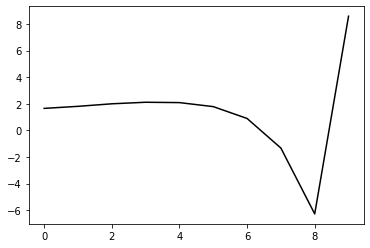

145200 0.22768301523508422
1.0187441216126485 -0.6473330808292844 -0.34404969080715164 -0.25040929870088713
[ 1.64072013  1.75691284  1.9082766   1.99434448  1.94048537  1.61367036
  0.70531834 -1.53235143 -6.49744191  8.54124646]


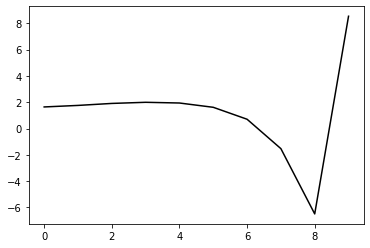

146300 0.6120391791253339
1.04558390368537 -0.6256845624682332 -0.33385329015316934 -0.2634319462633896
[ 1.74045851  1.71368999  1.89889845  2.01191321  1.99099863  1.69978882
  0.82734954 -1.37665978 -6.31276578  8.58715621]


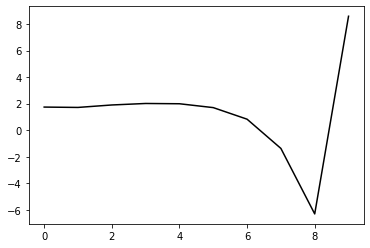

147400 0.16996146551681343
0.9857969180112616 -0.6616441751204213 -0.3565330953155452 -0.251708113971157
[ 1.62716188  1.80477924  1.97760399  2.07144192  2.02238509  1.69288496
  0.77167672 -1.49056385 -6.49945215  8.56560962]


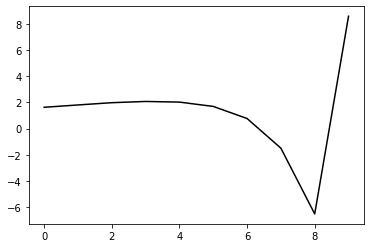

148500 0.33437362744404664
1.043126528428582 -0.6447001665152606 -0.36053425322456356 -0.243621495984586
[ 1.53863033  1.93216072  2.13085378  2.25180024  2.23292878  1.93513935
  1.04420671 -1.19374756 -6.19433958  8.61552391]


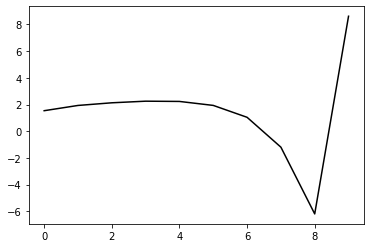

149600 0.26048006293594783
1.0395097768567694 -0.6217725880050734 -0.3444316876331468 -0.24601192178954545
[ 1.5936674   1.88008248  2.0472225   2.13389338  2.07968228  1.74871409
  0.82875494 -1.43465126 -6.46289641  8.56482465]


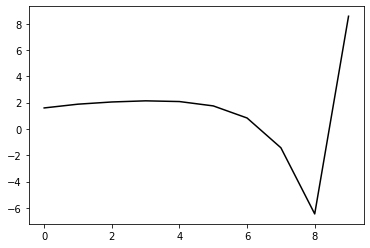

150700 0.09155354740485729
1.006854020289457 -0.6372256058367723 -0.3570212235087456 -0.24383525589211746
[ 1.60745556  1.85316444  2.04195448  2.14878953  2.11209274  1.79568592
  0.8853609  -1.37747442 -6.42562505  8.46792242]


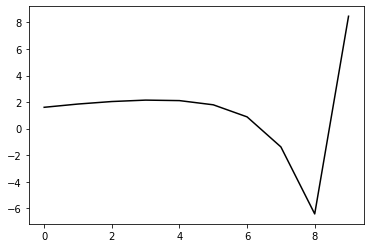

151800 0.18151785341445778
0.9985899472512164 -0.6390617630409793 -0.36276477528069645 -0.24062695019866046
[ 1.57418122  1.8981662   2.08245816  2.19021371  2.15489284  1.83999732
  0.93092515 -1.33339574 -6.39278112  8.57865355]


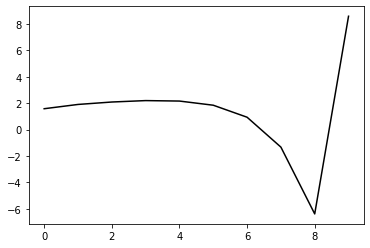

152900 0.19748601678832484
1.0131377709410057 -0.6114397415570813 -0.34682985566226304 -0.24798255137534927
[ 1.60069043  1.84779674  2.02940916  2.13423042  2.10070807  1.79277488
  0.89524249 -1.35694968 -6.41422755  8.56088798]


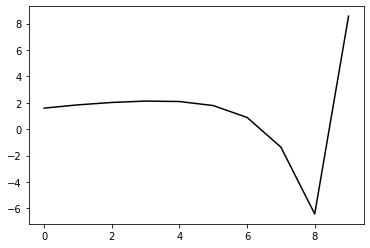

154000 0.20411282515523851
1.000869926803932 -0.6303355038235033 -0.36274912830668943 -0.24818112029172631
[ 1.61425721  1.8948113   2.1158006   2.26167376  2.26449806  1.98095436
  1.09352491 -1.16049971 -6.23269238  8.64865736]


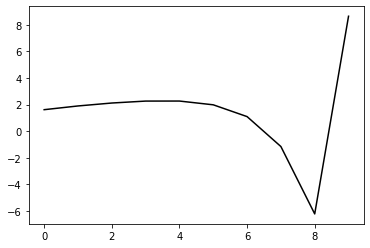

155100 0.17141607386170865
1.0126095612658346 -0.6003249733189132 -0.3458248609659501 -0.25126487351778864
[ 1.58233087  1.9527528   2.16501494  2.28871645  2.26813552  1.96283198
  1.05561485 -1.21916482 -6.32469548  8.53704618]


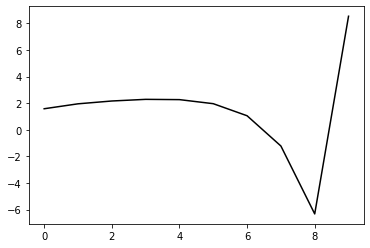

156200 0.21167476713172392
0.957706674719906 -0.6093605621052445 -0.34880629748116665 -0.25028941925960685
[ 1.62663204  1.88632554  2.07239157  2.1725569   2.12440412  1.78966858
  0.85181742 -1.45536462 -6.60386913  8.51861352]


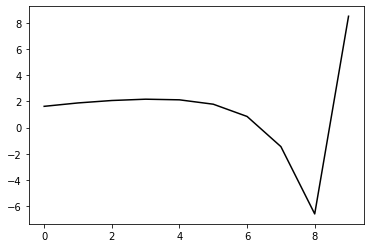

157300 0.2108268425898947
0.9716247443074916 -0.6066142446113655 -0.3534471130085369 -0.24727318061314718
[ 1.59400968  1.89887566  2.10519538  2.20795389  2.15741174  1.81855067
  0.87646006 -1.43468246 -6.59111443  8.54461451]


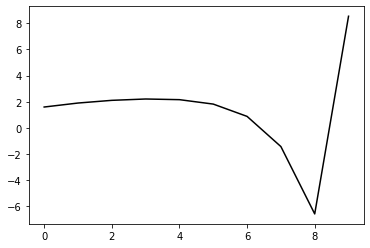

158400 0.2057901473047313
0.9324858448748157 -0.6095049786246345 -0.3506595193452481 -0.25726256269754194
[ 1.62197532  1.813599    2.02222356  2.12284269  2.06218689  1.70931418
  0.75163503 -1.57593618 -6.75720286  8.50057114]


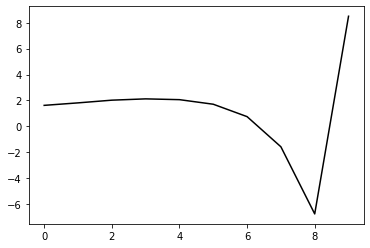

159500 0.2722254418103079
1.0038435771565786 -0.5818100827292956 -0.346968192476468 -0.25814201854655483
[ 1.6609772   1.89563301  2.1672447   2.34787358  2.37378955  2.10583079
  1.22135454 -1.05468995 -6.21851187  8.61810145]


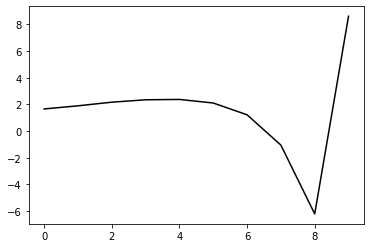

160600 0.24024111609682053
0.9630351009939526 -0.5990445163606004 -0.36059841380583413 -0.2410824838091834
[ 1.58550574  1.89531232  2.12430406  2.26677658  2.25062307  1.93894765
  1.01490056 -1.29415973 -6.4864417   8.56308355]


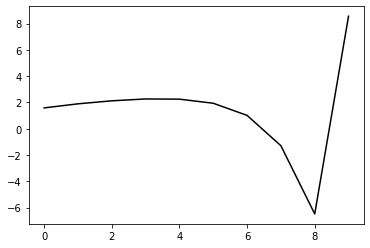

161700 0.24999160837838244
0.9401937101054345 -0.5852859773161152 -0.3481414490320187 -0.2530049679465612
[ 1.73066612  1.69900937  1.92674431  2.07542709  2.06899672  1.76672279
  0.85062456 -1.45288607 -6.64532985  8.50358542]


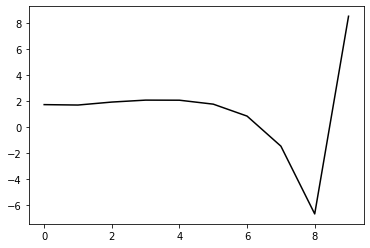

162800 0.16780297762378663
0.966339421664452 -0.5776878168768868 -0.3534750865615461 -0.2409580772429663
[ 1.5626703   1.90888125  2.12529508  2.26617836  2.25295228  1.94152365
  1.01246841 -1.3106819  -6.53893735  8.56436319]


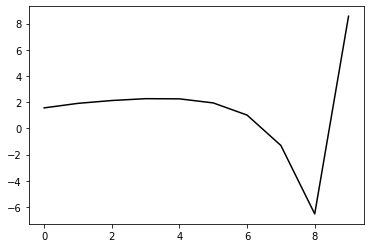

163900 0.22926481025628345
0.9366403595626044 -0.5824256949167536 -0.3515255526509871 -0.24917964363873918
[ 1.59076262  1.86210498  2.05352771  2.16436805  2.12337978  1.79080419
  0.85097276 -1.4725223  -6.69305543  8.5489862 ]


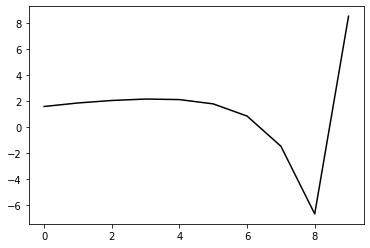

165000 0.2123417549268003
0.9507997458750975 -0.5819091780068593 -0.35726632020498134 -0.24485972015418994
[ 1.59566767  1.8779363   2.10098901  2.22541669  2.19561709  1.87285074
  0.94106881 -1.37619078 -6.59268868  8.47011153]


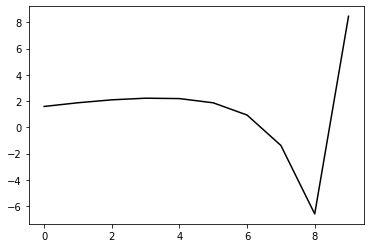

166100 0.1619795013453235
0.9673448748949757 -0.579471355501014 -0.3559244682502693 -0.26227216836644485
[ 1.62407929  1.95670316  2.23109566  2.41214118  2.43773691  2.16396384
  1.2696106  -1.02355264 -6.23348765  8.57761996]


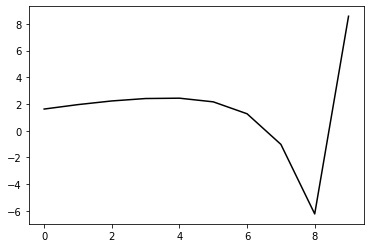

167200 0.1660005041145633
0.9465586704597331 -0.5543833553022395 -0.3459327012118585 -0.2477934281653938
[ 1.57588596  1.92588884  2.12872646  2.24239846  2.20041031  1.8650758
  0.91867077 -1.41916533 -6.67842407  8.53620012]


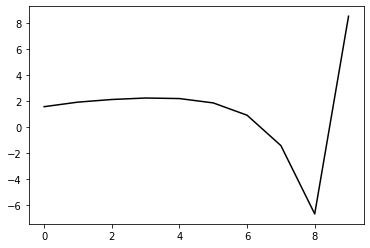

168300 0.22526055992697472
0.9126393150046781 -0.5839939729329938 -0.36033221078125605 -0.25809664102974106
[ 1.62443543  1.90060993  2.14098424  2.27692544  2.2536201   1.93297116
  0.99660548 -1.33539807 -6.59117248  8.55385877]


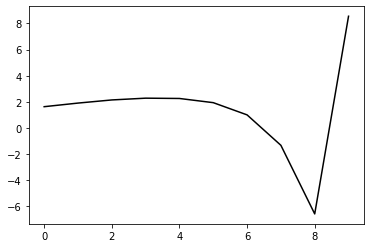

169400 0.12815550501697243
0.9484728490747014 -0.54865825991893 -0.3487067543788344 -0.2528807715027215
[ 1.58549753  1.91101306  2.15231357  2.28636015  2.26239769  1.94530369
  1.0159106  -1.31030792 -6.57444972  8.54294186]


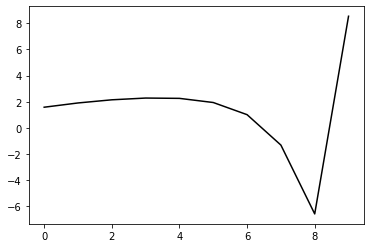

170500 0.26475293386623383
0.9262658261757386 -0.5787993611945815 -0.3688417922202217 -0.249290554137664
[ 1.53674337  1.92720313  2.184958    2.32541432  2.30114504  1.98020935
  1.04520935 -1.28689704 -6.55709607  8.59648647]


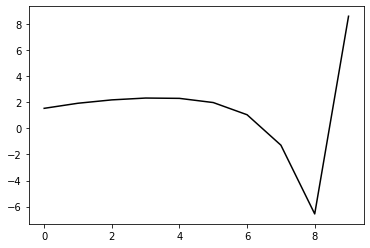

171600 0.29152742970630274
0.9148637770962871 -0.565782134412507 -0.36019873507675887 -0.2598838020568088
[ 1.62002371  1.7894807   2.06227716  2.24240962  2.26237906  1.99013865
  1.10430418 -1.18715858 -6.44179214  8.53826292]


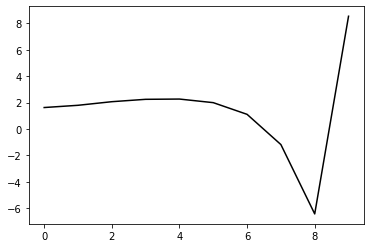

172700 0.27239692207584076
0.8965187335188196 -0.5645244138761004 -0.35917703212940194 -0.2683405317138459
[ 1.71688064  1.62936701  1.88297818  2.07240046  2.11144578  1.86524418
  1.01228069 -1.24446925 -6.47345612  8.58949804]


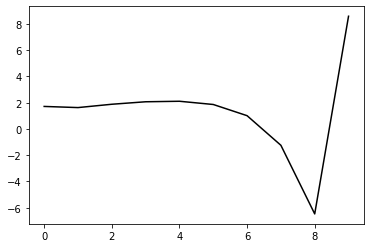

173800 0.32996770934680963
0.8915929921687225 -0.5537242816104094 -0.3560179358777727 -0.2603259918186407
[ 1.71320402  1.61294381  1.81420595  1.96828993  1.97840247  1.7021819
  0.82031257 -1.46435572 -6.73104992  8.60261497]


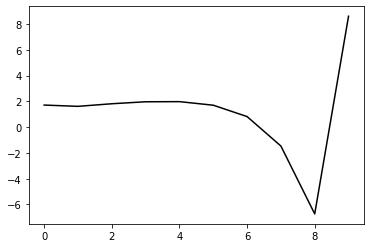

174900 0.24528062945842813
0.8826716423032794 -0.5456562410417132 -0.3563027665211109 -0.2501646803017063
[ 1.57235539  1.76178884  1.92351798  2.04397626  2.02786672  1.72874643
  0.82626347 -1.48008837 -6.7815928   8.546886  ]


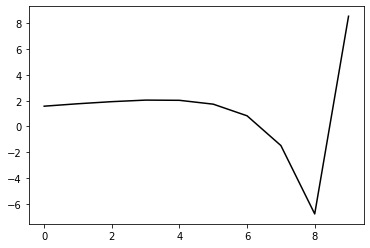

176000 0.25834336509193373
0.9059923163701805 -0.5552897158652804 -0.37142080416640644 -0.2399982343733308
[ 1.52767119  1.86808528  2.05730409  2.17714587  2.16038176  1.85848329
  0.95033771 -1.36329208 -6.67297038  8.52220144]


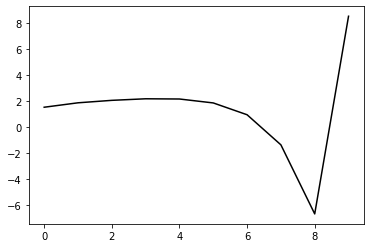

177100 0.16598541629418023
0.9324571216091975 -0.5365667290519037 -0.36082871601548877 -0.26117883256659513
[ 1.57835976  1.89929209  2.13685972  2.29656303  2.32278147  2.0659331
  1.20010782 -1.07617687 -6.35689956  8.62597397]


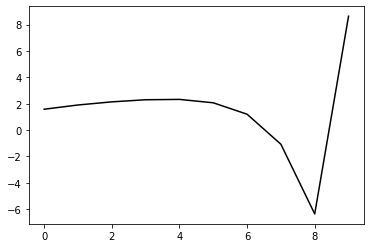

178200 0.859419641822621
0.9146530981490543 -0.5154360724538817 -0.33732908249542615 -0.28910876106925454
[ 1.77206632  1.65991735  1.91374182  2.09970252  2.15101634  1.92416546
  1.09069973 -1.15247578 -6.40301443  8.51297006]


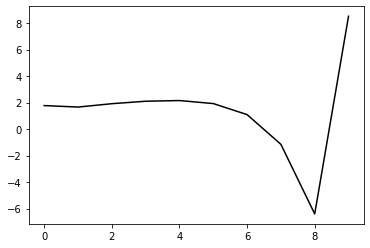

179300 0.2106912380131181
0.9111194067195447 -0.5458024127064902 -0.3655748491499071 -0.25859116650454184
[ 1.54091205  1.90127966  2.10325821  2.21377823  2.17338418  1.85243751
  0.94077991 -1.35870475 -6.65201662  8.54346501]


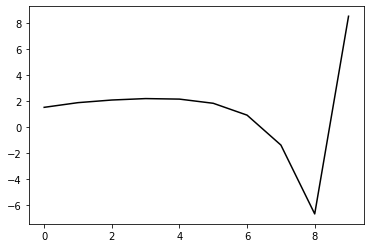

180400 0.10671005535784257
0.9541468631959443 -0.5191960702870876 -0.35681236973955804 -0.2565076342484014
[ 1.54745088  1.92020777  2.18174651  2.34135746  2.33971332  2.03637134
  1.12349292 -1.18441371 -6.49148702  8.54495738]


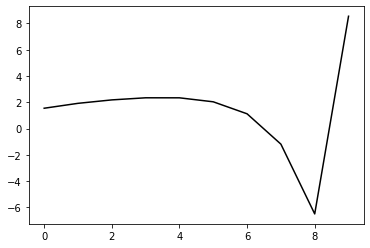

181500 0.22581245805111036
0.9356503941731209 -0.5381453006304479 -0.36882823752128796 -0.26223227425751167
[ 1.53990931  1.92888967  2.20264841  2.3830841   2.40095597  2.11669658
  1.21962631 -1.07714094 -6.38241477  8.49300076]


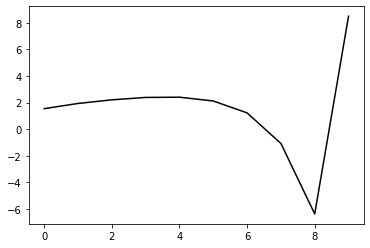

182600 0.24869644016141065
0.910605936658183 -0.5373527871490931 -0.36896171977213404 -0.2541750168489407
[ 1.52854639  1.85510017  2.06994807  2.20649313  2.18433624  1.86834221
  0.95209949 -1.35314948 -6.66777922  8.59849863]


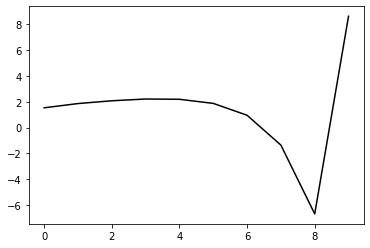

183700 0.08897863786427923
0.9313719036859126 -0.5254245292889336 -0.3637400012842837 -0.2655531317425944
[ 1.59771536  1.86163559  2.11659224  2.28795646  2.30581878  2.02078668
  1.12109016 -1.17478767 -6.48493447  8.52790561]


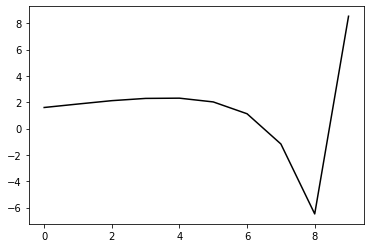

184800 0.3891018667993189
0.9262447286471078 -0.5062151492968628 -0.35257537817248286 -0.27107532716964716
[ 1.64860029  1.7436897   1.98910719  2.16515428  2.19423394  1.93106161
  1.06150533 -1.20282401 -6.48970928  8.57191585]


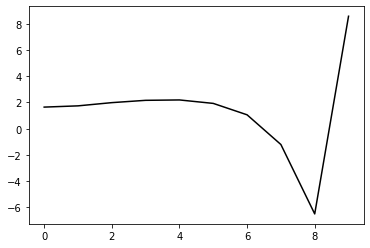

185900 0.20057090221173438
0.9023302709214889 -0.5357036073785026 -0.3746186863982921 -0.26968672410045447
[ 1.59885998  1.79645356  2.03147586  2.20394354  2.23340934  1.97295782
  1.10667089 -1.15461101 -6.44299719  8.53232702]


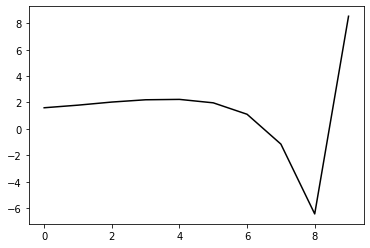

187000 0.21819540445064
0.9143756468390974 -0.5132007467578186 -0.36524968946776176 -0.2541288940311919
[ 1.5360826   1.85375277  2.04311603  2.1594498   2.13394665  1.82126352
  0.90624499 -1.39962524 -6.74042686  8.57316545]


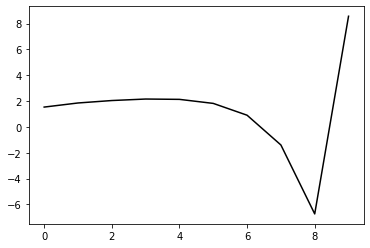

188100 0.24688572794645447
0.875690842149416 -0.5236629530836293 -0.3713348991519712 -0.25580392982577566
[ 1.57395862  1.78068325  1.98066156  2.09852429  2.07392748  1.76162409
  0.8424281  -1.47434328 -6.83959455  8.54195455]


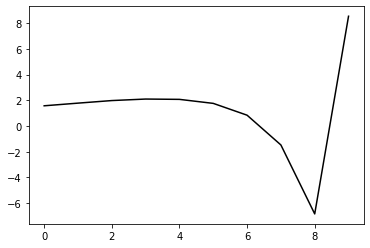

189200 0.15989409651974537
0.9184063501935322 -0.5043823176535449 -0.3673072831442215 -0.26008585297853765
[ 1.52545829  1.90950051  2.14142361  2.28812227  2.29173368  2.00587741
  1.10683057 -1.19929625 -6.56509527  8.53361559]


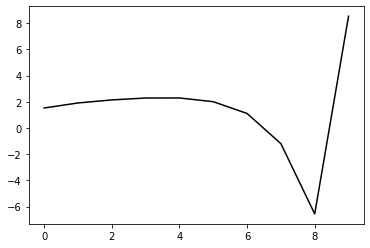

190300 0.7629367521951014
0.8274397243872621 -0.5101496241565908 -0.340931140936756 -0.3029421993536872
[ 1.69015701  1.71039791  1.88840063  2.01235527  1.99135419  1.68333432
  0.76701472 -1.55164689 -6.9432243   8.53623667]


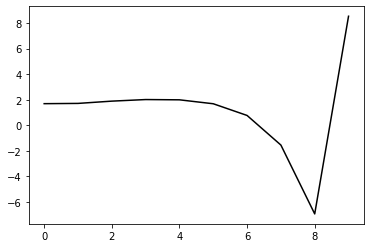

191400 0.16107391407780075
0.878034338524865 -0.5044730983085658 -0.36938946981317616 -0.2554294860660282
[ 1.50631159  1.87465618  2.06862916  2.18287668  2.15676156  1.84684575
  0.93074828 -1.39217153 -6.80943239  8.62111755]


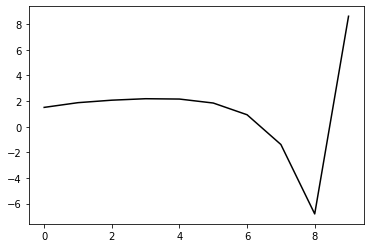

192500 0.20239628493382522
0.8857022352419968 -0.481522644121008 -0.35928599730245386 -0.26471978908727833
[ 1.56660211  1.82303148  2.05437296  2.19757988  2.19998758  1.92116773
  1.03650083 -1.25870205 -6.6594005   8.55579515]


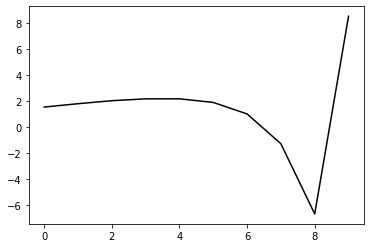

193600 0.364012112412138
0.8720581158759663 -0.5038720653164381 -0.38410050983870914 -0.24669510336339248
[ 1.43842432  1.90091559  2.11907369  2.25990153  2.25800238  1.97430598
  1.08419024 -1.22099598 -6.64851315  8.54217623]


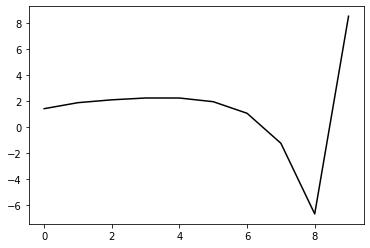

194700 0.14655766601155965
0.8772466669988273 -0.47875409007998265 -0.36489013321816266 -0.2704702738431969
[ 1.59637011  1.8094629   2.05497464  2.22094889  2.24797633  1.99529871
  1.13670403 -1.13818062 -6.53836942  8.57692417]


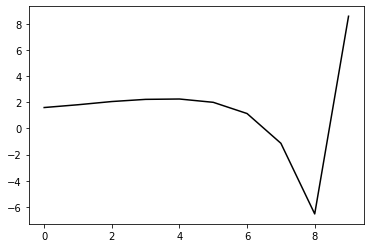

195800 0.1928044858519655
0.8370296785822221 -0.488638147743382 -0.36719297099640896 -0.2713162457372152
[ 1.59570841  1.71833904  1.92428653  2.07128908  2.08525827  1.82693373
  0.97067735 -1.29710744 -6.68773088  8.47365095]


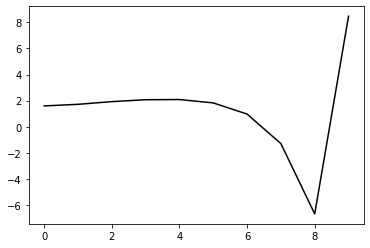

196900 0.26249043472698647
0.8135782367542141 -0.4915843882784112 -0.37058975339619965 -0.26279597027575896
[ 1.52757286  1.73185294  1.9038034   2.01398601  1.99098712  1.69586693
  0.8038572  -1.50059606 -6.94581821  8.59330147]


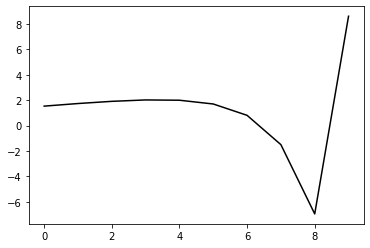

198000 0.21131360000494234
0.8651896881907006 -0.47330538422148977 -0.3720225673495196 -0.26873698389488954
[ 1.57499924  1.80561776  2.04335457  2.20469631  2.23476787  1.99122337
  1.14598944 -1.11907838 -6.53242928  8.54791591]


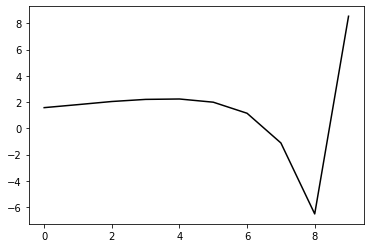

199100 0.23848761602291121
0.8176598393512802 -0.4950598011413092 -0.3813322024220017 -0.262538143684846
[ 1.57060431  1.74386077  1.94827004  2.09020305  2.09899909  1.8343726
  0.96888524 -1.3170171  -6.75845719  8.52102926]


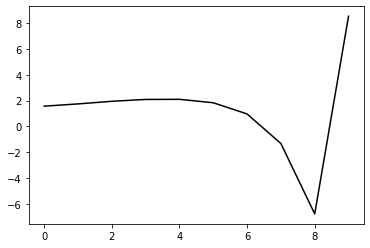

200200 0.35243026312803927
0.7925312074389139 -0.48946929657552163 -0.3801763158267475 -0.2557254789029928
[ 1.59909818  1.60413948  1.75099118  1.83188743  1.78377037  1.47338575
  0.57779919 -1.72557796 -7.1926566   8.55837658]


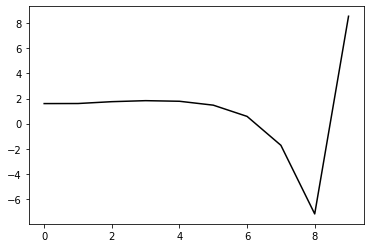

201300 0.21018369083141442
0.8778391160928232 -0.47103180154159335 -0.38142367005571576 -0.26809623008232975
[ 1.48569819  1.93598758  2.14682161  2.26801094  2.25384583  1.96830044
  1.08827834 -1.20633115 -6.6640558   8.51244044]


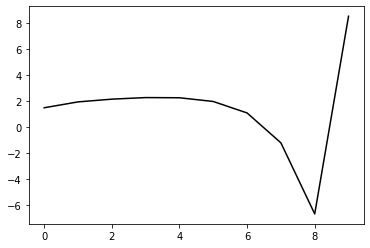

202400 0.15883722317125168
0.8193450164519024 -0.5084851451877063 -0.3958173021777734 -0.28436836854500214
[ 1.56817115  1.7870679   2.04961308  2.21595661  2.23918467  1.98728443
  1.13585482 -1.13605021 -6.58074032  8.5629787 ]


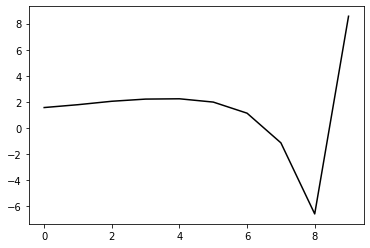

203500 0.16974447352746772
0.8720860453283849 -0.46628141913938603 -0.37901752162192304 -0.2801041261013675
[ 1.56958364  1.84720706  2.10502229  2.28982929  2.33409612  2.10369494
  1.2729277  -0.98457882 -6.43788997  8.50831909]


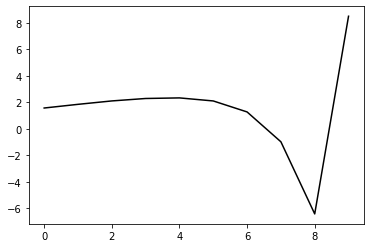

204600 0.22561975575074347
0.864232613158292 -0.47932766529946996 -0.39319181208839704 -0.2679158657073653
[ 1.50637172  1.84753754  2.08729036  2.2513198   2.27786827  2.03505538
  1.20021798 -1.05499756 -6.50763606  8.5836968 ]


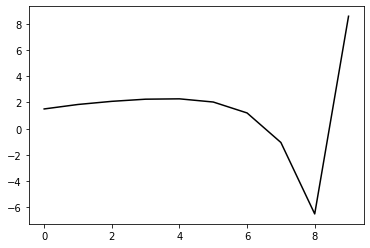

205700 0.06787693664525071
0.8603493900680371 -0.45771690551631816 -0.3845955145036322 -0.2662238813428897
[ 1.56007683  1.76979795  1.99924503  2.17268152  2.21407768  1.98696164
  1.16656135 -1.07961849 -6.53978208  8.552017  ]


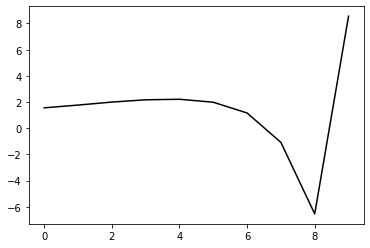

206800 0.29204021093137006
0.8242372263772768 -0.45454889346335375 -0.3743982319328754 -0.2809286903330095
[ 1.63430342  1.64645479  1.83457332  1.986619    2.01405722  1.77883889
  0.95774135 -1.28246207 -6.73274799  8.50890821]


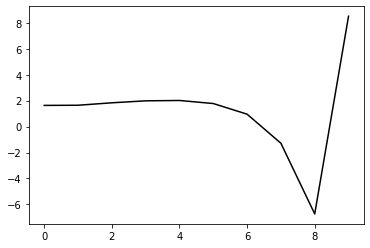

207900 0.23129461095985832
0.84091746353165 -0.4512982692343268 -0.3792374564567968 -0.27645599226539996
[ 1.56984266  1.74717217  1.92812785  2.06092692  2.07328812  1.82565686
  0.99600161 -1.24832564 -6.69930771  8.59891009]


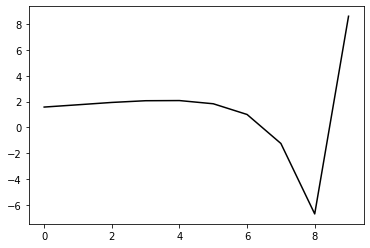

209000 0.21367806821813995
0.8508488938621188 -0.4635910364726817 -0.3928007481842713 -0.26908331604359664
[ 1.52647734  1.82260354  2.02510893  2.15244951  2.15413803  1.89401745
  1.0523865  -1.20048823 -6.65731504  8.54761324]


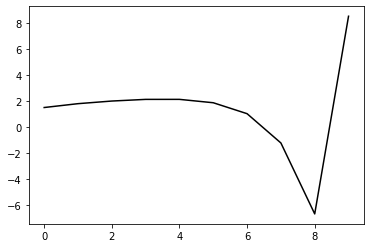

210100 0.2308815756711888
0.8224346261571791 -0.4637248842985256 -0.3896382199746531 -0.27320999827443254
[ 1.55264523  1.78787047  1.97980007  2.09273838  2.07133393  1.78473537
  0.91657723 -1.35986777 -6.84502531  8.51506908]


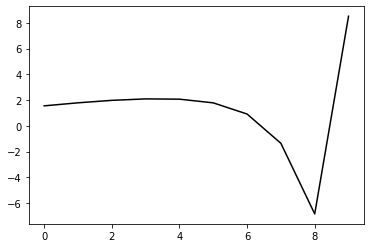

211200 0.5992087599336763
0.8119329970792475 -0.45816097127138894 -0.3655827757878926 -0.3154776846281378
[ 1.62738811  1.84327085  2.02847062  2.13203182  2.08566393  1.7590252
  0.84236093 -1.47745447 -6.98896727  8.47502747]


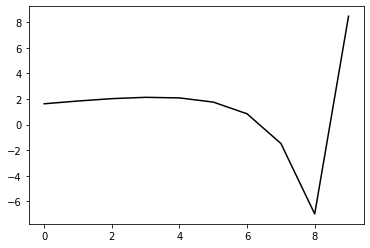

212300 0.20040233252784315
0.8771037146702767 -0.4506589708075754 -0.38381905360077184 -0.2811156790562673
[ 1.52438635  1.87416398  2.12670154  2.2423145   2.20281993  1.88001693
  0.96406392 -1.35915892 -6.88665891  8.53530119]


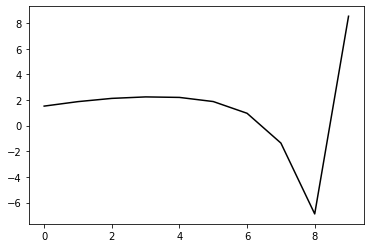

213400 0.17647744744985955
0.8218208481625261 -0.4733498726184061 -0.3937259797005123 -0.28288468128726857
[ 1.51792424  1.78629836  2.03617778  2.15989043  2.11635596  1.78767274
  0.86723215 -1.4592332  -6.99370633  8.53006118]


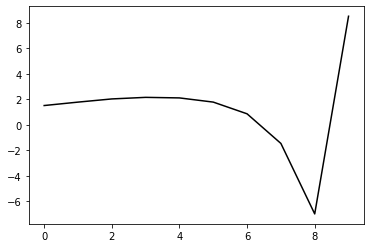

214500 0.2628848541862281
0.8179290526637714 -0.4588408670777504 -0.3832214615680273 -0.28907747858209115
[ 1.5315651   1.70388413  1.9179255   2.03930266  1.99681634  1.67387765
  0.76423381 -1.55051039 -7.08603835  8.45496121]


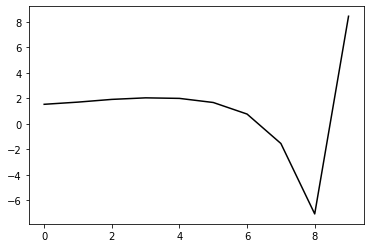

215600 0.24924895795709967
0.830615212376073 -0.4684485340169484 -0.397950841358646 -0.290042259583421
[ 1.51170855  1.81775765  2.06486834  2.24252923  2.26112622  1.99146231
  1.12463503 -1.15915176 -6.68024504  8.55673347]


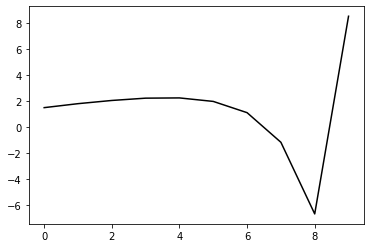

216700 0.12069273373702803
0.8326467729046626 -0.4545209071216666 -0.39386905045766163 -0.289442711557298
[ 1.57871238  1.69801483  1.95747092  2.1506852   2.19859027  1.96454136
  1.13411373 -1.1194484  -6.63741279  8.55477022]


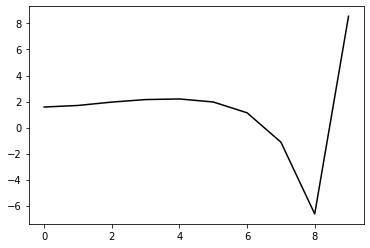

217800 0.24871939762885925
0.8662825769005288 -0.42684539639622654 -0.38301701642984926 -0.2848924249407066
[ 1.58313529  1.75646793  2.00752561  2.21750629  2.29229292  2.08498848
  1.27586714 -0.96587642 -6.49436672  8.6435434 ]


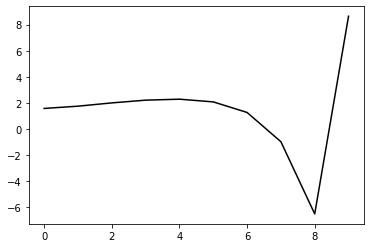

218900 0.6215071942243489
0.8807015489449842 -0.43946526610355946 -0.4010600791044318 -0.2707819197853277
[ 1.42313868  1.95447182  2.21373223  2.42687488  2.51060086  2.30809257
  1.49340476 -0.76403846 -6.32619128  8.59131495]


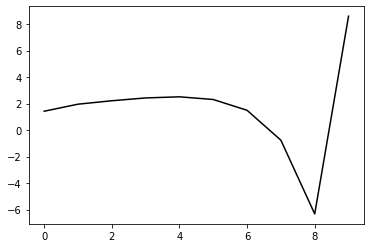

220000 0.23138743773237266
0.8611044993801847 -0.42520030499457073 -0.38940116134131214 -0.2817247773066806
[ 1.56236463  1.81066344  2.07167159  2.29005372  2.38816814  2.20610391
  1.40998348 -0.83571571 -6.39776129  8.56138419]


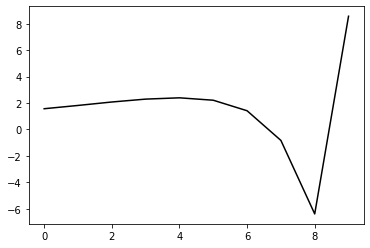

221100 0.19913100492897223
0.8222595675941845 -0.44407059286417466 -0.3961927526483499 -0.2923290271398562
[ 1.60815854  1.74481544  1.98698688  2.2075258   2.31682423  2.15468783
  1.38343981 -0.8360398  -6.37430255  8.51504762]


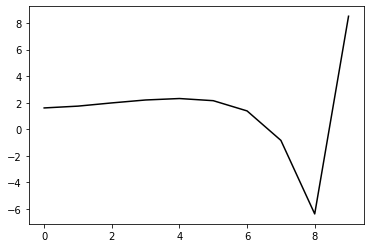

222200 0.2475919892436622
0.7818471061797219 -0.44660061600710105 -0.3984491826848624 -0.2777736645954176
[ 1.58728134  1.64357445  1.81536699  1.96513641  2.0138841   1.81303961
  1.02726107 -1.19367167 -6.74308163  8.55968603]


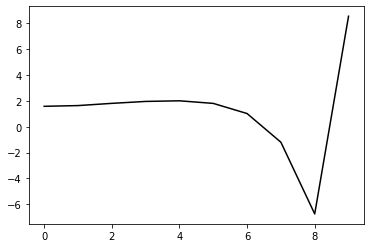

223300 0.298865314394605
0.7559587602175809 -0.4482956265094399 -0.39671713030646955 -0.28559082601743563
[ 1.62294904  1.59175201  1.75697844  1.90031487  1.94492548  1.7404939
  0.95116804 -1.27292031 -6.82832081  8.48670207]


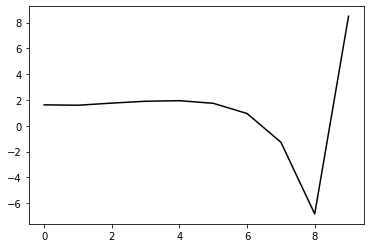

224400 0.19772381117435878
0.8044179433102041 -0.42551195067949527 -0.38897548941445437 -0.28565607968093154
[ 1.59216217  1.7192612   1.88083365  2.0220345   2.07051064  1.87487291
  1.09710459 -1.11483115 -6.65916586  8.56997416]


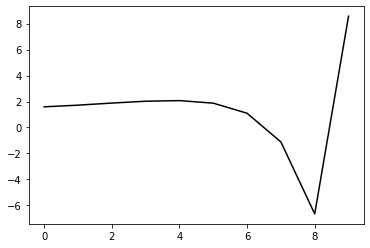

225500 0.19241293813253904
0.8279595443062875 -0.4151450903871531 -0.3883945097517521 -0.28094370147249165
[ 1.57822691  1.80696813  1.97972134  2.11649877  2.1601991   1.95955891
  1.17516624 -1.04643831 -6.60832269  8.51463591]


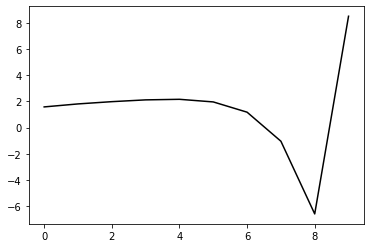

226600 0.22361798874248184
0.8372058019591111 -0.4084814232995302 -0.38953556905095166 -0.2717136183623875
[ 1.47349968  1.84810618  2.00604224  2.10903446  2.11959244  1.89362346
  1.0922896  -1.14008186 -6.70988148  8.49773025]


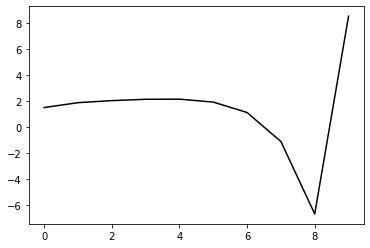

227700 0.2807207661555034
0.7737597307469211 -0.421845940327989 -0.38653007726298894 -0.2863125793717594
[ 1.66759344  1.58594578  1.7643101   1.87270799  1.88287177  1.65952989
  0.86440719 -1.35934932 -6.92127279  8.53943305]


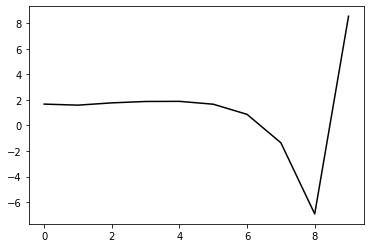

228800 0.16585414836621912
0.797959743019748 -0.421631180232696 -0.395280079727798 -0.2807053876850128
[ 1.54594572  1.79339784  1.98947319  2.1151224   2.13711993  1.92326914
  1.13525205 -1.08609515 -6.65402065  8.51296916]


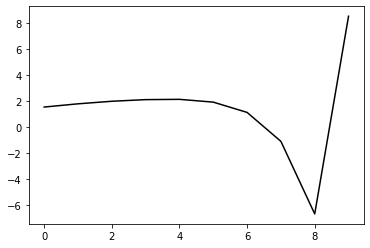

229900 0.2378767052294597
0.7756633451189227 -0.41388392735018803 -0.38959012185735453 -0.278095500774417
[ 1.55054055  1.71493964  1.88172553  1.98585967  1.98656351  1.75972577
  0.96923461 -1.24958188 -6.82328589  8.5716148 ]


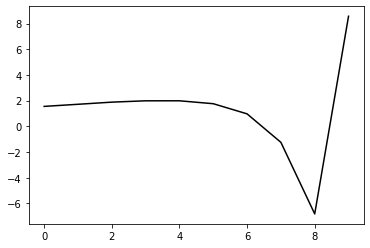

231000 0.23770182402458487
0.7553378738731008 -0.4379586515731807 -0.4057306884827959 -0.267088200873226
[ 1.5237072   1.71847069  1.88643205  1.98394658  1.9731118   1.73344527
  0.93205975 -1.2959756  -6.87883322  8.52340807]


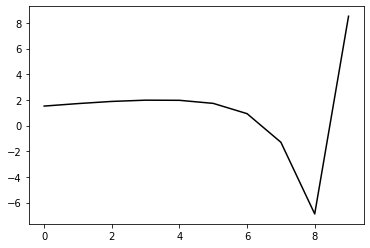

232100 0.44348241691811147
0.8089953386032002 -0.3980941868820038 -0.385139689560702 -0.2922239601059082
[ 1.60049415  1.79477841  2.03163469  2.19045444  2.23921011  2.0560631
  1.30628358 -0.87900939 -6.43662909  8.52592077]


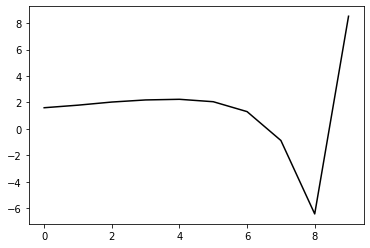

233200 0.26649459688737964
0.7439585035328858 -0.4296903488697729 -0.3981670728996679 -0.27792837839471
[ 1.52550259  1.76188594  1.91139794  1.99289644  1.95625285  1.68955437
  0.86890838 -1.37182072 -6.97817727  8.47608667]


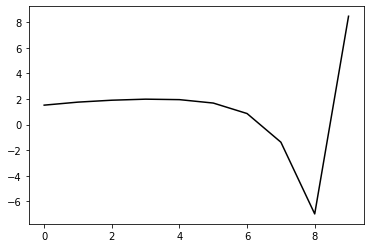

234300 0.2420376831605382
0.7595267585304308 -0.43616333207828506 -0.40463065264658543 -0.2939807542501649
[ 1.58700314  1.76682712  2.01047013  2.15605826  2.17265045  1.94504089
  1.15191263 -1.06840083 -6.65520951  8.56964197]


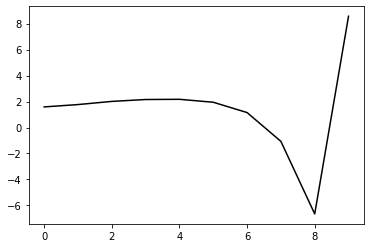

235400 0.1398134528744013
0.7805250479293111 -0.42034642099882785 -0.3992403422398748 -0.2920432401875919
[ 1.56581725  1.83055912  2.07876511  2.24284604  2.27012562  2.04483852
  1.25048565 -0.9736659  -6.57474844  8.48967444]


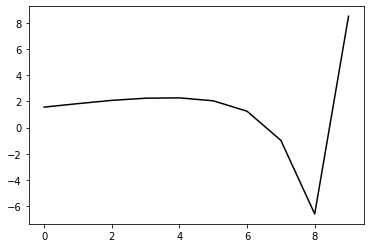

236500 0.23064037497766685
0.7988213100663645 -0.41382929658941203 -0.404330417532163 -0.28312376335381806
[ 1.48435311  1.85472821  2.09775092  2.25780144  2.28210897  2.05808484
  1.27075076 -0.94597589 -6.55374332  8.60796966]


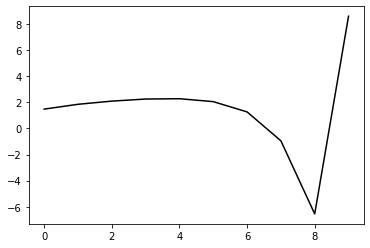

237600 0.29690026947221565
0.7946279974817853 -0.4139400249035982 -0.4117202764048774 -0.2678449136354557
[ 1.43798831  1.8749613   2.09177334  2.22511322  2.21744757  1.95656211
  1.13414926 -1.11360013 -6.75704781  8.53943042]


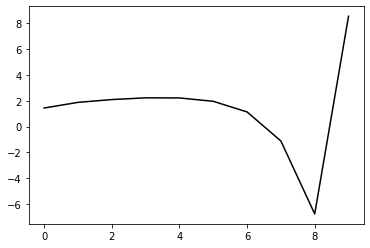

238700 0.12348735522576527
0.7786055858098488 -0.3976116866201543 -0.397239109356649 -0.28195807981287446
[ 1.58757415  1.75288919  1.97071062  2.12156591  2.13890322  1.90437564
  1.10853356 -1.11377907 -6.73665669  8.60016724]


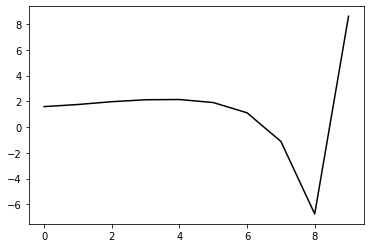

239800 0.16639530671331235
0.754149666855491 -0.41262066424506294 -0.4099790192741433 -0.27145298980246224
[ 1.50489381  1.72623957  1.93055946  2.07901942  2.0971622   1.86310401
  1.06786651 -1.15439975 -6.79046878  8.52933409]


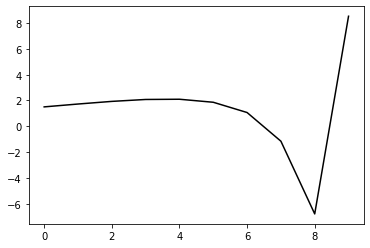

240900 0.9591703019679723
0.7538374552449858 -0.33894752380506404 -0.35114117286605867 -0.3162956151059152
[ 1.74452235  1.6183779   1.83199029  2.01082524  2.06998691  1.87820388
  1.12154074 -1.06856405 -6.69150835  8.5347317 ]


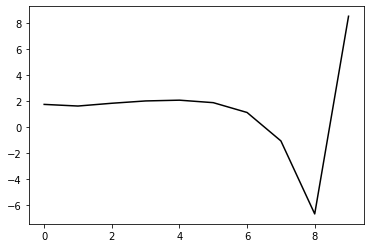

242000 0.24199380421877942
0.7818959573314741 -0.35124072363578757 -0.38168582600345663 -0.2583408952402161
[ 1.4805017   1.81308983  1.9557969   2.05979931  2.0466754   1.78087888
  0.95090436 -1.3110835  -7.03525751  8.4572447 ]


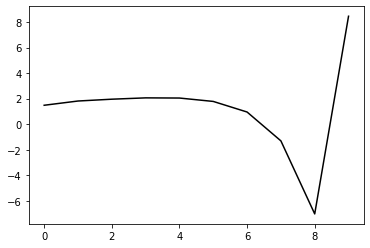

243100 0.1990449023794464
0.7895734883033322 -0.3685174255981067 -0.3915206378832263 -0.2780929901976405
[ 1.50438133  1.88565287  2.12728794  2.28808836  2.32959999  2.1137682
  1.32438858 -0.90507994 -6.6124982   8.56903137]


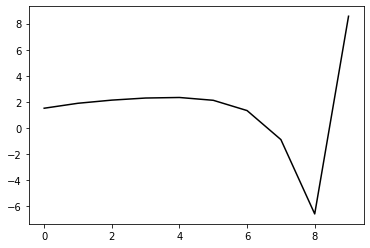

244200 0.2618464324244532
0.716814941336336 -0.4251127403240637 -0.42010116336343745 -0.2709019826788775
[ 1.54919008  1.65094338  1.87554003  2.03195195  2.06659465  1.84864294
  1.06092768 -1.16317409 -6.86363276  8.49714767]


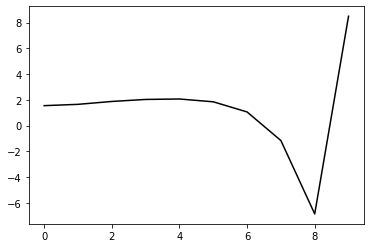

245300 0.2511434962907213
0.7435074144161852 -0.4128486940408944 -0.41933113507592673 -0.2698868190477772
[ 1.52687989  1.76039643  1.97976264  2.13922061  2.17911619  1.97336756
  1.20431904 -0.99995681 -6.69221834  8.6321394 ]


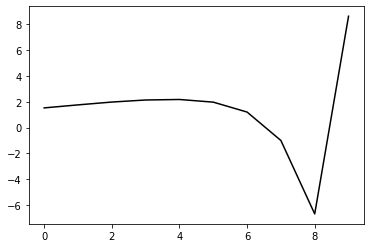

246400 0.1464221698656044
0.7438709332722775 -0.4030439350828581 -0.4132729588408029 -0.27494614604593626
[ 1.52998025  1.82190447  2.04503218  2.21854255  2.2703146   2.06784152
  1.29572018 -0.91355048 -6.61702515  8.57270556]


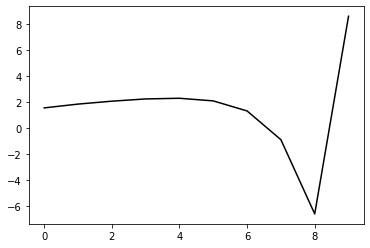

247500 0.401890678269571
0.645738029662642 -0.4432626848950284 -0.4182534066757858 -0.2888300850634755
[ 1.55709153  1.71132142  1.83359187  1.93974164  1.92783945  1.66479069
  0.84047955 -1.40895044 -7.15844094  8.4691309 ]


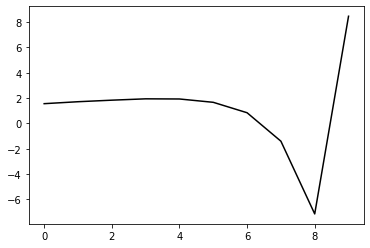

248600 0.2555044315067736
0.7614579137895187 -0.3938518282497281 -0.410351849172543 -0.28071677389405797
[ 1.43324885  2.04799192  2.30363829  2.45724411  2.47819497  2.23090997
  1.40765733 -0.8477011  -6.61394893  8.58169414]


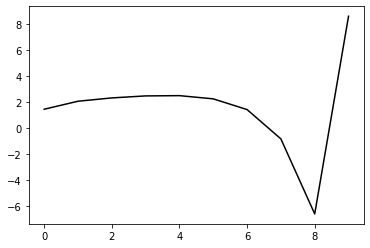

249700 0.1351491291253731
0.7088553353149485 -0.404540112606898 -0.4116710739753563 -0.2703911553971754
[ 1.46183855  1.86936869  2.05783835  2.16132478  2.13178869  1.84136466
  0.98352613 -1.30047601 -7.10700162  8.57859365]


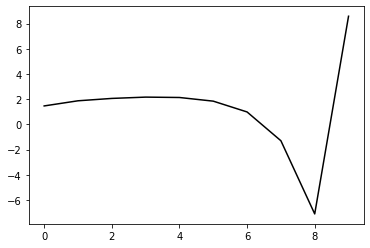

250800 0.2200718532111007
0.7057062630506458 -0.388180756924188 -0.39754679137822185 -0.2911436190233671
[ 1.58139883  1.70145636  1.95584371  2.11834037  2.1450762   1.90850596
  1.0962662  -1.15158036 -6.93659481  8.52645128]


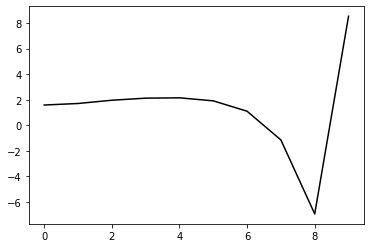

251900 0.20763420457611767
0.7186550916650799 -0.3838035530158067 -0.40358514249956323 -0.2786131044751228
[ 1.51313077  1.77832528  2.01752702  2.1789937   2.19915904  1.9551598
  1.13679053 -1.11627961 -6.91486919  8.50620866]


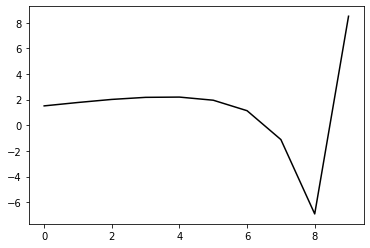

253000 0.20635713546193085
0.7208374097451462 -0.3944007868240921 -0.41208173684262245 -0.28705205979859777
[ 1.50306584  1.81403442  2.07516532  2.26880457  2.32204761  2.10442189
  1.304455   -0.93521031 -6.72497325  8.61613571]


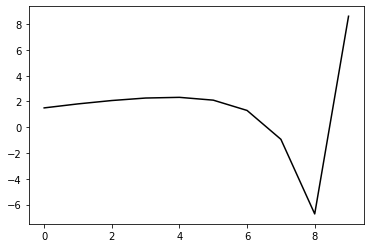

254100 0.28550896549319826
0.6883964498362087 -0.40401563946756447 -0.4152626361717537 -0.2813758884026076
[ 1.52053306  1.61098329  1.81751268  1.97522525  2.01068062  1.79164354
  1.00040556 -1.22542512 -7.00725712  8.50792468]


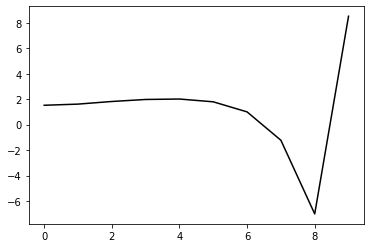

255200 0.401682223308541
0.6619560117021923 -0.43152898550908825 -0.43225426944594647 -0.25990877708257876
[ 1.47172049  1.74091316  1.89312516  2.00209952  1.98257915  1.70262149
  0.85146022 -1.42767993 -7.26361886  8.49269361]


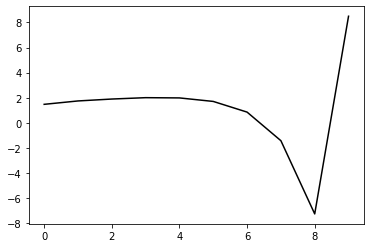

256300 0.34232459673563637
0.7231086223657993 -0.3848966554874643 -0.3990797307921992 -0.30005177151902457
[ 1.63651986  1.7515435   2.01660612  2.18587599  2.21754465  1.97686416
  1.1530742  -1.10449335 -6.91081596  8.54153263]


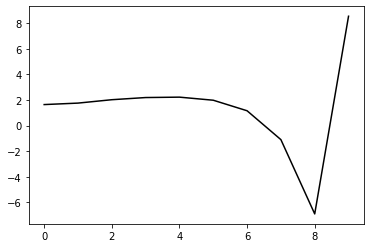

257400 0.131643896425839
0.7329644558046052 -0.3799316041318421 -0.40675026814676424 -0.2892136770287534
[ 1.53209961  1.92217187  2.18066357  2.34904446  2.37066413  2.11727368
  1.28062083 -0.99093682 -6.81645715  8.52449072]


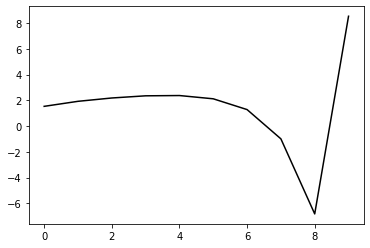

258500 0.21114742229364122
0.7584819595073697 -0.3633322058869532 -0.40454235313843073 -0.28206926001982413
[ 1.50946918  1.92838286  2.20766323  2.37988082  2.40371163  2.15310963
  1.31917034 -0.94995834 -6.77741149  8.5897446 ]


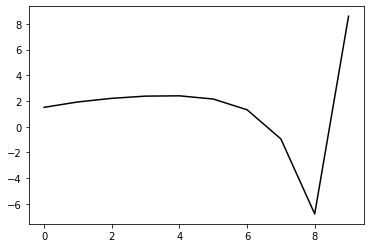

259600 0.3107155156532252
0.7360008770468753 -0.3926511210820521 -0.4247656470199124 -0.2736943009661197
[ 1.4262994   1.86312813  2.13168374  2.29843164  2.3128592   2.05512024
  1.21683222 -1.05390681 -6.87985449  8.57327408]


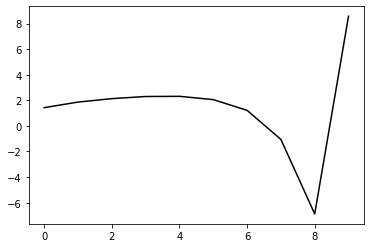

260700 0.08773361697534686
0.7393491479745123 -0.3709752675779985 -0.4129515413252092 -0.2739236841368777
[ 1.50400709  1.80913484  2.06019396  2.23506852  2.26339438  2.02125837
  1.19935139 -1.05611103 -6.87016732  8.50406489]


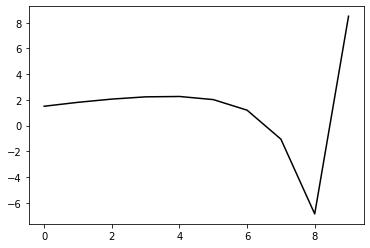

261800 0.1605279052044594
0.7302223479995474 -0.37753877269569563 -0.415433407452432 -0.27992794454899445
[ 1.49027517  1.87243958  2.11306267  2.28108075  2.30358395  2.05307287
  1.22142757 -1.04305822 -6.86280971  8.52715645]


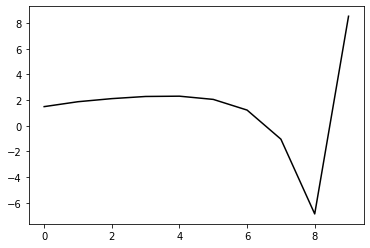

262900 0.15694737165292785
0.7560987993766404 -0.36145455570724894 -0.40880324682649155 -0.29083547749107996
[ 1.50333322  1.93474245  2.22854725  2.43766278  2.50193641  2.28762195
  1.48339197 -0.76241244 -6.58406764  8.45026377]


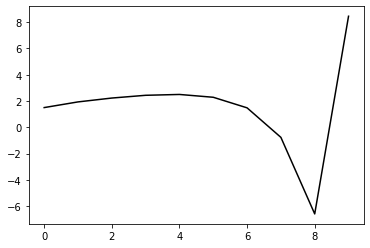

264000 0.283328820866489
0.7103783493209795 -0.37672513642496913 -0.4204877917390824 -0.2609256133571335
[ 1.46473432  1.79401801  2.01069862  2.1502868   2.14372172  1.86364461
  1.00283776 -1.2892911  -7.15347733  8.4504612 ]


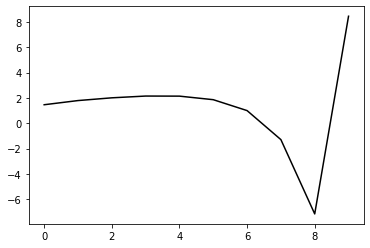

265100 0.19569276890765275
0.7222106286784421 -0.3574759431155789 -0.40735511900661714 -0.28230036228887156
[ 1.52407665  1.81757984  2.05809842  2.23048662  2.25879953  2.01107804
  1.17800054 -1.09065119 -6.92882725  8.54678433]


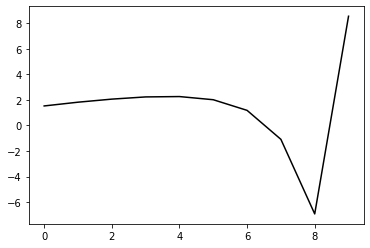

266200 0.19573917509165611
0.7382860647666262 -0.34982526281766024 -0.40296179879901034 -0.29124289862414166
[ 1.52553135  1.87261064  2.12927304  2.3021103   2.33110743  2.08335499
  1.24878357 -1.02190201 -6.86365636  8.50481638]


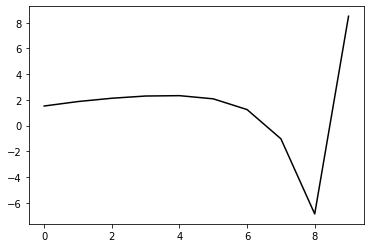

267300 0.2616972031427502
0.7385811297569068 -0.3556432102401696 -0.4064609114645738 -0.2983445255197232
[ 1.59592156  1.80651647  2.10601824  2.30902902  2.36505521  2.1410416
  1.32489975 -0.9303131  -6.75721771  8.56338384]


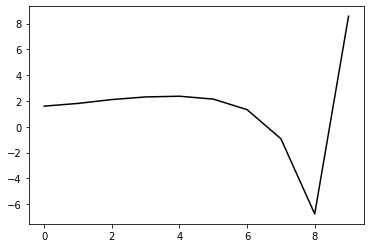

268400 0.1271255016277238
0.7383958463967131 -0.3623586921678211 -0.4150605036026182 -0.2910453427151005
[ 1.55634914  1.83357001  2.12273539  2.33215432  2.39288265  2.17005206
  1.35078266 -0.9113486  -6.75119479  8.47233179]


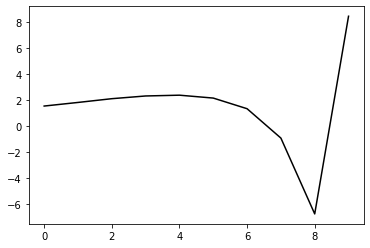

269500 0.18613307213717054
0.7444978591773463 -0.3570174542515531 -0.4143024630282764 -0.2913839081457751
[ 1.53069647  1.82774319  2.12994422  2.35633798  2.43782705  2.23620619
  1.43487385 -0.81333428 -6.64699811  8.46869097]


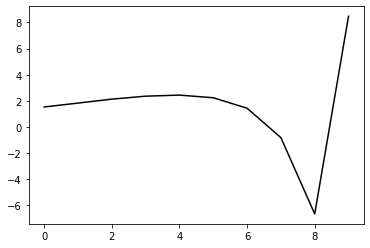

270600 0.24048164491825152
0.7359995172037201 -0.3539010409414739 -0.4155357358236281 -0.2824989875505647
[ 1.50789304  1.82653248  2.09085246  2.29730347  2.36238163  2.14617482
  1.33148833 -0.9301704  -6.78498668  8.4709268 ]


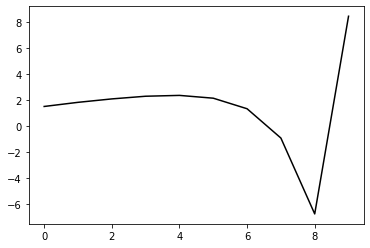

271700 0.05745591692635226
0.7486368813896782 -0.34971973574918314 -0.41728823787184643 -0.28186300120160696
[ 1.5124035   1.86996225  2.15477144  2.38802279  2.48569175  2.2990051
  1.50559679 -0.74307164 -6.59370526  8.56170113]


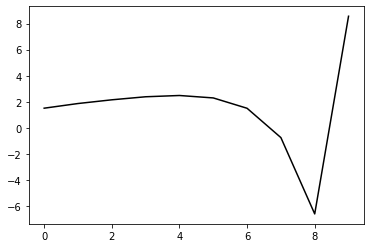

272800 0.15103714416797157
0.7390065436482884 -0.3403760154908817 -0.41020722176969093 -0.28574505768296554
[ 1.54841891  1.8147863   2.06281     2.26483523  2.34174228  2.15113359
  1.3697431  -0.85878584 -6.68691905  8.51275269]


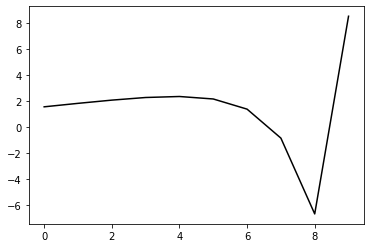

273900 0.30931808834277297
0.7144731961818325 -0.3538224204584927 -0.4133522926364974 -0.29291409232996596
[ 1.63789714  1.63341394  1.86999312  2.05951083  2.13165073  1.94325167
  1.16850322 -1.04983839 -6.86320335  8.58066313]


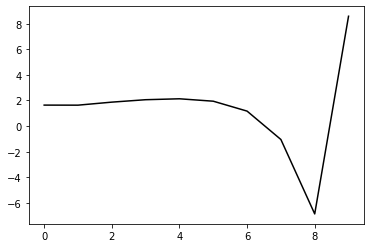

275000 0.22574740423512077
0.7297736628799514 -0.3576297480311052 -0.42040728511389397 -0.27781338438017067
[ 1.48227714  1.84305503  2.04097803  2.17751319  2.19497378  1.95576778
  1.13725553 -1.11736364 -6.95902669  8.48862263]


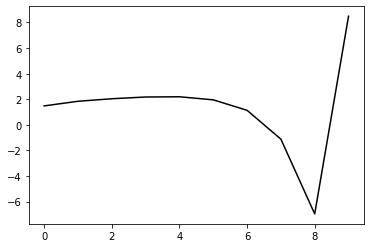

276100 0.17586690784227507
0.7548251724181062 -0.34332723677620064 -0.4126804065207833 -0.2945613481994355
[ 1.51165518  1.9150727   2.18882854  2.36082744  2.40227935  2.18228591
  1.37893201 -0.86299519 -6.69194925  8.54550876]


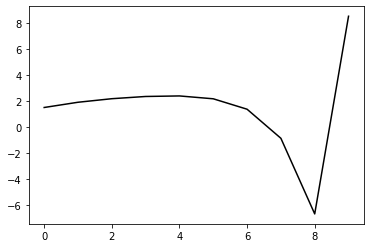

277200 0.18678377749271477
0.7309642367244923 -0.3663927392318159 -0.4278286839646593 -0.2921957455179879
[ 1.50279043  1.85902758  2.16338963  2.36589119  2.42268389  2.20942566
  1.40800204 -0.83491412 -6.66751671  8.59663292]


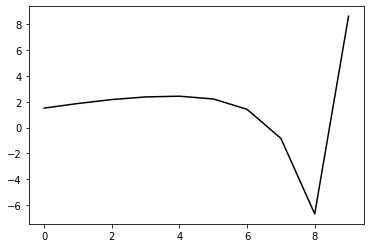

278300 0.22087846377591422
0.711591289383716 -0.3730315514400424 -0.42895460748436576 -0.29007569805365185
[ 1.50546702  1.87497691  2.12926553  2.30137932  2.32173232  2.06878312
  1.23014424 -1.04428926 -6.90033056  8.55696063]


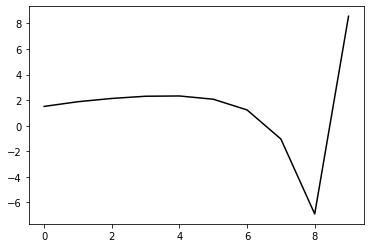

279400 0.12538027320599335
0.7585846671983209 -0.3350779695142763 -0.41151767915347814 -0.28788270358542645
[ 1.52483976  1.90092076  2.16346279  2.34560867  2.37779676  2.13543313
  1.30663272 -0.96048792 -6.81545482  8.48836134]


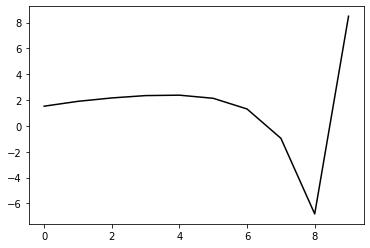

280500 0.32347705393970017
0.7494229805341875 -0.33565912392997865 -0.40853036338998 -0.3019587349276128
[ 1.59599834  1.83879878  2.13323781  2.34090125  2.40005688  2.1818716
  1.37389231 -0.87480854 -6.7133074   8.55547133]


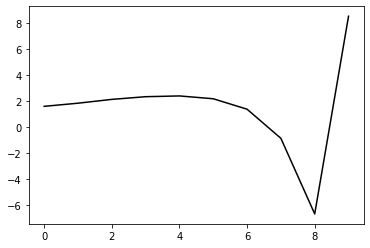

281600 0.23313021776472817
0.7616219635844624 -0.3464420632333415 -0.42583270964154113 -0.280238297857877
[ 1.4593066   1.90020548  2.18035372  2.38221479  2.43970049  2.22171749
  1.415145   -0.8322801  -6.67587618  8.50422276]


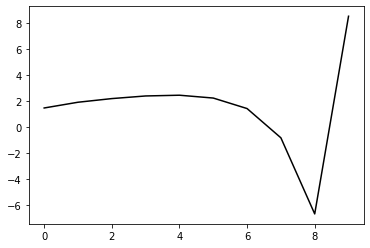

282700 0.0653833671102965
0.7507445992079275 -0.34305728484343745 -0.4201651117996873 -0.2882025737126032
[ 1.4989126   1.91287098  2.17436965  2.36432816  2.40695877  2.16649879
  1.33312901 -0.94052932 -6.81078634  8.57995843]


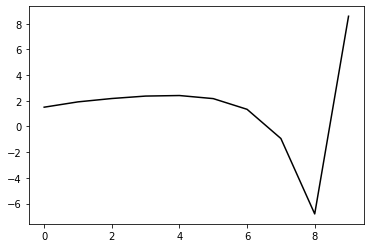

283800 0.43446167734132557
0.6868912181586164 -0.3340880826286165 -0.3995564963836515 -0.30278411702612057
[ 1.63422559  1.59046194  1.80175383  1.95066169  1.96830424  1.72182024
  0.89697179 -1.35950248 -7.20701092  8.48267625]


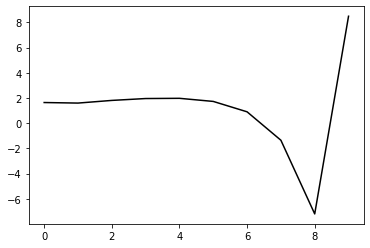

284900 0.4207361733732947
0.769170507414311 -0.3346111512844137 -0.4250363808281917 -0.28068375170206394
[ 1.4331839   1.97604778  2.231699    2.41419489  2.45858576  2.22878829
  1.41046567 -0.84889216 -6.71638304  8.54422291]


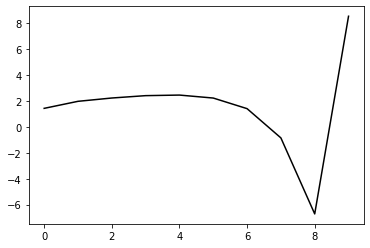

286000 0.30317328019658896
0.6468317089304261 -0.3985000578022194 -0.4420192102705809 -0.2926416598998692
[ 1.51190629  1.69165085  1.88290246  2.01274199  2.00128809  1.71844229
  0.85366856 -1.44255345 -7.34373095  8.55038488]


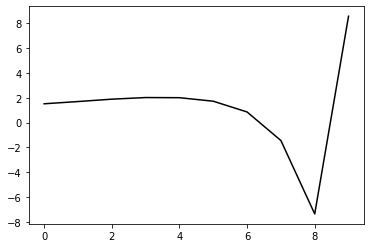

287100 0.3677152186467488
0.7460890326053821 -0.34108646279443755 -0.41617034482540594 -0.3035863196768906
[ 1.59877136  1.87553167  2.16919017  2.37953458  2.43651987  2.20039395
  1.36122974 -0.92310284 -6.81203315  8.52798663]


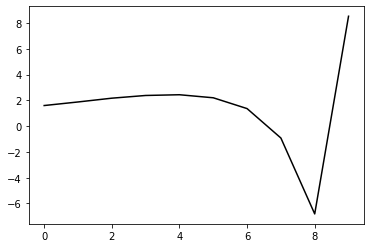

288200 0.31101858944508576
0.7575129755671763 -0.33083189029746163 -0.41372412854833013 -0.29866518870152636
[ 1.57056635  1.87666325  2.15723995  2.35948766  2.41750963  2.19065017
  1.36366146 -0.9089825  -6.78869553  8.64661635]


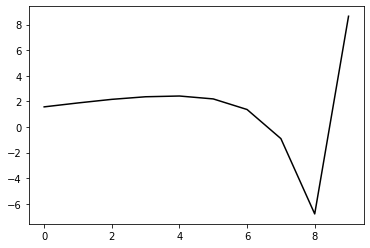

289300 0.21749333819136613
0.7237060105674659 -0.3630834315976676 -0.4298273672672241 -0.3021764333357683
[ 1.57152611  1.86639814  2.14097477  2.33255288  2.37299155  2.12403223
  1.27369602 -1.01829983 -6.90624568  8.52908152]


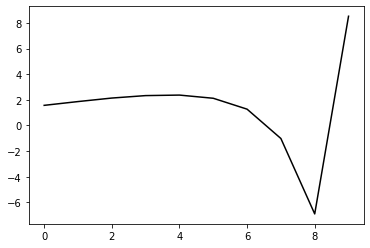

290400 0.11247563942566818
0.7576534557927944 -0.3381784388811651 -0.42408859075252164 -0.2931322337493041
[ 1.51951421  1.88718419  2.16568956  2.36330319  2.41668594  2.18652766
  1.35609963 -0.91938484 -6.80026509  8.52699454]


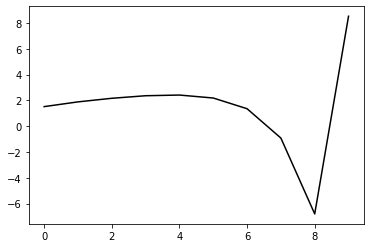

291500 0.19119278060030037
0.7308654273859827 -0.3502503818880717 -0.4286524598472785 -0.2972923711699833
[ 1.5693241   1.73367205  2.01413003  2.24158949  2.33109463  2.13870277
  1.34167208 -0.90712391 -6.76750493  8.48489498]


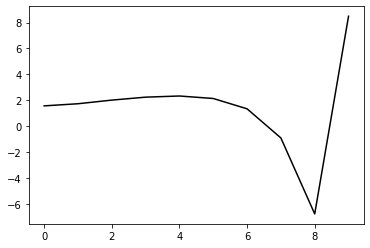

292600 0.2860077560016054
0.7204212949408025 -0.33962144069287586 -0.4259384899683562 -0.287197225500274
[ 1.56376606  1.69181141  1.92012251  2.12523049  2.20467864  2.00959987
  1.2143279  -1.0341317  -6.90721029  8.56732348]


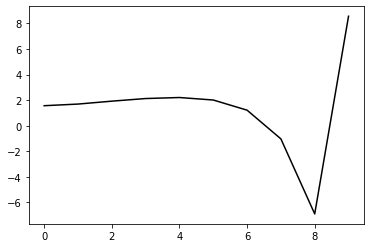

293700 0.12704561829562983
0.7307327599096379 -0.3388293355546492 -0.4275102792736733 -0.28455696044715095
[ 1.6017395   1.70032586  1.90016699  2.08448732  2.1554075   1.95629314
  1.15868978 -1.09060911 -6.95755736  8.49648429]


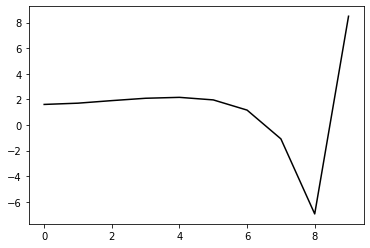

294800 0.19803393386622767
0.7165615872552136 -0.33606101371583197 -0.4196359139410627 -0.29651965419135207
[ 1.58021535  1.71295462  1.8986936   2.04935207  2.09767119  1.88733487
  1.08581128 -1.1621968  -7.018505    8.47448186]


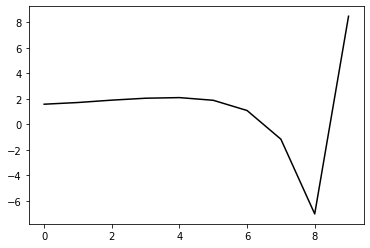

295900 0.18027009717183112
0.7465010705508328 -0.3391684204565543 -0.42896558781470845 -0.2944082775050888
[ 1.49706066  1.86746194  2.10845146  2.27821658  2.33757607  2.13710368
  1.341834   -0.90295259 -6.75708582  8.45217285]


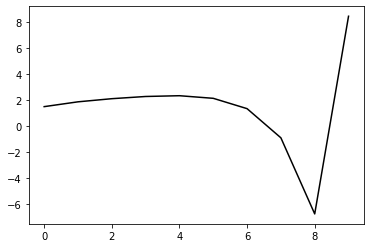

297000 0.20832538634509457
0.7422888429070781 -0.3428396488061497 -0.43487030948545247 -0.28948059693475786
[ 1.49846127  1.78269826  2.03420511  2.21926346  2.28813403  2.10337083
  1.32660558 -0.90317827 -6.75381985  8.50953172]


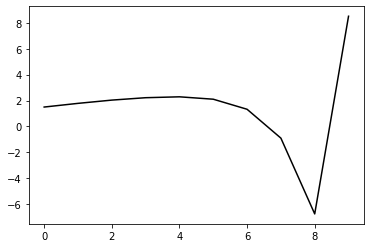

298100 0.24705535460947325
0.718070297174875 -0.3499124422294283 -0.435028327001791 -0.2929155474867002
[ 1.48825766  1.76294726  1.9846372   2.14119347  2.17577758  1.95947441
  1.16231542 -1.07957033 -6.93705303  8.51649097]


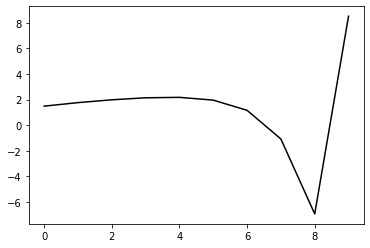

299200 0.26942149051647646
0.7587439649715545 -0.3224432108427388 -0.4183070567235375 -0.3039277501712714
[ 1.54265904  1.84904418  2.07729699  2.23521743  2.27263593  2.06137636
  1.27285598 -0.95810224 -6.79566499  8.4962443 ]


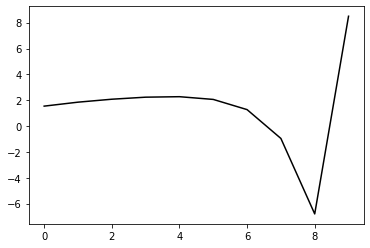

300300 0.20662536056652997
0.7229608693084622 -0.3502903330291578 -0.43377580633352564 -0.30625849642714964
[ 1.55138976  1.82698407  2.0696243   2.23199116  2.26494272  2.04291268
  1.24172082 -1.00167744 -6.84973433  8.57316082]


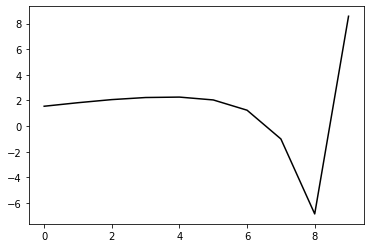

301400 0.1851584812270797
0.7658257781744513 -0.32120519510299744 -0.42233037319074773 -0.30840368864713374
[ 1.52458598  1.896941    2.16305765  2.33758732  2.38174853  2.17216123
  1.3850063  -0.84562066 -6.68726879  8.50103182]


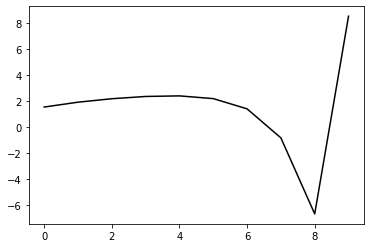

302500 0.25414818228131425
0.7120709044626142 -0.3571140797818981 -0.44347563144829294 -0.29274084969790837
[ 1.49479516  1.76339988  1.99333144  2.13264567  2.13511485  1.88688606
  1.0712925  -1.17717643 -7.02789313  8.50073339]


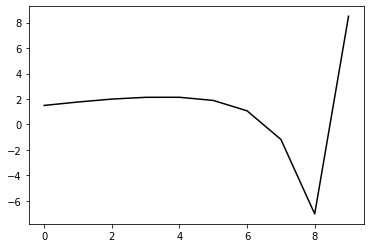

303600 0.438352974979068
0.7521557441165492 -0.3511856791660626 -0.4495720988061226 -0.2855828327182247
[ 1.39055954  1.87798164  2.12658156  2.28981864  2.31180656  2.07505429
  1.26426836 -0.9855787  -6.84628645  8.536938  ]


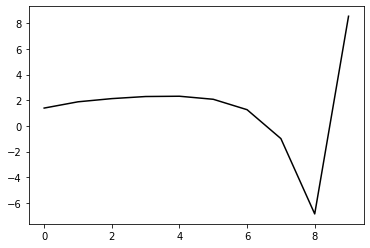

304700 0.08177975632751627
0.7490506834331977 -0.34047518195750454 -0.43753158814094595 -0.29907399212569363
[ 1.4781812   1.81315628  2.05621574  2.22163935  2.25116312  2.02434807
  1.22680913 -1.00624447 -6.84326293  8.50519245]


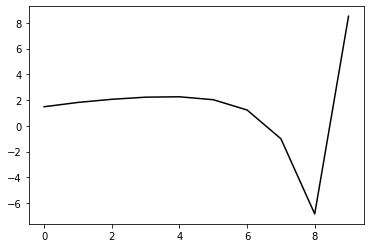

305800 0.22829518729739742
0.694969516569054 -0.3341898712785572 -0.4235779054048626 -0.30665787935028366
[ 1.5419718   1.61608343  1.80688134  1.9258555   1.91571614  1.66349722
  0.85675134 -1.37554765 -7.22108962  8.48525841]


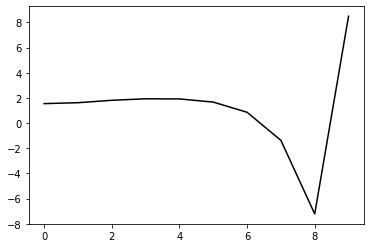

306900 0.279238162760928
0.6862133977713539 -0.3442266768474814 -0.4328949903443245 -0.2950997220064176
[ 1.52291037  1.64379254  1.83892654  1.96961002  1.96982072  1.7218686
  0.91410418 -1.32471634 -7.18458351  8.57340545]


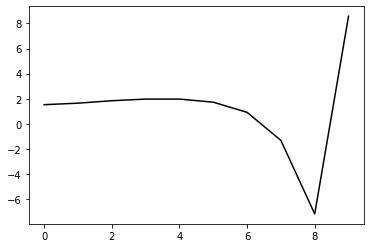

308000 0.23270234146217486
0.6915219609964108 -0.35604178175222867 -0.4441550020956979 -0.2957225880661812
[ 1.55017527  1.66495175  1.8717491   2.02267158  2.04779263  1.82457555
  1.04078185 -1.1744087  -7.00258542  8.52002179]


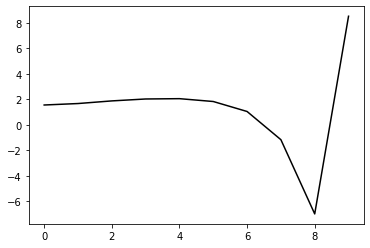

309100 0.19274865419067397
0.7162344517959024 -0.32902063757056804 -0.4308441661084892 -0.2981309580927967
[ 1.54647827  1.76116488  1.96870409  2.12173224  2.14990279  1.92623348
  1.13890893 -1.08222398 -6.92207397  8.51575035]


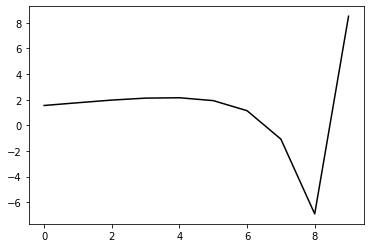

310200 0.20193159319379053
0.7293645165273347 -0.326972303262295 -0.43390536731739987 -0.29354661001985083
[ 1.47517591  1.81499882  2.02317228  2.16201075  2.1736967   1.9315455
  1.12565982 -1.11139632 -6.96845923  8.43669927]


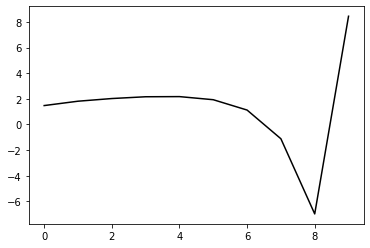

311300 0.19350642746423205
0.7464511099422018 -0.31028029469306295 -0.4268931256327009 -0.29433308653576534
[ 1.49441634  1.81915907  2.01597164  2.14773906  2.15568587  1.91608171
  1.1190059  -1.10480274 -6.94222991  8.55509232]


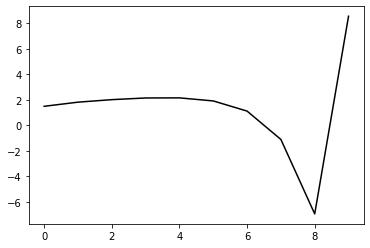

312400 0.1044827287335755
0.7590546034559158 -0.30868298191901106 -0.4294098771632918 -0.29806355021526865
[ 1.50203031  1.8596517   2.09243227  2.25185088  2.28710308  2.07247568
  1.29673706 -0.9093455  -6.73878762  8.50705894]


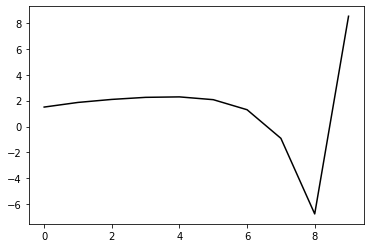

313500 0.18950199479782007
0.7458767733950763 -0.3113759576052215 -0.4291396906090549 -0.2987266229459268
[ 1.5107211   1.82075461  2.04743255  2.20355694  2.23098761  2.00483754
  1.21592721 -1.00130562 -6.83605686  8.54440722]


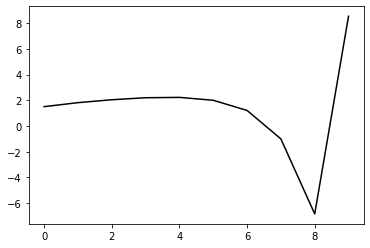

314600 0.2703516977946053
0.747380540220631 -0.333236121617061 -0.446858852140548 -0.29556317250567626
[ 1.43529646  1.92955022  2.17933409  2.35148503  2.39095051  2.1696869
  1.37827342 -0.84604324 -6.69633669  8.44482018]


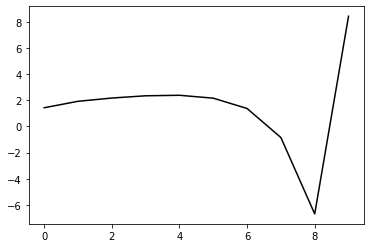

315700 0.19517521089155987
0.712078744339741 -0.32154136745729706 -0.43154241461912324 -0.3096697316152849
[ 1.62003036  1.71020829  1.94886041  2.11500182  2.15155013  1.93006159
  1.14049987 -1.08022652 -6.92407408  8.53341833]


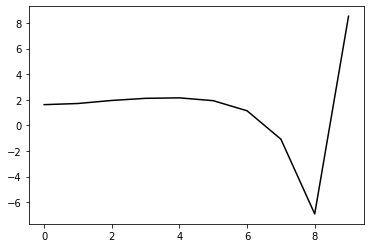

316800 0.15367861968065225
0.7351821347263485 -0.32160063594973004 -0.4391049959964598 -0.29721487013687947
[ 1.50232787  1.85642221  2.08944368  2.24799051  2.27563744  2.04431641
  1.24440901 -0.98672999 -6.84440439  8.66321377]


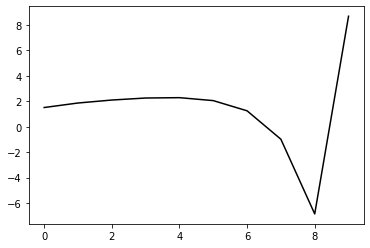

317900 0.2465657883958167
0.7506157055185372 -0.31412248664761616 -0.4389336498181401 -0.29844826988331236
[ 1.47802464  1.94232487  2.21309567  2.40812632  2.47134785  2.26986513
  1.48966613 -0.7320573  -6.60025336  8.55015107]


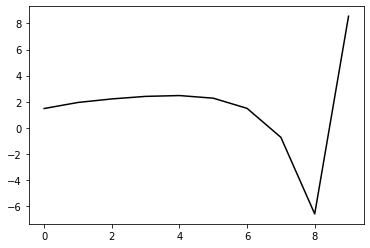

319000 0.42295771379353897
0.7279860749871413 -0.31414980021376077 -0.434716493348857 -0.3092080547690117
[ 1.61647518  1.76812396  2.05304831  2.26761746  2.35280486  2.17589426
  1.42077732 -0.77604817 -6.61822711  8.5863292 ]


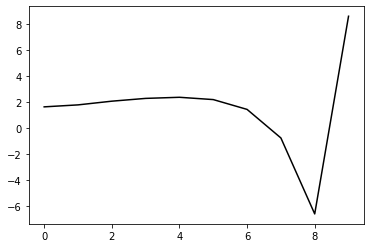

320100 0.21851093899351412
0.695144946909547 -0.3236279634066613 -0.43819746767215745 -0.2953465822416513
[ 1.54354913  1.69372534  1.9135544   2.07277523  2.10456673  1.88210848
  1.09234993 -1.13027058 -7.00424879  8.53359985]


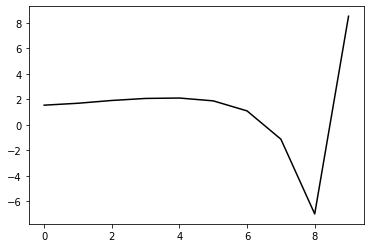

321200 0.14610027767638156
0.7246610944369057 -0.3126224670224555 -0.43832653040229647 -0.2972334170595394
[ 1.52730138  1.82998632  2.06646239  2.25173441  2.31300547  2.11887287
  1.35420751 -0.84707833 -6.69723609  8.53485015]


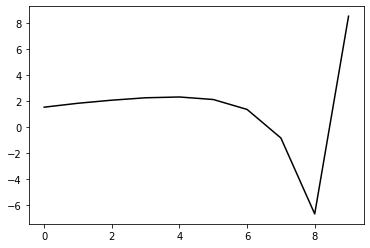

322300 0.18584052626624759
0.7103019570385499 -0.31488748850358256 -0.4409638536148202 -0.2944234237490068
[ 1.54564755  1.72445092  1.93875357  2.12639348  2.2010991   2.02942279
  1.29248821 -0.88124628 -6.71434925  8.42653029]


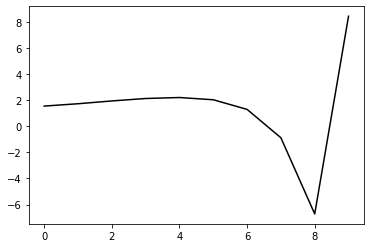

323400 0.12476969986228398
0.7000805304391315 -0.32146709126238054 -0.44349602903754204 -0.3009116827712566
[ 1.56704172  1.77783737  1.98309845  2.17230133  2.25526809  2.09014847
  1.35660122 -0.8166642  -6.65301168  8.55316049]


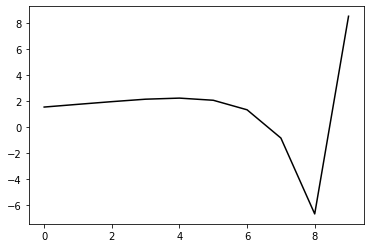

324500 0.30719526509859335
0.7267259913186872 -0.2930364112517174 -0.4288492608262492 -0.3045473962625617
[ 1.58649138  1.79108555  1.99600862  2.16921702  2.24644225  2.08352348
  1.3575085  -0.80430944 -6.62478894  8.52438795]


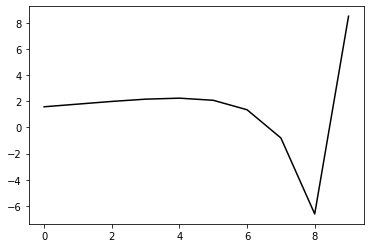

325600 0.24492615209690674
0.7330838085836331 -0.3138256329565675 -0.4492955465794102 -0.28658022492205126
[ 1.46422782  1.89408212  2.1196726   2.2930127   2.36593661  2.19749476
  1.46336978 -0.70839879 -6.54299093  8.61481121]


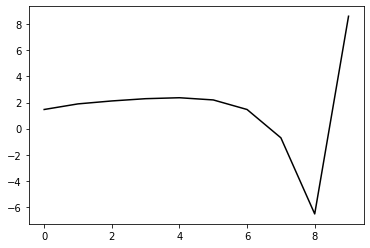

326700 0.1342640931548071
0.6940047201378681 -0.34582059714650704 -0.4502248798168611 -0.2885526082146462
[ 1.49331718  1.84506642  2.00516033  2.09776341  2.07536886  1.80970917
  0.98794721 -1.25367717 -7.13667901  8.5449085 ]


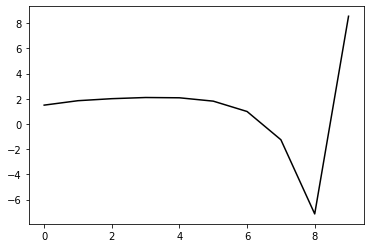

327800 0.42520685371583067
0.6895036314171022 -0.32342247794460194 -0.4284904464441296 -0.31292788480650746
[ 1.68503019  1.59337503  1.8328786   1.95292266  1.94934771  1.70194325
  0.89819407 -1.32552514 -7.19104898  8.50712844]


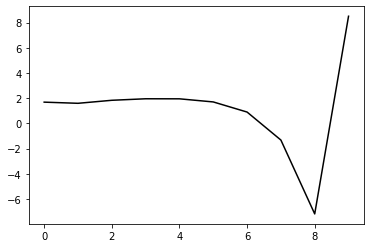

328900 0.28035242223821544
0.6789978530267228 -0.32083126699902714 -0.43065223481460885 -0.2977092475147536
[ 1.55603573  1.71160279  1.91707668  2.02766893  2.00707     1.74209323
  0.92181222 -1.31935367 -7.20964423  8.46360398]


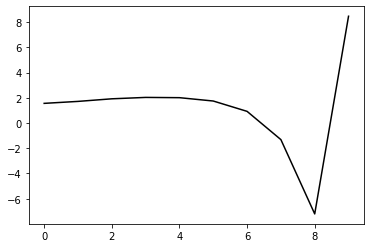

330000 0.21215294682540284
0.7346371226251727 -0.3058274545585352 -0.43737055696626115 -0.2866026779121019
[ 1.50980995  1.81008091  2.05956212  2.20092625  2.2065194   1.96456137
  1.16520438 -1.0570103  -6.930747    8.58426881]


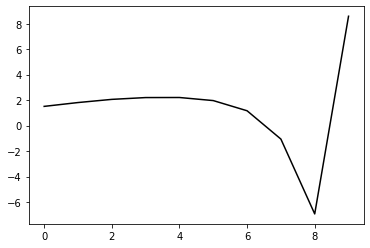

331100 0.4740611077628469
0.6966779004003165 -0.34596973522384594 -0.460993610442032 -0.2852110946058974
[ 1.43878055  1.77817624  2.03195804  2.19051761  2.20395004  1.96260758
  1.160393   -1.0655491  -6.94520664  8.51067608]


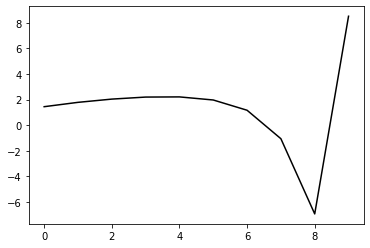

332200 0.2082962041971892
0.7048156054887204 -0.31311368672576456 -0.4366125037952375 -0.29392615042395337
[ 1.51787736  1.72667764  1.93504878  2.07984884  2.08634233  1.8413482
  1.0418065  -1.17690775 -7.05371864  8.5274393 ]


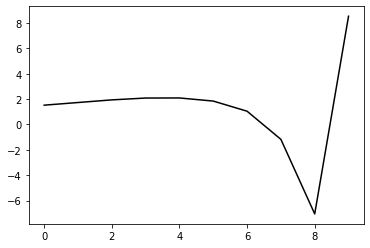

333300 0.20162495537677888
0.7189351716979595 -0.3130280834580287 -0.44200795981059465 -0.2898144719110552
[ 1.55930556  1.75696513  1.98477454  2.14442402  2.16988349  1.94296178
  1.16219136 -1.03673241 -6.89557129  8.49067765]


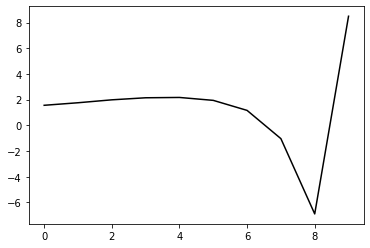

334400 0.12715825270274603
0.7100734834297258 -0.3129764361198449 -0.4404467459714241 -0.2985548148854785
[ 1.53023756  1.87580765  2.1080409   2.27542965  2.30530272  2.07083955
  1.27052644 -0.95482365 -6.84795287  8.4924064 ]


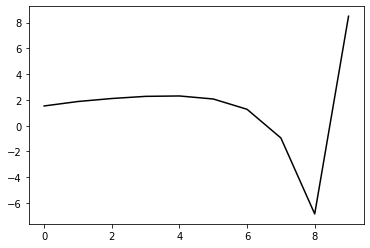

335500 0.2053258101116253
0.6894891281314499 -0.3246561841099512 -0.4448968879384095 -0.30433686326702264
[ 1.58219334  1.79566277  2.04342615  2.22300698  2.27001467  2.05385706
  1.26985159 -0.94062624 -6.82132797  8.5782623 ]


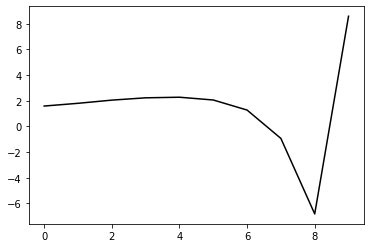

336600 0.28686543319807783
0.6908980928716223 -0.3191678423032091 -0.44425277391251633 -0.29969133684649313
[ 1.57544541  1.78238466  2.03120444  2.21183544  2.2615777   2.0483442
  1.26570585 -0.94546004 -6.83312446  8.51738398]


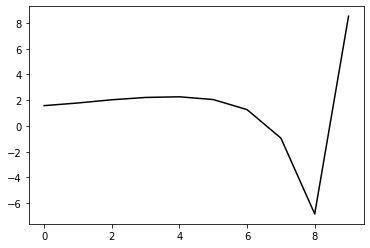

337700 0.1842916824149372
0.6683521977063125 -0.32636810872000643 -0.4487611486452001 -0.29164253662231343
[ 1.62344955  1.58322066  1.78902774  1.95422237  2.00073232  1.79460234
  1.02518197 -1.17029682 -7.04287638  8.51772552]


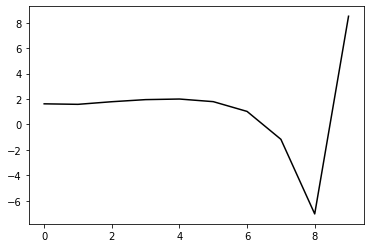

338800 0.16064242337205203
0.693448338538205 -0.2991958779777572 -0.4337290463530718 -0.2976578069708794
[ 1.54541361  1.76078045  1.96268259  2.11444241  2.1505072   1.93427623
  1.1543286  -1.05138614 -6.93417107  8.4296458 ]


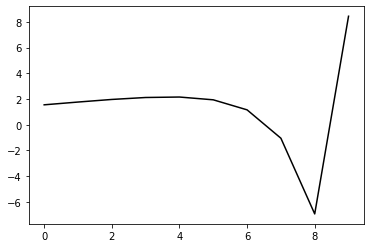

339900 0.2620968639493955
0.6893158245220874 -0.3270344038979608 -0.4571235292334656 -0.2826820215964082
[ 1.48753133  1.80842     2.02092192  2.17853626  2.22031296  2.00978056
  1.23342774 -0.9701925  -6.8526638   8.52439912]


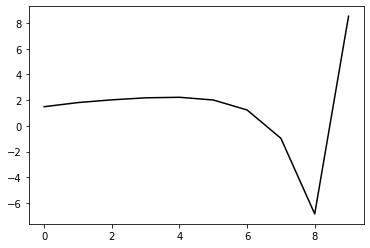

341000 0.19667458444398328
0.7048086116769067 -0.30886305637140493 -0.4438010951192203 -0.2972466089381912
[ 1.53073507  1.8284311   2.04685891  2.20379355  2.247837    2.0457464
  1.28264454 -0.90379868 -6.76356563  8.53541801]


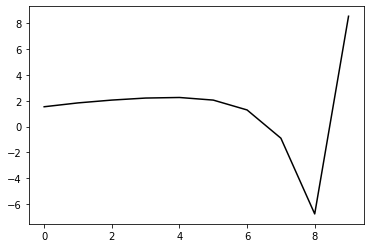

342100 0.22528576532335562
0.6765767377992166 -0.32484768047178625 -0.44946563082989643 -0.30163358811321284
[ 1.60615217  1.62755456  1.84859361  2.00043036  2.04312189  1.85054002
  1.10457946 -1.05954056 -6.8927083   8.47527121]


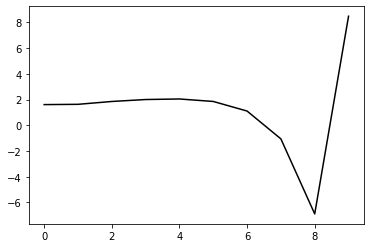

343200 0.20334106348162367
0.7006133194374186 -0.31103863062005593 -0.4468528563899664 -0.2908302997899106
[ 1.49030195  1.79362016  1.99387816  2.13434831  2.16113401  1.95249903
  1.19326836 -0.98290171 -6.83328148  8.59049118]


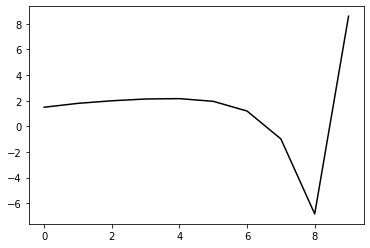

344300 0.19374285020163975
0.7191626007124486 -0.310856353958847 -0.450418463991548 -0.2968104054295628
[ 1.49524899  1.92407095  2.17978116  2.36040857  2.4176071   2.22510382
  1.47033269 -0.7072873  -6.56185408  8.5058738 ]


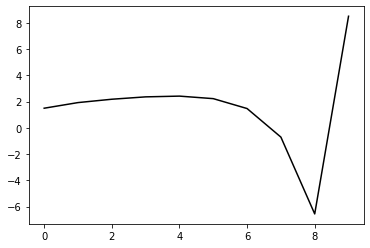

345400 0.1255028797061387
0.7055216726687142 -0.2986783269060089 -0.4430984236858435 -0.29488820688086986
[ 1.54616942  1.81303275  2.03420589  2.19055381  2.22144505  2.00592906
  1.2355104  -0.95144421 -6.81782912  8.48770248]


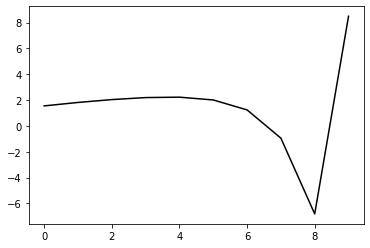

346500 0.1794100493475874
0.713986842089802 -0.3019952107293122 -0.44324307011985203 -0.30590214297092455
[ 1.5340255   1.87857421  2.11691206  2.27260757  2.29977585  2.07978772
  1.30659932 -0.87937475 -6.73668697  8.52653913]


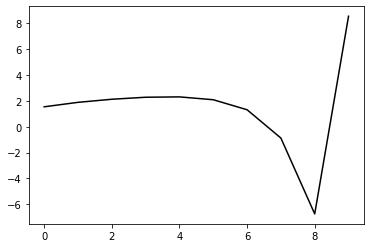

347600 0.24848863373136526
0.7163024966874263 -0.31133448756057813 -0.45457945538593614 -0.2940069727016017
[ 1.44902882  1.94376967  2.17629538  2.31586854  2.31984268  2.07263496
  1.27189447 -0.94048568 -6.82620765  8.50504932]


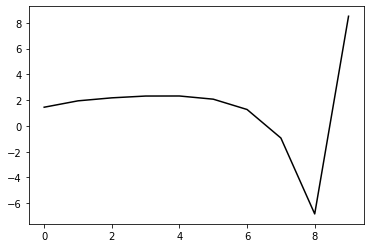

348700 0.7898207621323755
0.6746324726965114 -0.29259890906109975 -0.42667970417925494 -0.32978449161908985
[ 1.72952727  1.71051429  1.97336696  2.14076783  2.16971605  1.94367851
  1.1608919  -1.03452797 -6.89653631  8.50063135]


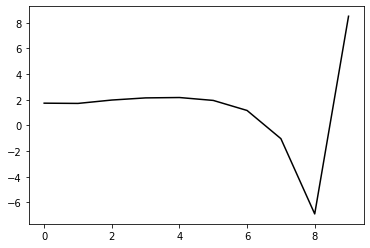

349800 0.15311163209384318
0.7099857775489958 -0.31627666799233484 -0.45042358418668427 -0.301948502471419
[ 1.50250338  1.95426555  2.20030775  2.32919334  2.30842516  2.02759034
  1.19173095 -1.05055679 -6.95505204  8.51095343]


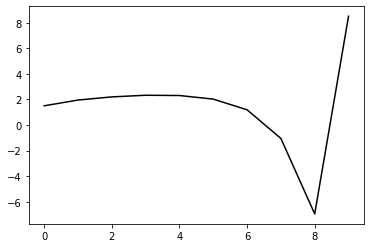

350900 0.19150444976531647
0.7111531592591204 -0.3074948748470961 -0.44507333961945267 -0.3017229540244673
[ 1.52147294  1.87436019  2.13296995  2.26792317  2.24831711  1.96908548
  1.13661267 -1.10068202 -7.00159939  8.60697461]


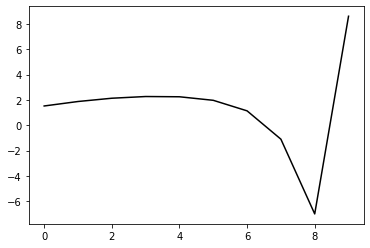

352000 0.2930794522991987
0.7192229244362573 -0.29509269256904463 -0.4380491724947519 -0.3089811298299497
[ 1.57500717  1.80616629  2.09461114  2.25846381  2.26201114  2.0022852
  1.18738301 -1.03389911 -6.92360497  8.52057363]


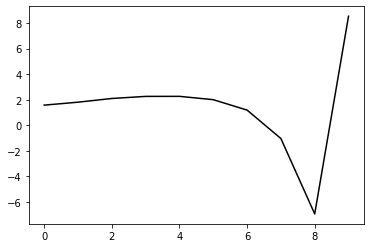

353100 0.14787918184327797
0.7204586841835564 -0.31158004650470456 -0.44555956726836965 -0.3141500827731549
[ 1.54975196  1.90470457  2.21106677  2.40474583  2.4278765   2.17516489
  1.35986004 -0.8634523  -6.75357148  8.52682076]


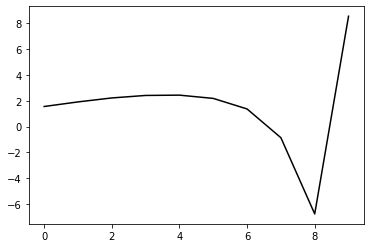

354200 0.2682385121991238
0.6791615443982929 -0.33829526459317283 -0.4648617470718514 -0.30107061514944156
[ 1.4710305   1.81388922  2.04861922  2.19950478  2.18844527  1.90853139
  1.07672276 -1.15278537 -7.03956624  8.56931531]


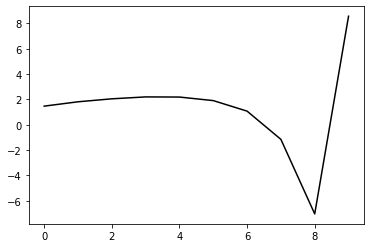

355300 0.3575603199124598
0.7019654381389266 -0.31813624628617343 -0.44655461371068 -0.3219498082847004
[ 1.65919462  1.74467819  2.05180515  2.26556731  2.31500906  2.07467351
  1.26450925 -0.94853358 -6.8156469   8.50935803]


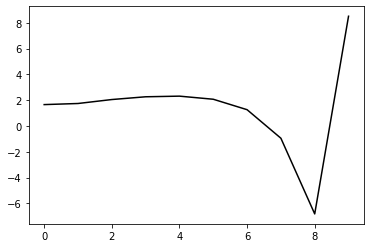

356400 0.10371393195201761
0.7397223069475648 -0.2935702163270708 -0.44399365433954957 -0.29372354068079154
[ 1.53185771  1.82191497  2.0947306   2.31141368  2.37280221  2.14585022
  1.34501129 -0.86685094 -6.75765788  8.54699262]


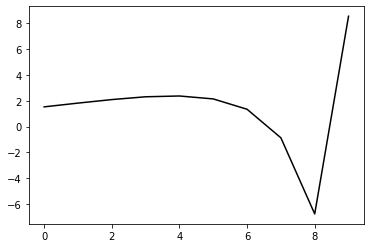

357500 0.2927321238771484
0.7358487130761315 -0.2823075319954081 -0.4356042576549608 -0.30211535498277386
[ 1.59681791  1.78495833  2.04166383  2.25542658  2.32659519  2.11496171
  1.33143004 -0.86051738 -6.72837621  8.49329652]


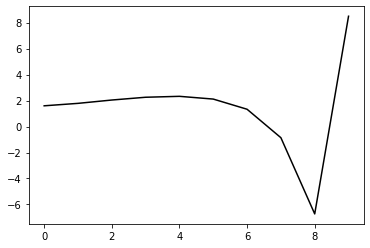

358600 0.24806762820162537
0.716253276643124 -0.3030664313713292 -0.45106398187983093 -0.2863739884917
[ 1.51052512  1.76903452  1.98365769  2.15730366  2.19716351  1.95975988
  1.15313794 -1.05535364 -6.93355299  8.55059826]


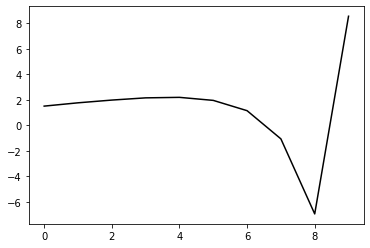

359700 0.6833943930138078
0.6846867587553302 -0.28642311449835084 -0.4289094591261753 -0.31324221948292896
[ 1.72428995  1.58862783  1.79147718  1.95570634  1.9993246   1.77952296
  0.99647462 -1.18579231 -7.03222387  8.5543764 ]


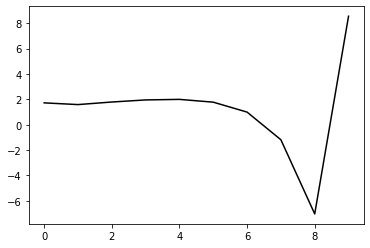

360800 0.15103382758934034
0.7291474381590645 -0.28577102677931904 -0.44227296092692553 -0.2958475855619083
[ 1.56151392  1.87596631  2.10516214  2.27326344  2.31535166  2.08536972
  1.28160375 -0.93007127 -6.82408471  8.5008839 ]


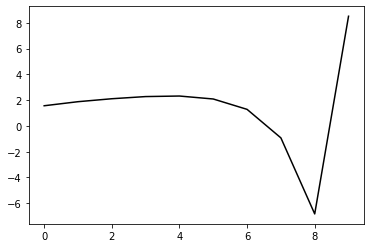

361900 0.32586076372111805
0.7201180634520498 -0.3062154733618584 -0.4588563376340961 -0.2803482953324528
[ 1.47925781  1.91128654  2.14171398  2.29059093  2.3061042   2.0501024
  1.22096812 -1.01244282 -6.92049022  8.52977693]


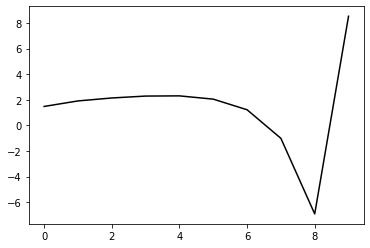

363000 0.22217935054366875
0.6890026783770381 -0.3027858509059452 -0.4515820346486905 -0.2841891641142991
[ 1.54280626  1.81842594  2.03516343  2.18161261  2.19525371  1.94005951
  1.11028095 -1.12689047 -7.04309908  8.47675673]


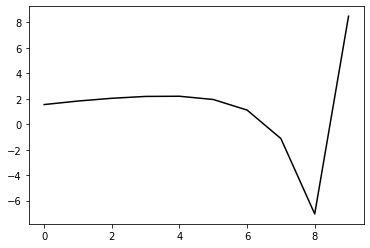

364100 0.17103699035548986
0.7159631846933558 -0.29414692292048034 -0.44827850908288586 -0.29478755084588043
[ 1.55245313  1.88758788  2.14680299  2.32025946  2.35799685  2.12479623
  1.31252371 -0.91020507 -6.80851805  8.51767884]


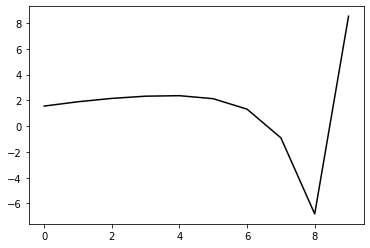

365200 0.8344795047321332
0.6925063934032005 -0.23451722705895578 -0.39775009666250033 -0.3286074430963718
[ 1.7132592   1.72680799  1.939503    2.10543103  2.13497685  1.89717598
  1.08326819 -1.13943533 -7.04339339  8.50319061]


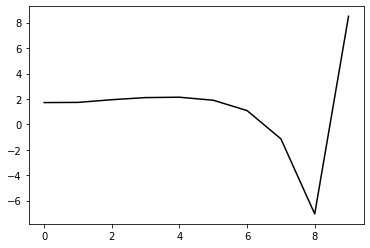

366300 0.21637169416868537
0.7261008898624085 -0.2654993710443711 -0.4316220251446867 -0.2952352350063604
[ 1.48858961  1.96597641  2.18967221  2.32317425  2.31656102  2.03584501
  1.17409592 -1.10023685 -7.07505704  8.5235977 ]


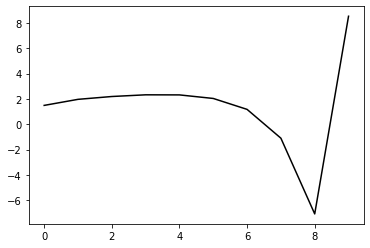

367400 0.12934247441401012
0.6999712781113696 -0.2934346204658237 -0.44298581100989687 -0.31018421912185534
[ 1.53885677  1.93012467  2.21234405  2.39104578  2.42495387  2.1808292
  1.34777019 -0.90753434 -6.87599273  8.47459122]


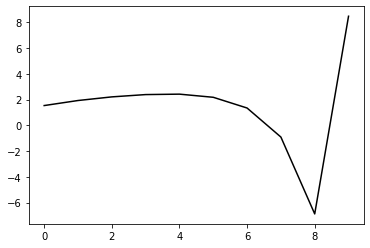

368500 0.22714117605743747
0.7141269367167107 -0.2856685839358498 -0.4480729451935091 -0.2961372257753771
[ 1.48371172  1.92671716  2.21453623  2.40130935  2.43601165  2.18915268
  1.35020149 -0.91506115 -6.89739295  8.56014651]


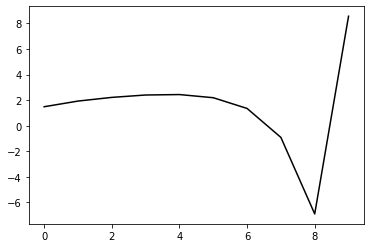

369600 0.2906752453126822
0.7223352178202083 -0.287931784501811 -0.4534798548188742 -0.2886186210327321
[ 1.4164893   1.97500031  2.24868126  2.41616126  2.42574136  2.15176279
  1.28746791 -1.00013226 -6.99924546  8.48616266]


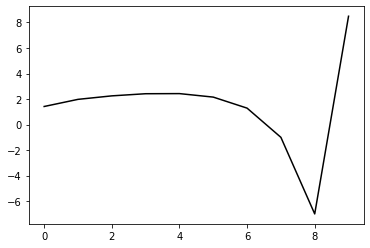

370700 0.10864491242206761
0.6948941836154096 -0.2968267181981184 -0.4508738430627348 -0.29614278568222746
[ 1.55393362  1.78851782  2.0591654   2.22713115  2.24131461  1.97648701
  1.12458356 -1.14953344 -7.12827245  8.53886167]


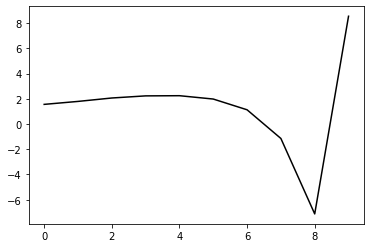

371800 0.1904506812145965
0.7142788058522274 -0.2999497093105923 -0.4558014532208495 -0.30490064165199504
[ 1.4669778   1.94153135  2.26576507  2.47793617  2.52716879  2.28682633
  1.4496457  -0.81677318 -6.79406535  8.47563852]


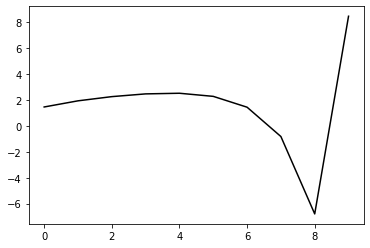

372900 0.3544680429203385
0.7359400612177907 -0.2882348854905289 -0.45253797163167814 -0.298689671860272
[ 1.44658168  2.01674147  2.30253462  2.49330821  2.51949117  2.25715993
  1.40271648 -0.87593442 -6.85613202  8.46305113]


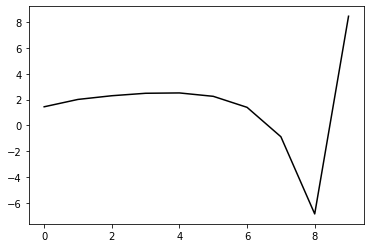

374000 0.2775521702439243
0.6516132787015241 -0.3156319389352371 -0.45012212214725855 -0.31220894700810964
[ 1.61012803  1.62864147  1.8635197   2.03230558  2.05338698  1.7996897
  0.96314938 -1.29265849 -7.23759647  8.50103813]


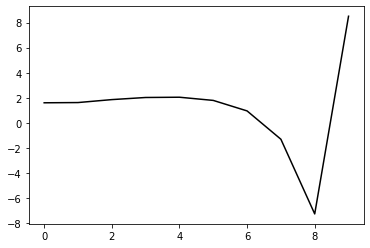

375100 0.18414623966462867
0.7070939841203233 -0.2899236892365238 -0.4453544987758282 -0.30576772769363975
[ 1.55177464  1.79989147  2.02777292  2.20040981  2.23146166  1.98733808
  1.159112   -1.09099625 -7.03265657  8.50596555]


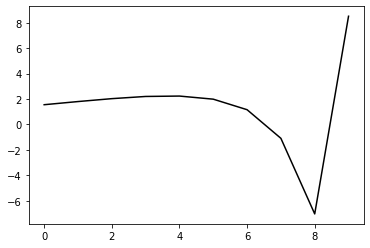

376200 0.2729601929288503
0.7215456183446356 -0.30159028584349734 -0.45835957143645334 -0.30186503521908076
[ 1.43714725  1.90340215  2.14317037  2.30280803  2.32059728  2.06373849
  1.22449411 -1.03332195 -6.97795359  8.55672301]


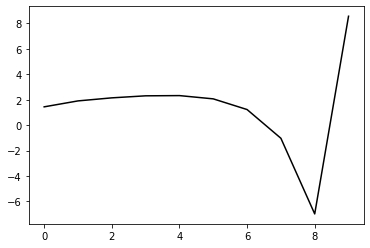

377300 0.21498966407729664
0.6950688413480903 -0.297636846247223 -0.45047638637451004 -0.3105228644687681
[ 1.56582293  1.80031594  2.03981253  2.20822714  2.23962615  1.99851324
  1.17350395 -1.07444059 -7.01483079  8.56198608]


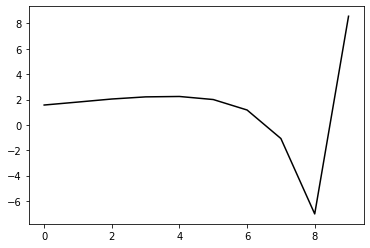

378400 0.1786745313782214
0.668073466316958 -0.32174355575309566 -0.46104679891519734 -0.3152733625974643
[ 1.54782873  1.73892315  1.97658265  2.13033623  2.14773182  1.89691441
  1.06626046 -1.18280168 -7.11303317  8.46649836]


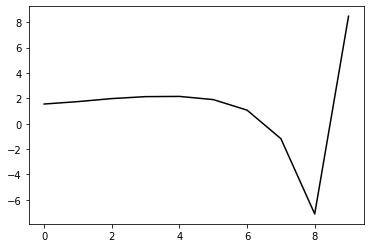

379500 0.2327947753265714
0.6843453027165104 -0.32247321459586104 -0.46425203338725984 -0.3143937643226402
[ 1.52271018  1.81165848  2.05742096  2.21621159  2.23472949  1.9851901
  1.15667251 -1.08904997 -7.01061285  8.5156147 ]


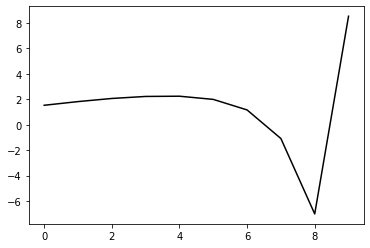

380600 0.40978448790228095
0.7206785925446834 -0.31612912812821825 -0.4708375914966041 -0.2988547940594689
[ 1.39151037  1.90754758  2.16360624  2.32263878  2.33900079  2.08854824
  1.25842326 -0.99208704 -6.92725754  8.50458353]


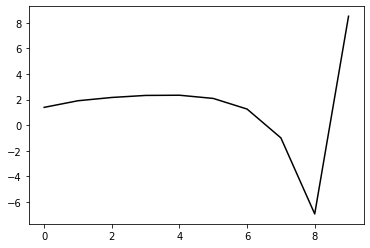

381700 0.0902847086892805
0.7064197995450276 -0.31087912598950346 -0.4610958610275519 -0.3136590773523482
[ 1.51526524  1.82392297  2.08335131  2.26145987  2.29592643  2.06309465
  1.25041114 -0.9837594  -6.89647902  8.45763234]


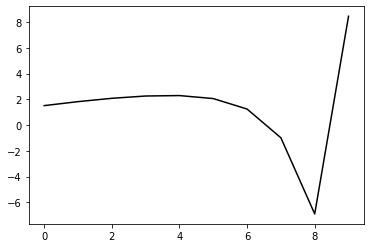

382800 0.22922578596564122
0.7059615686590187 -0.27996744563145864 -0.43621929369100965 -0.32021504010339186
[ 1.53433678  1.78839217  2.00929527  2.14636186  2.14164131  1.8729134
  1.0313413  -1.22560592 -7.16305883  8.47514917]


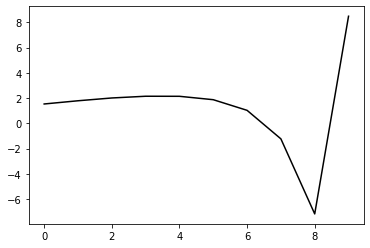

383900 0.29391442897761455
0.641478117754678 -0.32383612132104433 -0.46101050968345536 -0.30439548201522687
[ 1.52287479  1.69898396  1.91347289  2.04011796  2.02156269  1.73635634
  0.87722951 -1.39784693 -7.35531356  8.48400315]


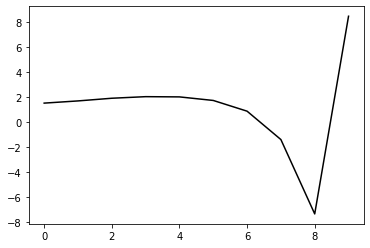

385000 0.20255033331221858
0.7072607290042006 -0.29195928635026086 -0.45233901281310684 -0.3063905376322095
[ 1.5147151   1.84578062  2.09631197  2.25759606  2.27107074  2.01225297
  1.17322933 -1.0886207  -7.03541889  8.41576576]


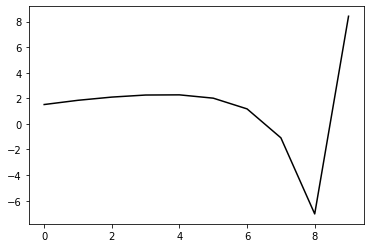

386100 0.2029057195209234
0.734774594748416 -0.28265294336059277 -0.4499333219762517 -0.3162636169264375
[ 1.51911564  1.93760099  2.24802552  2.45772015  2.51365971  2.28803484
  1.47210068 -0.77507816 -6.71955194  8.51012848]


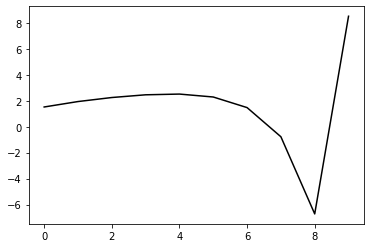

387200 0.1686473909345579
0.7317648408261415 -0.28420866317313764 -0.4480481448722157 -0.31497567851101255
[ 1.51001608  1.85291528  2.11254975  2.28400689  2.30816368  2.06190837
  1.23678319 -1.01088301 -6.94055008  8.51722536]


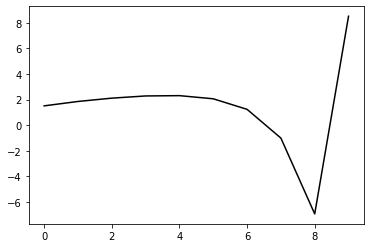

388300 0.17941763516961579
0.7265681967783473 -0.28407372307073614 -0.44966452632834963 -0.3121526633369516
[ 1.47434265  1.79319445  2.05045071  2.2217195   2.24771567  2.00733696
  1.19188739 -1.04547887 -6.96843955  8.52887674]


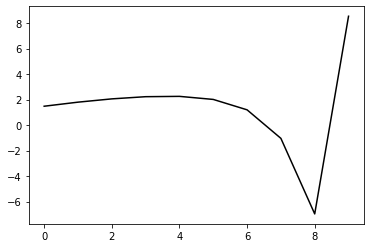

389400 0.12148677207881534
0.7280739917604353 -0.29105610014030225 -0.4539555256706135 -0.31492053231307426
[ 1.490041    1.87921461  2.14543246  2.33040757  2.36192139  2.11489972
  1.28396404 -0.97276028 -6.91393873  8.50168378]


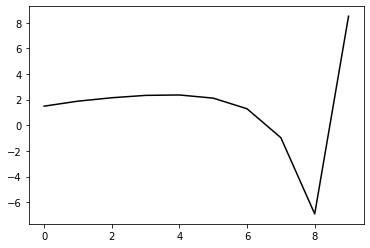

390500 0.25107751974141257
0.6824459891376541 -0.3069732318273478 -0.45079341647751475 -0.33215866588247267
[ 1.57541205  1.73036821  1.9849412   2.16010741  2.18719102  1.93967278
  1.11209359 -1.13670878 -7.05828562  8.49125429]


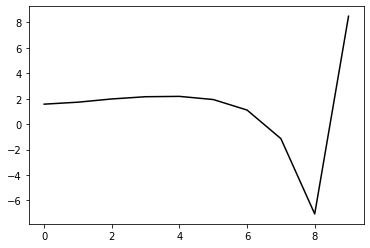

391600 0.2669191087609404
0.6974322613884542 -0.30023443404283195 -0.45758906043006914 -0.312129721947234
[ 1.50251056  1.74781675  1.98278962  2.17213563  2.22151312  1.9986232
  1.19459313 -1.03685192 -6.95740228  8.5732064 ]


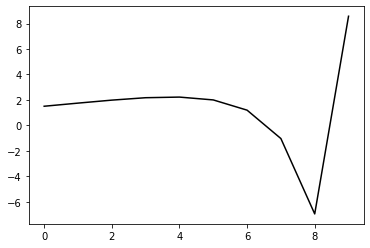

392700 0.12531545359689236
0.6998871734451046 -0.3037881647414164 -0.45973751012930614 -0.306751517844649
[ 1.54555072  1.69111875  1.90888593  2.07541943  2.10875264  1.87267564
  1.05810701 -1.18119599 -7.109582    8.46798484]


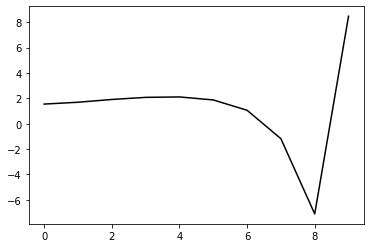

393800 0.24035485983802604
0.6684718257106383 -0.291391203605341 -0.4404620077383022 -0.32327296291642127
[ 1.55649872  1.64525091  1.84786634  1.98994     2.00137214  1.74430532
  0.90909561 -1.34935086 -7.29817418  8.48015611]


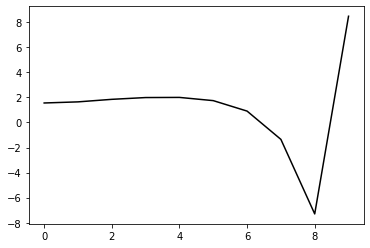

394900 0.21851829431586173
0.7048554382074123 -0.2815416739808407 -0.44396383719961235 -0.3149411591008522
[ 1.50631139  1.7763553   1.99876134  2.15128292  2.17426106  1.92961718
  1.10548278 -1.14339783 -7.07525112  8.44014702]


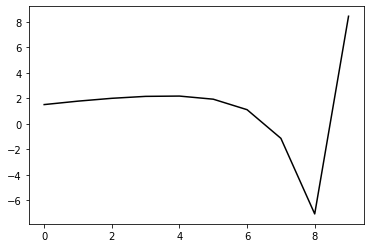

396000 0.22720328875450355
0.6740584740149534 -0.3105079804641174 -0.4598514494785717 -0.3092948297141024
[ 1.50303196  1.74398314  1.96868512  2.11736125  2.13025204  1.87298466
  1.03333897 -1.23288167 -7.18622482  8.42822422]


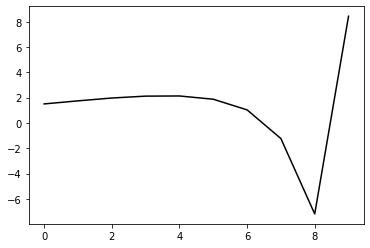

397100 0.18890366183378668
0.7008479450392655 -0.2876822242626692 -0.44782658297148575 -0.31684638280775895
[ 1.51893205  1.78818811  2.01780844  2.17178044  2.19094892  1.94221429
  1.11233482 -1.1431315  -7.07609863  8.54500096]


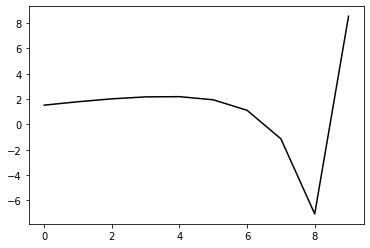

398200 0.21331912934372202
0.7067555313841559 -0.29358329502786645 -0.4562213581016444 -0.30941210214191
[ 1.4415651   1.81137621  2.05183869  2.20677075  2.2248398   1.97582851
  1.14603177 -1.11002784 -7.04589859  8.48439993]


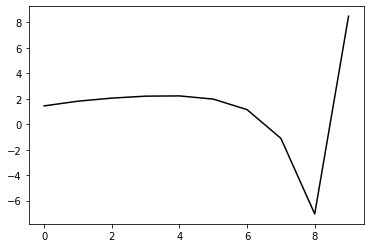

399300 0.22019930631804435
0.7025738108886354 -0.2976148477424942 -0.457914364097841 -0.3115443135982493
[ 1.45675273  1.79817634  2.04385808  2.19754128  2.21065318  1.95779729
  1.12667364 -1.12765463 -7.05320502  8.53682076]


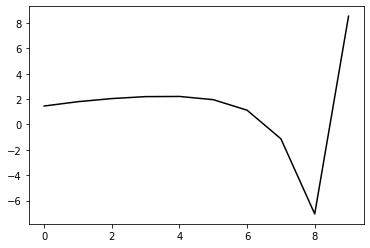

400400 0.24518386605391326
0.6734763807118203 -0.3000436614402027 -0.4468874336268424 -0.3319242184516743
[ 1.56331757  1.62977222  1.8489525   1.99362509  2.00352769  1.75790009
  0.94362839 -1.28704482 -7.17922439  8.44288285]


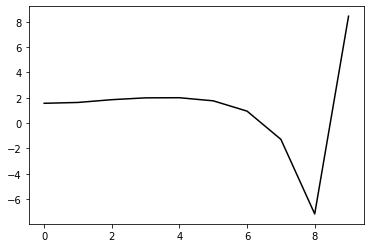

401500 0.30725595631164226
0.7294283110074754 -0.26906238460115595 -0.43906075263190836 -0.32664513981164967
[ 1.54468382  1.77614378  2.04038345  2.22084155  2.25854571  2.02773858
  1.2192579  -1.01178629 -6.91020594  8.49180598]


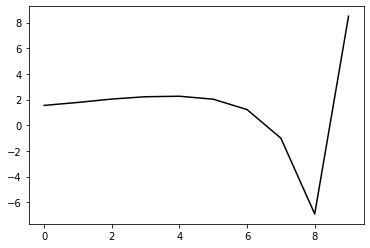

402600 0.326587363564047
0.7148267511485251 -0.30665681955834984 -0.467040204926341 -0.30851879461064063
[ 1.36620128  1.83407232  2.07204442  2.21840059  2.22041707  1.95819601
  1.12575846 -1.12226795 -7.02753258  8.51859865]


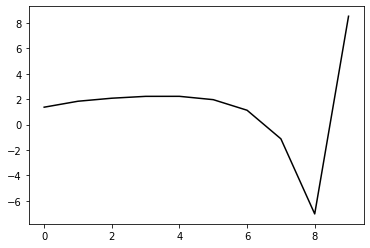

403700 0.14910422553922906
0.6941107776171188 -0.2918609034287148 -0.45194098017850953 -0.3153959368406715
[ 1.51807098  1.61203305  1.83000124  1.97299     1.98107207  1.73194336
  0.91806006 -1.30898132 -7.18888408  8.5468785 ]


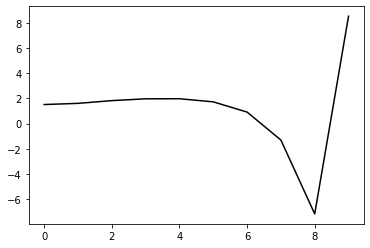

404800 0.1542805665659343
0.7040921683458643 -0.2891161962022246 -0.44871120620373933 -0.3311154204306724
[ 1.46561558  1.7849085   2.02024242  2.17389622  2.18816886  1.93963526
  1.12287158 -1.10787743 -6.99013878  8.46021087]


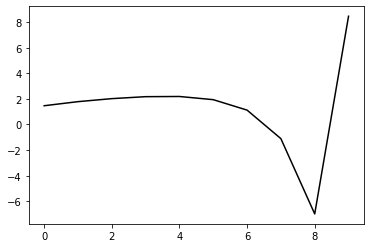

405900 0.25517767235592786
0.7278636009388811 -0.2905464755827338 -0.45718762532847296 -0.32409623305613583
[ 1.42714937  1.87534779  2.14883802  2.33372829  2.37497373  2.14753685
  1.34560502 -0.87506232 -6.75423024  8.51950846]


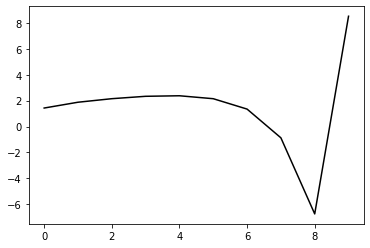

407000 0.1977409813650156
0.6942473494796617 -0.30064311984992803 -0.4559592580688203 -0.3332531415991893
[ 1.50614079  1.73130617  1.98846414  2.17305802  2.21577313  1.9903516
  1.19138527 -1.02444349 -6.89200887  8.50914438]


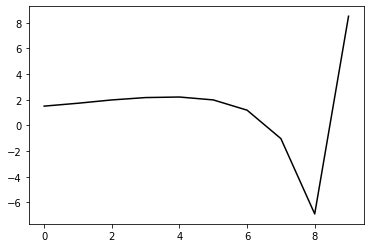

408100 0.1816392668174501
0.6927233567814184 -0.2991857105166883 -0.4579191996077625 -0.3268441790833916
[ 1.4926888   1.71493069  1.96525276  2.15797219  2.21462773  2.00444065
  1.21952633 -0.98555921 -6.85176652  8.45974742]


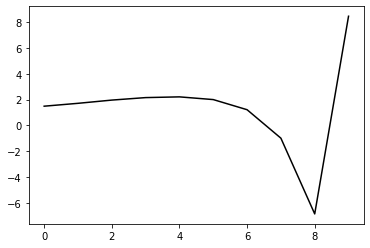

409200 0.24835211875289603
0.718244404062793 -0.27083454123554973 -0.44572969212163366 -0.3210428245284448
[ 1.5034845   1.75598994  1.99750337  2.18654283  2.24415211  2.0345562
  1.24812333 -0.96186105 -6.83972647  8.5268723 ]


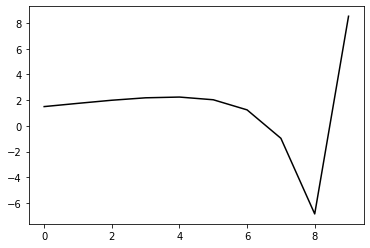

410300 0.18680426947003861
0.7176387641261186 -0.2785084867379636 -0.45513391139588016 -0.30992019755640454
[ 1.44358922  1.74872638  1.96030782  2.13552422  2.18731505  1.97777612
  1.19590326 -1.0068523  -6.87606637  8.53899152]


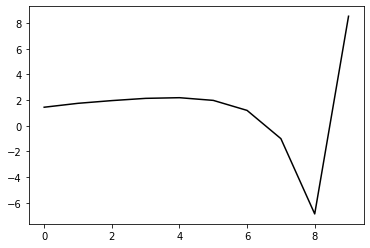

411400 0.1187406518970208
0.7111312739993697 -0.28362496031554557 -0.4544276313857563 -0.3210137338836227
[ 1.4823908   1.76163468  1.97536071  2.14990994  2.20769891  2.00608118
  1.23204463 -0.96208458 -6.81820049  8.47054476]


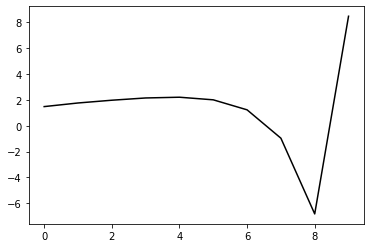

412500 0.2120598588047137
0.7065165398911959 -0.281466585097206 -0.4492703667296634 -0.32783927911062705
[ 1.52850416  1.72191217  1.93889032  2.10425729  2.15610253  1.95323184
  1.18109502 -1.0069336  -6.84726912  8.51443071]


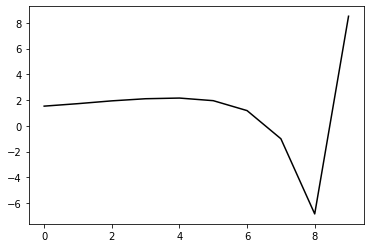

413600 0.2699566458326025
0.7071360025545254 -0.2973259074631557 -0.46278623546436953 -0.3133987559459567
[ 1.38918715  1.73264937  1.9115263   2.01322114  2.00893144  1.77085396
  0.98078784 -1.21461047 -7.05241535  8.51582218]


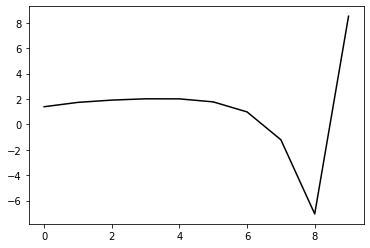

414700 0.07069190644157548
0.753626683398523 -0.26445409290751415 -0.44834703972263795 -0.31332110602748053
[ 1.41307567  1.81226704  2.01894107  2.14846035  2.16871323  1.95489601
  1.18715019 -0.99060882 -6.81941324  8.42423807]


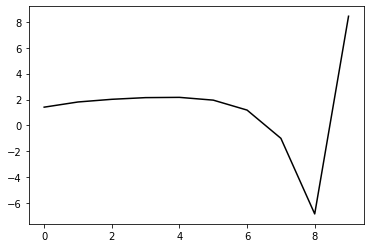

415800 0.1921931746436903
0.7075448573825167 -0.28647113169235805 -0.45459178665892125 -0.3119292803863078
[ 1.49519065  1.61237508  1.78548231  1.91389844  1.93413453  1.72499388
  0.96715715 -1.19957276 -7.01861976  8.50062013]


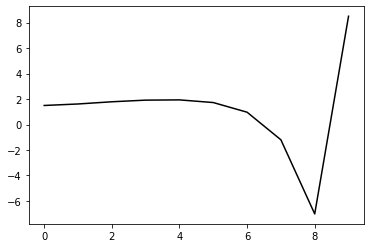

416900 0.20656240955741811
0.6907724088686756 -0.296837690835494 -0.46160929638585313 -0.3232432471702625
[ 1.52670051  1.65568231  1.86107949  2.02815546  2.0899577   1.92055801
  1.19998483 -0.93508166 -6.73632649  8.42130021]


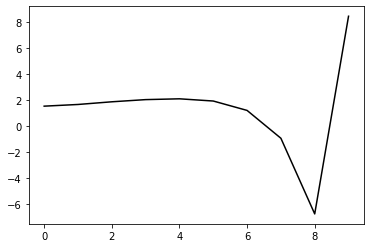

418000 0.41649475539781905
0.7106926320982575 -0.3028515904138518 -0.47494660442627756 -0.31022946110625577
[ 1.39822709  1.75211438  1.96893134  2.1482197   2.22899587  2.07926365
  1.37658779 -0.74636607 -6.55647907  8.55312137]


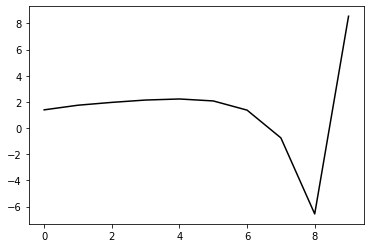

419100 0.1852459255616649
0.6928851928301061 -0.27592629669337554 -0.4515106440859401 -0.3132249493581786
[ 1.53319902  1.61773891  1.77950844  1.929239    1.99191765  1.83505423
  1.13579305 -0.97893732 -6.780159    8.43558819]


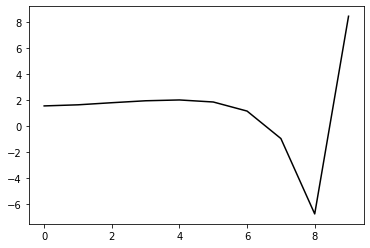

420200 0.23113597311523346
0.7190261688753538 -0.28723931360994265 -0.46444933804851696 -0.3160526383971489
[ 1.44607401  1.78777102  1.99676181  2.1703318   2.25525935  2.1135264
  1.42153247 -0.69039569 -6.49289446  8.58864494]


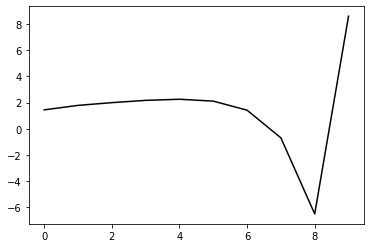

421300 0.3154987874301455
0.6218790382574418 -0.3252204585643907 -0.4771753716941079 -0.30758702469790006
[ 1.54690371  1.47773973  1.62010873  1.75223885  1.80209775  1.63665619
  0.93299703 -1.18197587 -6.98351099  8.49568939]


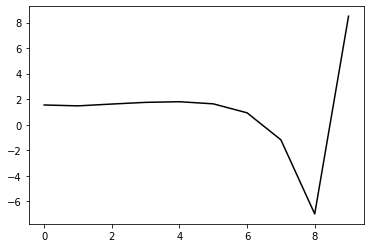

422400 0.19494256541797622
0.6417400884214606 -0.32202869926080074 -0.47756716785209463 -0.309379180339332
[ 1.60766149  1.52694304  1.68789126  1.8447544   1.92011103  1.77598004
  1.08852495 -1.01577685 -6.80960388  8.54991778]


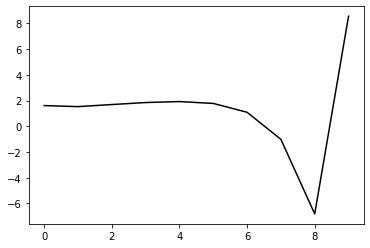

423500 0.21183476392850206
0.6744633829445303 -0.2979092003803412 -0.46371763758314183 -0.3098740856294662
[ 1.58206822  1.62948863  1.77925686  1.93535005  2.018581    1.8855093
  1.20846612 -0.88840495 -6.67954589  8.49441084]


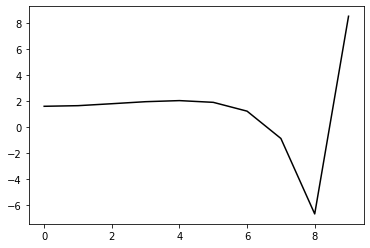

424600 0.25830139603172003
0.7046200452636695 -0.29235788364278353 -0.4692939907583082 -0.29323646466453795
[ 1.45391691  1.82115152  1.96151444  2.08343915  2.13106982  1.96173393
  1.24880424 -0.88383062 -6.71896582  8.61314721]


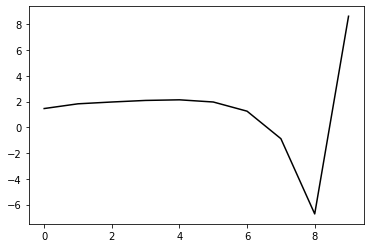

425700 0.06887390436026122
0.6978437597501341 -0.2844811920974589 -0.46055870564505813 -0.30203892579721575
[ 1.54038407  1.78680664  1.94664667  2.07147368  2.1215548   1.95621903
  1.24678549 -0.8840276  -6.71892271  8.53331842]


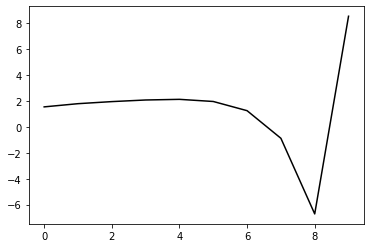

426800 0.13407524144687336
0.6971094057057533 -0.2789798034500798 -0.45670510359715977 -0.30662125537304735
[ 1.54439193  1.76714303  1.96027736  2.0914812   2.14038772  1.97818232
  1.27537926 -0.84817806 -6.68211404  8.45425729]


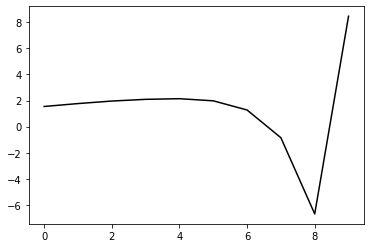

427900 0.22544163637374942
0.6905631000182437 -0.27525387507628574 -0.45602997848333615 -0.29958130074762745
[ 1.57514568  1.67161762  1.84815316  1.97595641  2.0179979   1.85421096
  1.15643967 -0.95951768 -6.79002774  8.53432839]


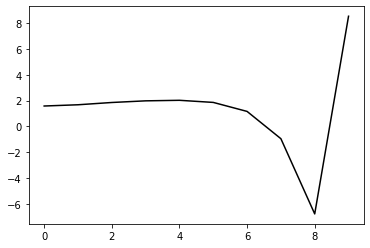

429000 0.2577865749489165
0.6867618232237475 -0.27591048148080244 -0.455705714991537 -0.3031504994076209
[ 1.60481817  1.61628368  1.79596666  1.92211855  1.9625226   1.80246776
  1.11692378 -0.98051198 -6.78891751  8.41207845]


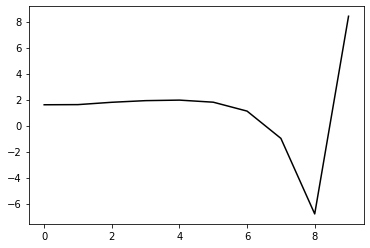

430100 0.2914277574698176
0.7148743050195371 -0.26509212303410956 -0.45102206562274394 -0.304806944510458
[ 1.55115025  1.85636172  2.0561151   2.19173999  2.23199338  2.06300717
  1.36545579 -0.74472951 -6.57115286  8.53846903]


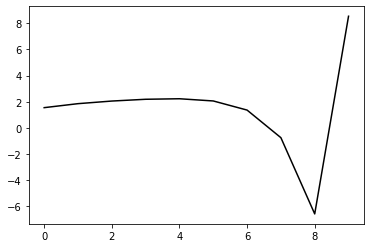

431200 0.1640240246282458
0.7190611936907951 -0.2701420159970256 -0.45444336537122837 -0.2974230481641761
[ 1.47657484  1.90336627  2.0790233   2.16471922  2.14364486  1.9120097
  1.15880377 -0.99794665 -6.86416923  8.43525615]


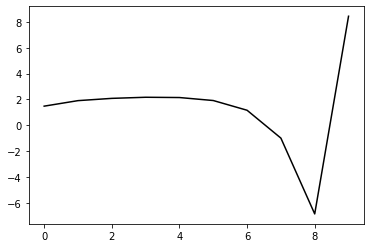

432300 0.2042035571568711
0.6863471325474428 -0.2761931134725297 -0.44941498652353246 -0.3151585905067476
[ 1.53521858  1.80290032  2.0004648   2.09235274  2.06907606  1.83677501
  1.08871911 -1.05681795 -6.90367868  8.56527435]


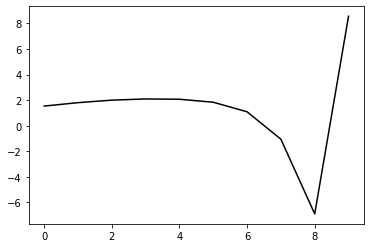

433400 0.11487096914378286
0.7059640110540133 -0.2782660821713848 -0.4565493290531491 -0.3108087111209243
[ 1.51465706  1.85661916  2.0859573   2.20101939  2.18877228  1.95827704
  1.20739282 -0.94331662 -6.79992097  8.50642675]


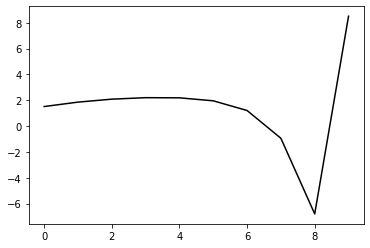

434500 0.24924404180660095
0.7103611470406052 -0.2673161050011343 -0.4488409085579381 -0.3186558244478017
[ 1.54760673  1.82077026  2.06090586  2.19388602  2.19535301  1.97787956
  1.24454827 -0.88463758 -6.71980762  8.53416684]


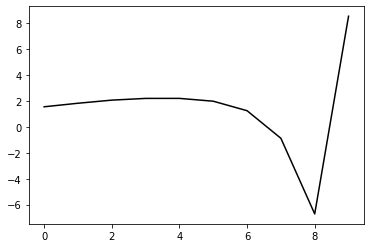

435600 0.2906115343904314
0.705948052759413 -0.2936517401148514 -0.46898440375153766 -0.3046067974644288
[ 1.39786484  1.88267993  2.10302109  2.20142618  2.15518728  1.88629365
  1.11187799 -1.04192645 -6.88221451  8.43598347]


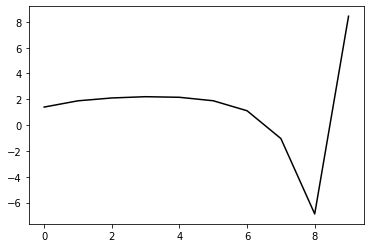

436700 0.15865569028872784
0.6702871337414018 -0.28605139901188203 -0.45632360626228796 -0.3150704695635736
[ 1.56240977  1.66197351  1.86706329  1.97146931  1.93537835  1.67878228
  0.92216172 -1.20848484 -7.02163935  8.5194192 ]


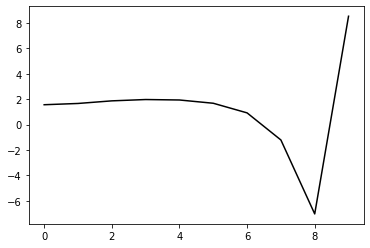

437800 0.16258120041974708
0.6701086480262887 -0.2949632795269092 -0.4641118503858684 -0.31195423981196946
[ 1.48055435  1.73276594  1.94751465  2.05942703  2.02916258  1.77360755
  1.01857419 -1.10519015 -6.90527031  8.49643747]


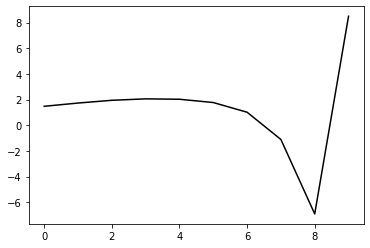

438900 0.14695084114157933
0.7174793920220334 -0.26673396126484133 -0.45129907235981925 -0.314362693147475
[ 1.47921107  1.82569481  2.06563842  2.19922265  2.18639326  1.93996533
  1.19002735 -0.92800504 -6.72606073  8.5957121 ]


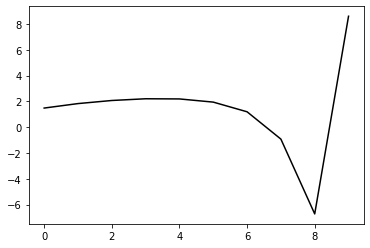

440000 0.2358077195952035
0.6436193747188887 -0.3032662893883439 -0.46714013833067203 -0.30501070297831273
[ 1.49903802  1.64920966  1.83825208  1.95690373  1.93041902  1.66635214
  0.89775828 -1.23532559 -7.04709301  8.45095226]


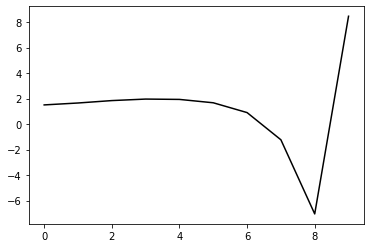

441100 0.1830435942869887
0.7002005743959895 -0.2767336823818361 -0.4569285019711158 -0.3134940224724987
[ 1.47526347  1.82384231  2.03784291  2.17212166  2.16331025  1.91041878
  1.14751236 -0.98044252 -6.78424412  8.56532306]


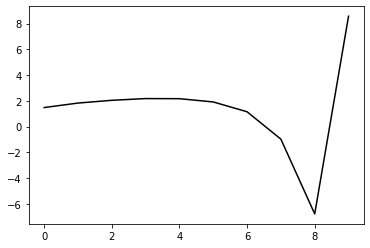

442200 0.15641436691000737
0.7050602002092943 -0.2802617827727747 -0.4583560916409582 -0.3193438153782904
[ 1.44285711  1.85099983  2.09210566  2.22834899  2.21821644  1.96041353
  1.19063121 -0.93906025 -6.73755066  8.51085665]


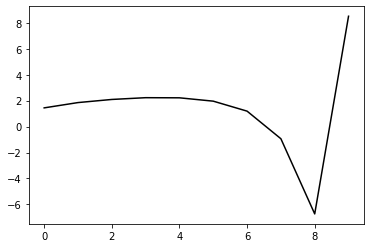

443300 0.14569709134142259
0.7168164145859361 -0.27567323591518006 -0.45696361692078913 -0.3203210639434942
[ 1.45729963  1.84889629  2.12421531  2.28738833  2.29396972  2.04358221
  1.27401124 -0.85389197 -6.64687097  8.56791952]


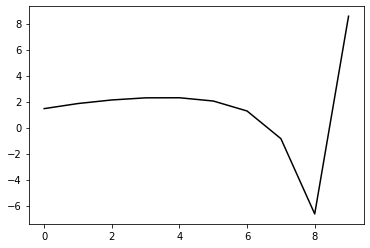

444400 0.12917561106659628
0.6924694396191013 -0.28630392369162105 -0.4579939308478338 -0.3226119274589965
[ 1.48953137  1.74492704  1.98734731  2.152596    2.15519267  1.89250184
  1.10603295 -1.03495442 -6.83470581  8.51132267]


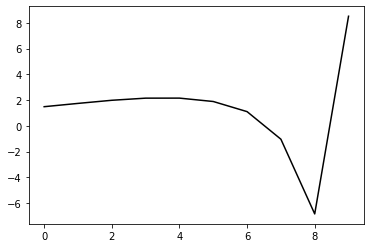

445500 0.19385679051802232
0.7137389355055377 -0.2771798153983639 -0.4534105087070638 -0.3272576191028873
[ 1.51993121  1.75418056  2.01202011  2.18790229  2.20658273  1.95438739
  1.17253436 -0.9626347  -6.75309225  8.55328697]


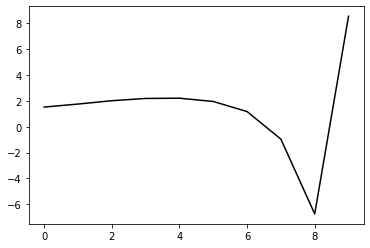

446600 0.22472775618376686
0.7268713595882988 -0.2840644699032566 -0.46337896596756356 -0.3182803226654688
[ 1.41453209  1.84506785  2.10125904  2.26825897  2.28156304  2.02571447
  1.240051   -0.89486861 -6.68075026  8.43866252]


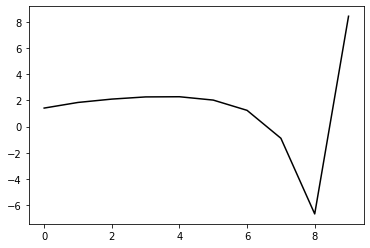

447700 0.7995115053905344
0.7020316717224913 -0.2553901744474568 -0.4363729954737083 -0.33831480042222795
[ 1.66210054  1.58336133  1.82857915  2.00376106  2.03059978  1.78636245
  1.00758493 -1.12200393 -6.90305944  8.55528927]


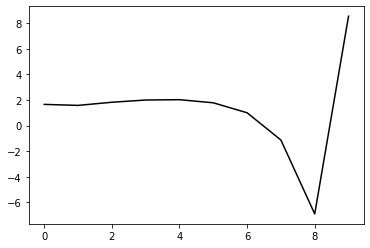

448800 0.15075325997807662
0.7082845831965778 -0.2865513153059002 -0.4681733712288419 -0.31312304081153053
[ 1.48283376  1.76136655  2.00844543  2.19203407  2.22755659  1.98524653
  1.19817792 -0.94654768 -6.75266048  8.51289762]


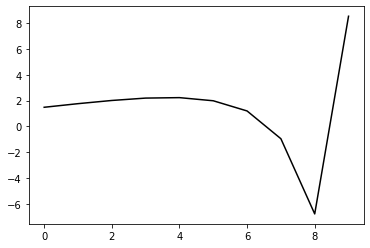

449900 0.17939375696556695
0.6926095017704351 -0.2846145728781512 -0.465411824944826 -0.31234287637602404
[ 1.49568773  1.71305406  1.92175961  2.0895866   2.12143673  1.88143098
  1.0969104  -1.04463801 -6.84806528  8.53241368]


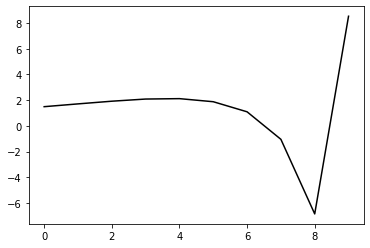

451000 0.29451321235559513
0.6950322584211256 -0.2979558660704425 -0.47686527454227745 -0.2998596228759567
[ 1.43331753  1.767501    1.95325649  2.0775834   2.07315343  1.80415596
  0.9948959  -1.1620311  -6.96874435  8.57856769]


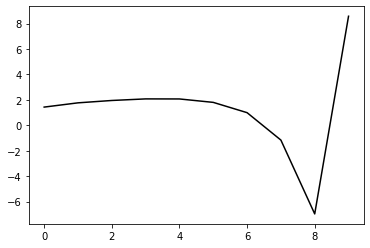

452100 0.22108951360391932
0.6733705550410578 -0.29333846837186117 -0.471193562689712 -0.3126108850733715
[ 1.52185301  1.67157094  1.85793769  2.00975093  2.04718823  1.82992811
  1.07104617 -1.04225181 -6.81356506  8.49017973]


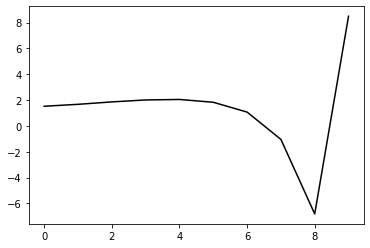

453200 0.286971219106288
0.7022879220240803 -0.2912683495700062 -0.47541860403838404 -0.31383059729588886
[ 1.4325467   1.83054618  2.04086965  2.2076125   2.26266287  2.06223792
  1.31273644 -0.7963078  -6.56973835  8.56304745]


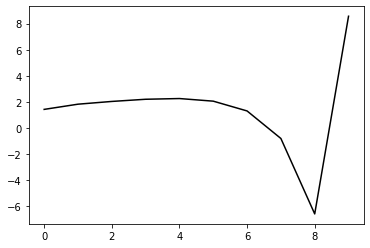

454300 0.21545053324048197
0.6947123494245135 -0.2699310794698447 -0.45578386103132584 -0.31738607005868646
[ 1.55035818  1.68752994  1.86795171  2.00551789  2.04010012  1.8388003
  1.10355371 -0.98433963 -6.72803749  8.48897781]


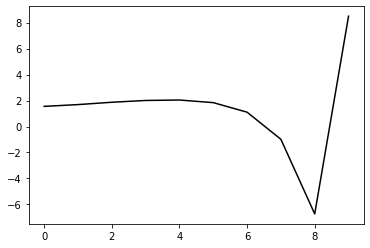

455400 0.21161290622985723
0.7142937372747182 -0.26452740962484184 -0.45867414440026405 -0.3161180777893963
[ 1.55348198  1.76820805  1.98703917  2.15846505  2.22509937  2.05196375
  1.3367549  -0.74050084 -6.4860825   8.61031847]


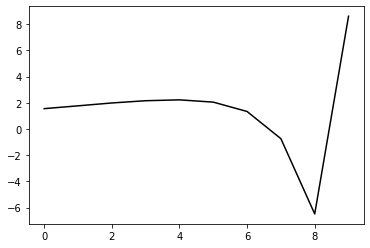

456500 0.2249977533674083
0.6813422655598821 -0.28731973163299884 -0.46712696658518005 -0.30748527436321216
[ 1.54084634  1.69662766  1.86164165  1.97899708  1.98810135  1.76220288
  1.00414188 -1.10333708 -6.86199431  8.46914521]


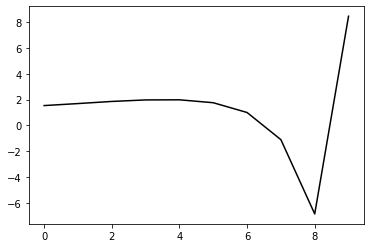

457600 0.2674322690450588
0.7073335863696547 -0.2919942986195341 -0.4781396967496325 -0.29996987019530474
[ 1.45577971  1.8357913   2.03284399  2.16840557  2.19120638  1.97411186
  1.21827849 -0.89234692 -6.65481689  8.58258966]


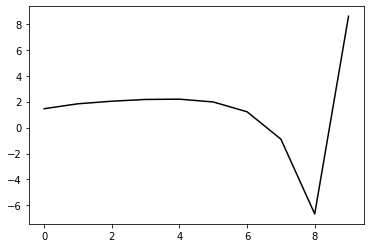

458700 0.14264943808517377
0.6800036719281098 -0.2903825321883278 -0.4701849040635885 -0.3053256874566038
[ 1.56463773  1.67469128  1.84110721  1.93945575  1.9259513   1.67715704
  0.89534567 -1.23641385 -7.01607519  8.48357503]


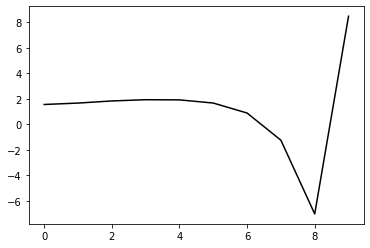

459800 0.2547618528008582
0.6884450257357451 -0.27277694690038995 -0.454389569954964 -0.32280122649609
[ 1.57801451  1.7168973   1.91684733  2.03250687  2.03155849  1.79367135
  1.02092952 -1.10293085 -6.8698471   8.53607175]


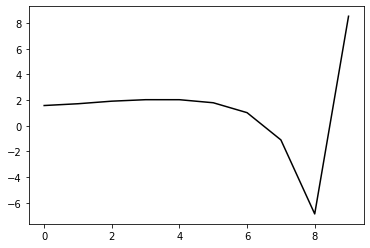

460900 0.3039455297808984
0.7277841419241715 -0.26699937210817 -0.46428806205465956 -0.3066506715118631
[ 1.44514749  1.88253619  2.11818984  2.25918028  2.27606332  2.05337011
  1.29227356 -0.826596   -6.60639516  8.53546928]


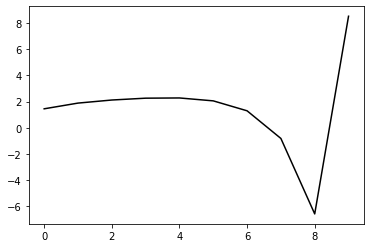

462000 0.18855611078553725
0.7043310366594492 -0.2804997138597108 -0.4680792111061844 -0.31554823759541206
[ 1.52995507  1.82001868  2.0686581   2.24073544  2.28609809  2.08938031
  1.3510765  -0.74944078 -6.51302276  8.63776985]


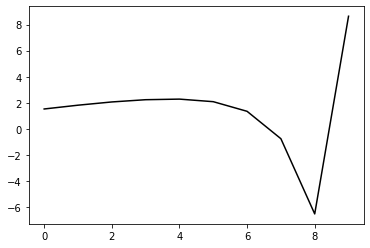

463100 0.18066593882796558
0.6861990025912897 -0.2838190523641019 -0.4651948697172229 -0.31407604666707695
[ 1.53137404  1.7766335   1.98359756  2.11898613  2.13008547  1.90483873
  1.14657746 -0.96659822 -6.73310416  8.53954186]


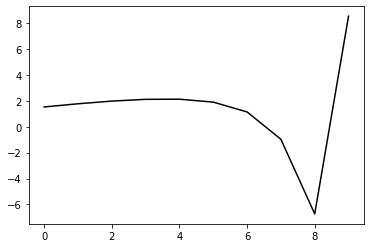

464200 0.23839392929817205
0.7182173324378668 -0.2521145137652795 -0.4584479421281027 -0.28590136867597904
[ 1.42508539  1.85027868  2.01347519  2.10402757  2.06380149  1.7819376
  0.96597493 -1.20681737 -7.0571145   8.48704498]


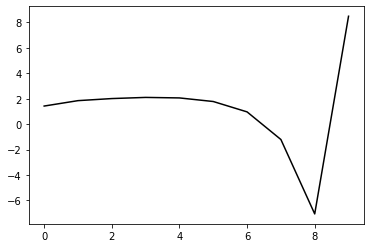

465300 0.18156561290970988
0.7059002405068006 -0.2712990973720098 -0.46367043044589573 -0.3079284389927675
[ 1.46004914  1.83308161  2.06678483  2.20690389  2.21304915  1.97038681
  1.18511333 -0.96347372 -6.78573581  8.52678928]


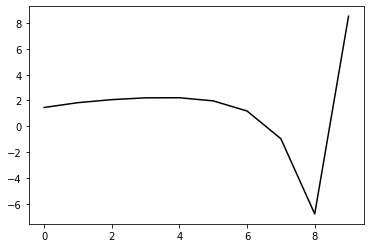

466400 0.13639129365334837
0.6992689832487652 -0.2695892404617806 -0.4641804184029981 -0.2996707992011708
[ 1.50169805  1.74678483  1.95823986  2.08708612  2.08013749  1.82822995
  1.04149166 -1.10208674 -6.914778    8.51793042]


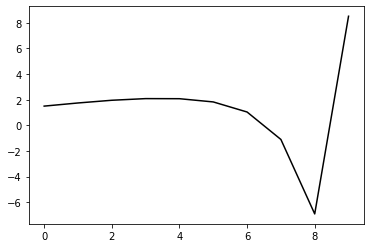

467500 0.21436265678403651
0.7162264121820108 -0.24916497361307133 -0.45260145188870493 -0.31003696675903336
[ 1.50935591  1.8000614   1.98086387  2.09772035  2.08528217  1.83622993
  1.06307707 -1.06042134 -6.85129531  8.56578214]


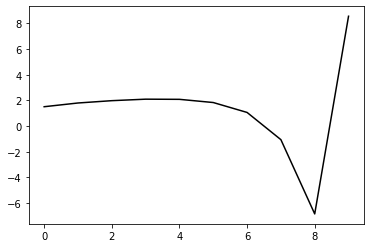

468600 0.2767802883417305
0.6690464663941054 -0.2944042809065514 -0.47351117769726725 -0.31798635338297404
[ 1.52927147  1.72073441  1.93113873  2.06442474  2.06909675  1.83482932
  1.07489005 -1.03551149 -6.80912866  8.5043394 ]


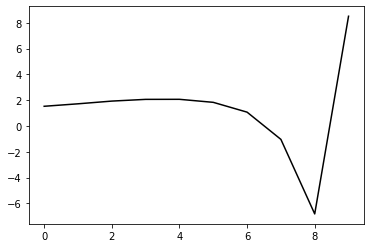

469700 0.0661475490704931
0.7041564506266227 -0.27776608252556395 -0.4663753197675544 -0.31565210175558867
[ 1.50784338  1.83902727  2.05490177  2.18706407  2.1824831   1.9314932
  1.15344584 -0.97054372 -6.74826354  8.55102565]


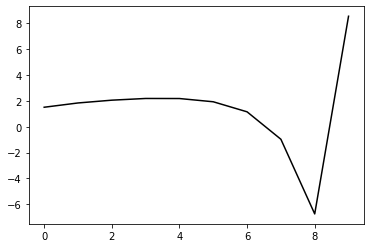

470800 0.2085223868126205
0.7135396875186519 -0.26724527532938 -0.4585423325675438 -0.3146636541877269
[ 1.56512947  1.79809498  2.04773992  2.21065671  2.23100197  1.99651276
  1.22731926 -0.89335441 -6.67409418  8.51530952]


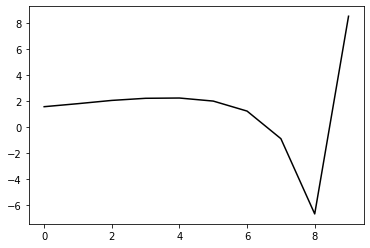

471900 0.2892630935440256
0.655070717116016 -0.2832232571625899 -0.45685647583955824 -0.3206819469392515
[ 1.54139318  1.67369418  1.83968854  1.9329607   1.88323168  1.58442012
  0.76192289 -1.39831336 -7.21620094  8.59634475]


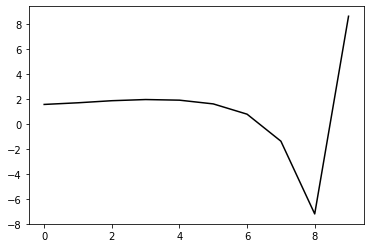

473000 0.22286177318348724
0.6888180793960207 -0.2766743420429602 -0.4586105723187817 -0.3163188324615313
[ 1.51685369  1.78198426  1.97236089  2.0765766   2.0370642   1.74377117
  0.92320594 -1.2348094  -7.03365436  8.48381688]


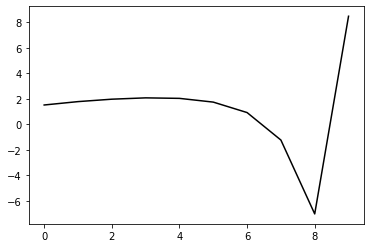

474100 0.16896870181350498
0.7186423962675786 -0.26679242261373143 -0.4577307606138268 -0.3157155170322621
[ 1.51072412  1.84434355  2.08062031  2.20448089  2.17895805  1.89497044
  1.07928917 -1.07545659 -6.86930909  8.5271809 ]


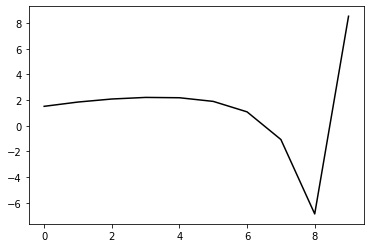

475200 0.2748506469049211
0.6771527827097865 -0.28807475170356056 -0.4626293492739267 -0.32971266909445995
[ 1.57934598  1.64421894  1.89005463  2.04446259  2.04749859  1.79046156
  0.99789293 -1.13634137 -6.90973478  8.44183096]


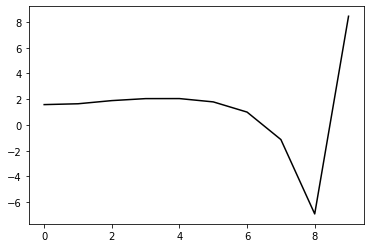

476300 0.3612426031945364
0.661625762618407 -0.31336827592124744 -0.4851510552104547 -0.29694467481376474
[ 1.47435204  1.6756856   1.86544109  1.98236954  1.94885974  1.65464637
  0.82697846 -1.33925759 -7.14665084  8.42658234]


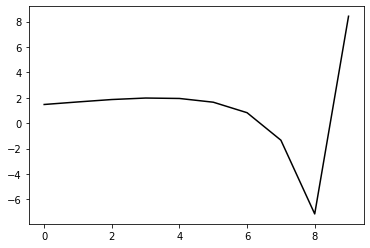

477400 0.17317357862773097
0.6766935572447305 -0.2983882273721884 -0.4741399729008622 -0.3154240837976435
[ 1.4947418   1.70485342  1.9072674   2.03698625  2.0194461   1.73885179
  0.92220409 -1.23381723 -7.02603689  8.5565434 ]


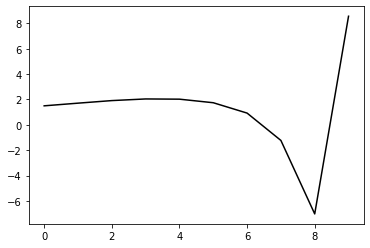

478500 0.20304814293559137
0.69804791956492 -0.28024922086497955 -0.4670739251970814 -0.3143121981485411
[ 1.54918431  1.81376386  2.02255705  2.16684009  2.16359431  1.88939043
  1.07153704 -1.09019536 -6.88848859  8.49477636]


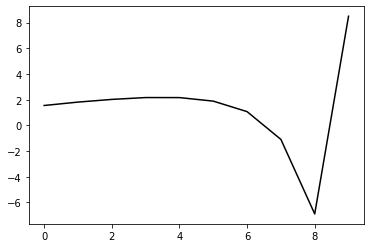

479600 0.3661004230832852
0.7242898266412922 -0.2911384120779779 -0.47956321075575664 -0.29651872635076243
[ 1.41056306  1.95454457  2.17379918  2.29489282  2.26214789  1.95538908
  1.10406249 -1.08827818 -6.91407602  8.53929915]


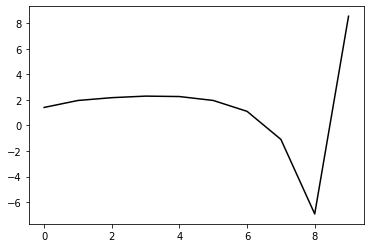

480700 0.11173017419182776
0.7185874029804746 -0.27373833566856065 -0.4619350936959199 -0.30766404053721025
[ 1.54687955  1.77685199  1.99837847  2.10539334  2.06182329  1.75102227
  0.90039697 -1.28577608 -7.09640826  8.41885794]


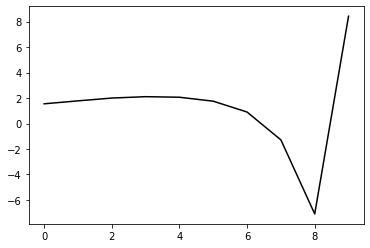

481800 0.13601904605589063
0.7285943978800694 -0.26872944102395113 -0.45973476199308305 -0.31594876025998775
[ 1.52721455  1.83882494  2.1047009   2.24941462  2.23630348  1.9511201
  1.11937725 -1.05291011 -6.8517054   8.49183625]


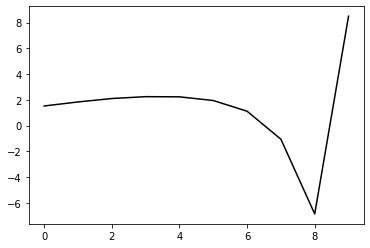

482900 0.17705067179370923
0.7042424919626334 -0.2778061792161344 -0.4640482983734942 -0.3094864815527462
[ 1.47262564  1.80004495  2.03517962  2.16523409  2.13315689  1.82878741
  0.97835191 -1.2114619  -7.0251706   8.53425493]


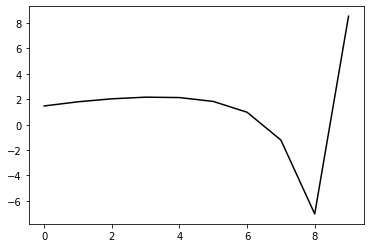

484000 0.21953626889613762
0.6978562716722537 -0.2722190935250156 -0.4616716471062273 -0.3063981624317307
[ 1.51130664  1.7135512   1.92073711  2.05659537  2.03962606  1.75556583
  0.92796252 -1.23957242 -7.03161015  8.46867198]


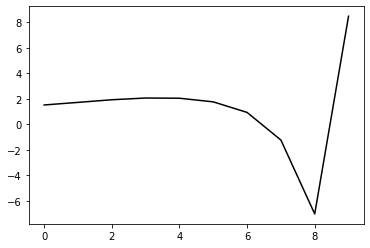

485100 0.17645271187326741
0.7098042336679213 -0.2763282409355994 -0.46503857402408955 -0.31556803777551345
[ 1.52165726  1.79801464  2.0370293   2.19933995  2.21346513  1.95679635
  1.15094951 -0.99774642 -6.76768186  8.57758734]


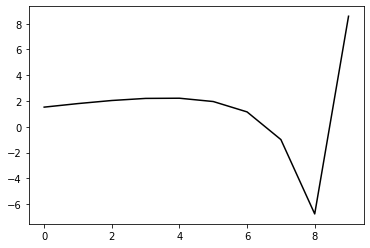

486200 0.2300944278180418
0.7158608165862546 -0.27424615057296053 -0.46661954716369136 -0.30584039820276177
[ 1.43311962  1.84270601  2.06314566  2.19515901  2.17797108  1.88956516
  1.0519435  -1.12597277 -6.91998305  8.51809   ]


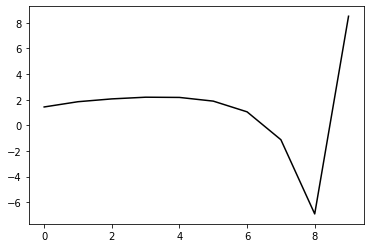

487300 0.2296365822570596
0.6776530151897023 -0.29331188308317335 -0.46796881363946374 -0.3170521308334332
[ 1.5634159   1.73417801  1.97434952  2.12793493  2.13271073  1.86394194
  1.04013911 -1.12977989 -6.91887485  8.4455554 ]


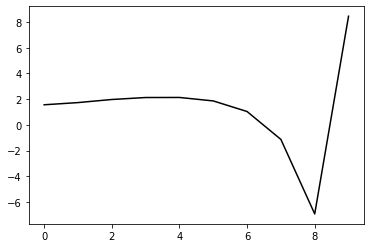

488400 0.21733778619087463
0.7268494597240879 -0.2682428253667797 -0.4567413806684302 -0.3238869543317689
[ 1.55094674  1.83368007  2.10394568  2.27518212  2.29516893  2.03869178
  1.22313475 -0.94057322 -6.7177398   8.54730327]


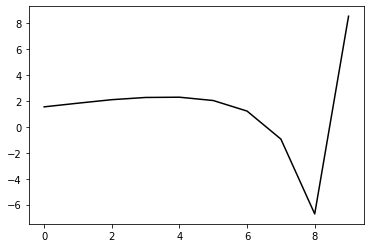

489500 0.22536562157888654
0.7142318488481869 -0.27356123469161897 -0.45640480922687937 -0.32759488294123795
[ 1.54659404  1.83376745  2.09970825  2.26633025  2.27834019  2.01101058
  1.18086581 -0.99815327 -6.78379827  8.52266033]


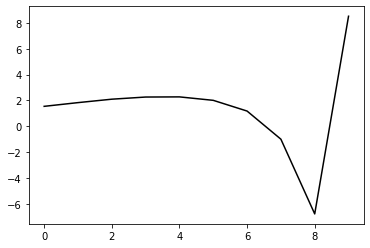

490600 0.2146934316138646
0.7143950909414191 -0.28914651683336373 -0.47052693336656387 -0.31623049700580413
[ 1.46066017  1.86360824  2.12108288  2.27453255  2.26837083  1.98268969
  1.13667299 -1.05336862 -6.83922351  8.50176319]


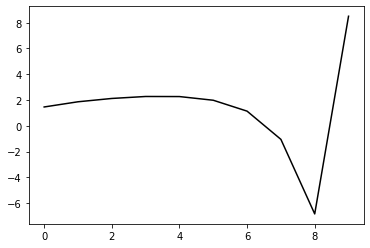

491700 0.7778967399295215
0.6789132955338493 -0.26993054909451847 -0.44349367193437744 -0.345858484614338
[ 1.71334151  1.60603953  1.86514521  2.03771854  2.05361917  1.78899327
  0.96058434 -1.21535619 -6.98353183  8.55036045]


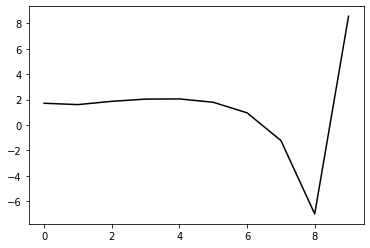

492800 0.14863299899205232
0.7223993381868818 -0.26981899130079284 -0.4565854336405612 -0.3217642931935104
[ 1.52300913  1.88911934  2.15038663  2.31664518  2.31993314  2.0323751
  1.17256758 -1.04004284 -6.85442585  8.47528525]


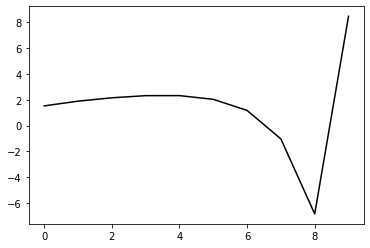

493900 0.18057464791246228
0.6991538922882996 -0.2842483660092574 -0.465035169063509 -0.31180435476267354
[ 1.49156195  1.80979194  2.06102083  2.21346118  2.20140585  1.89870529
  1.02314509 -1.2058892  -7.03839015  8.53690329]


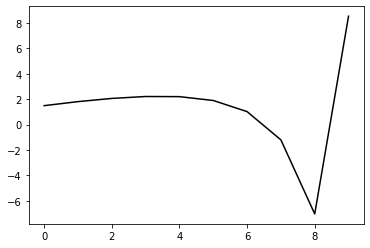

495000 0.21515449614165594
0.7046646082773085 -0.2886813539284299 -0.4693150127195966 -0.3104770876215066
[ 1.51415044  1.75204076  2.0168878   2.1768278   2.17323918  1.87868265
  1.00798262 -1.21784029 -7.04092976  8.47092754]


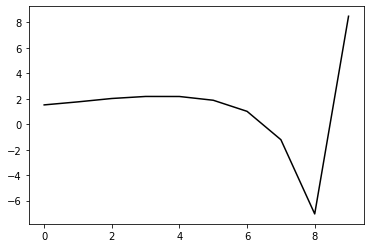

496100 0.22105014891900981
0.6893146677062937 -0.2866685555820035 -0.45826140643364205 -0.3319009296267664
[ 1.56186502  1.70005609  1.94108595  2.0971255   2.0964759   1.81313627
  0.95867032 -1.24812438 -7.0419796   8.50578838]


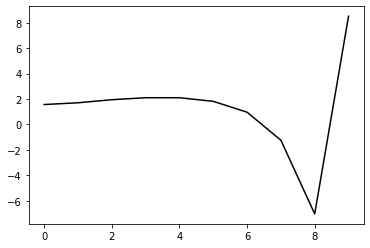

497200 0.19096406006807568
0.6925750686341888 -0.282955454042499 -0.46166731342949063 -0.31975818157592417
[ 1.5272188   1.7551671   1.98647155  2.15357354  2.1661458   1.89245206
  1.04096583 -1.17291321 -6.9867762   8.51126441]


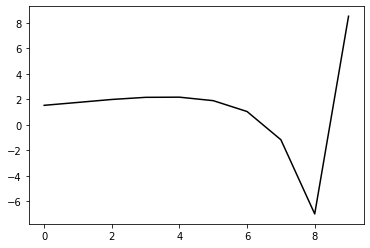

498300 0.22328949687709998
0.7070851125537146 -0.2665736970308577 -0.4518508568945254 -0.3215533666243401
[ 1.5394584   1.74314985  1.96701637  2.13550355  2.15930181  1.90037826
  1.06361076 -1.13865041 -6.94274234  8.49905911]


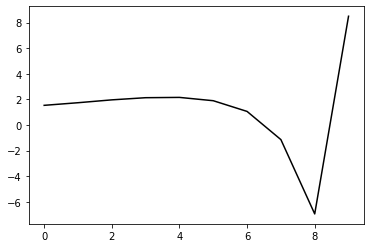

499400 0.12640688989456536
0.7127556454698545 -0.2789587197400941 -0.4639993205372886 -0.3253736988706759
[ 1.54054136  1.81584358  2.07268668  2.27754002  2.34337175  2.12189853
  1.31256907 -0.87200273 -6.66892242  8.55305732]


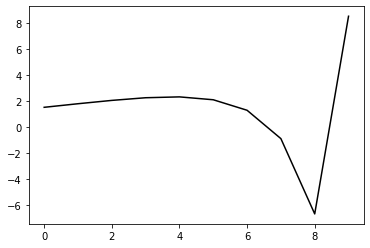

In [18]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
    for i in range (80):
        optimizer.apply_gradients(zip(gradients, [h]))
    for i in range (20):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
    if j%11==0: 
        print(j*100, Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()

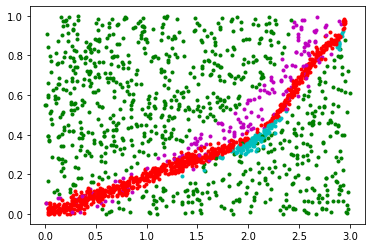

In [19]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()